<a href="https://colab.research.google.com/github/pedroafleite/instacart-market-basket-analysis/blob/main/instacart_3_feat_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

sns.set()

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/instacart/df.csv')
data.head(10)

Mounted at /content/drive


,order_id,product_id,product_name,aisle_id,department_id,user_id,Categories,Category 0,Category 3,Category 4,Category 1,Category 2
0,1,49302.0,Bulgarian Yogurt,120.0,16.0,112108,0,1,0,0,0,0
1,1,11109.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108.0,16.0,112108,3,0,1,0,0,0
2,1,10246.0,Organic Celery Hearts,83.0,4.0,112108,0,1,0,0,0,0
3,1,49683.0,Cucumber Kirby,83.0,4.0,112108,0,1,0,0,0,0
4,1,43633.0,Lightly Smoked Sardines in Olive Oil,95.0,15.0,112108,4,0,0,1,0,0
5,1,13176.0,Bag of Organic Bananas,24.0,4.0,112108,1,0,0,0,1,0
6,1,47209.0,Organic Hass Avocado,24.0,4.0,112108,0,1,0,0,0,0
7,1,22035.0,Organic Whole String Cheese,21.0,16.0,112108,4,0,0,1,0,0
8,36,39612.0,Grated Pecorino Romano Cheese,2.0,16.0,79431,4,0,0,1,0,0
9,36,19660.0,Spring Water,115.0,7.0,79431,2,0,0,0,0,1


In [2]:
aisles = pd.read_csv('/content/drive/MyDrive/instacart/aisles.csv')
df = data.merge(aisles, how='inner')
df.columns

Index(['order_id', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'user_id', 'Categories', 'Category 0', 'Category 3', 'Category 4',
       'Category 1', 'Category 2', 'aisle'],
      dtype='object')

In [3]:
df0=df.loc[df['Categories']==0]
df1=df.loc[df['Categories']==1]
df2=df.loc[df['Categories']==2]
df3=df.loc[df['Categories']==3]
df4=df.loc[df['Categories']==4]

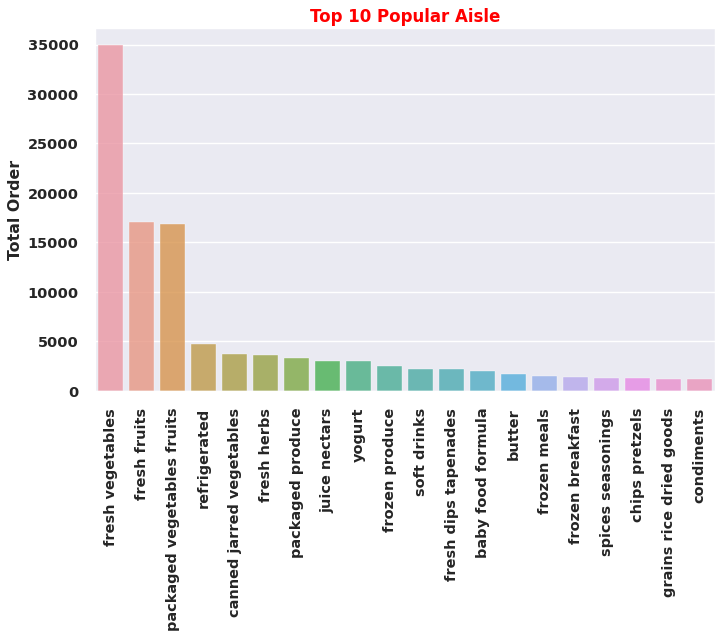

In [4]:
#Most Popular Aisle on Category 0 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df0['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

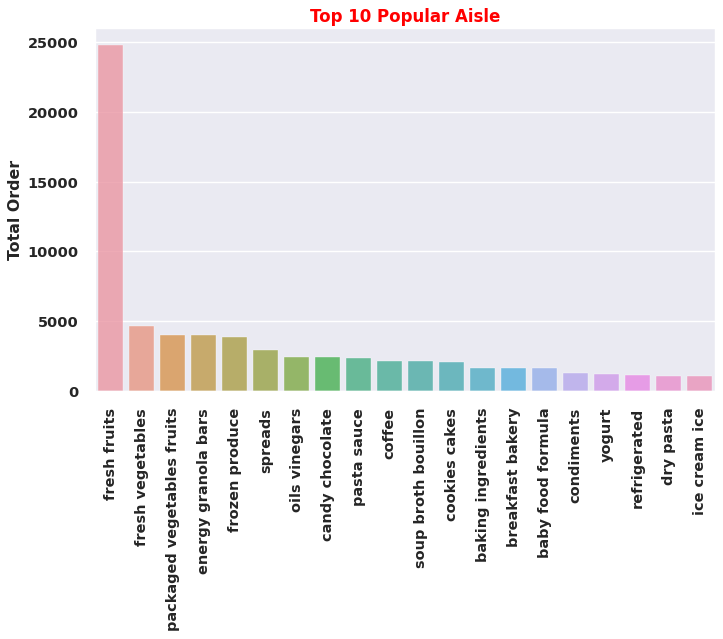

In [5]:
#Most Popular Aisle on Category 1 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df1['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

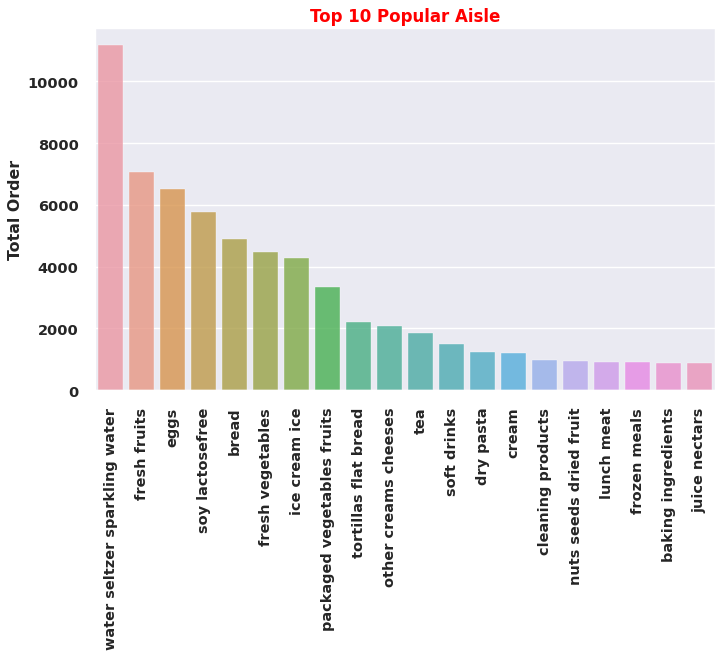

In [6]:
#Most Popular Aisle on Category 2 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df2['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

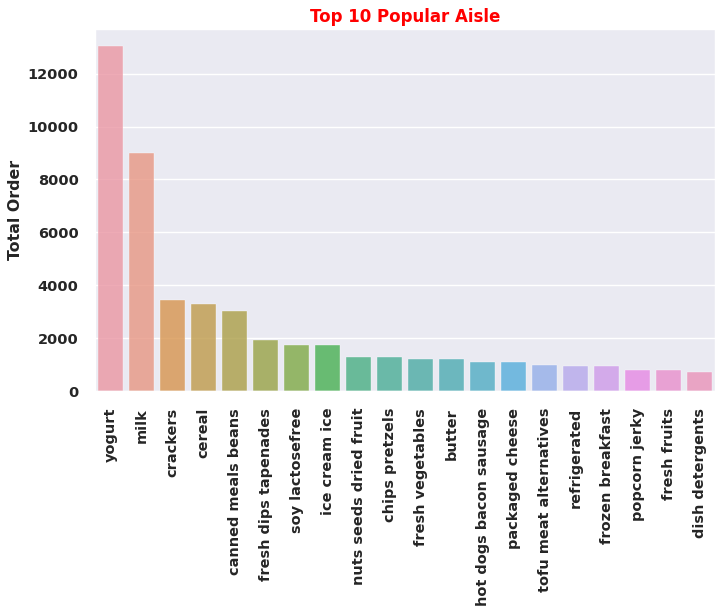

In [7]:
#Most Popular Aisle on Category 3 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df3['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

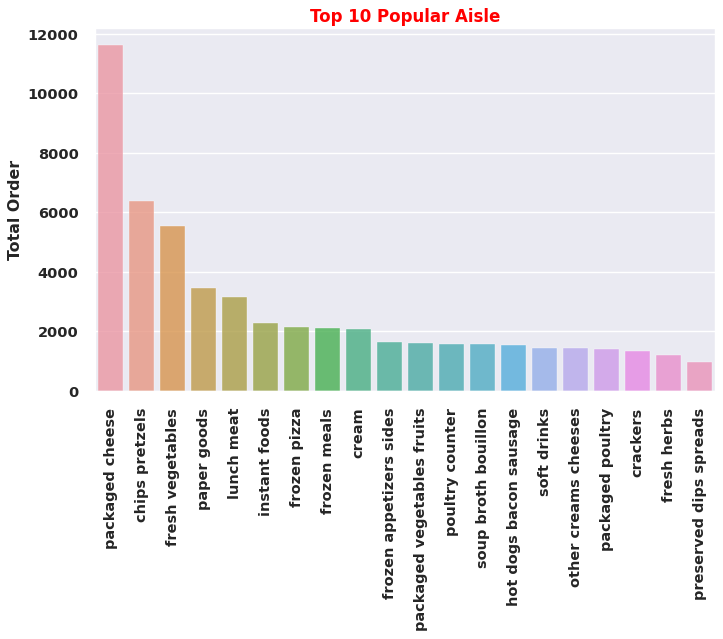

In [8]:
#Most Popular Aisle on Category 4 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df4['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

In [9]:
data.columns

Index(['order_id', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'user_id', 'Categories', 'Category 0', 'Category 3', 'Category 4',
       'Category 1', 'Category 2'],
      dtype='object')

In [10]:
data["order_id01"] = data["order_id"].copy()

# **Feature Engineering**

In [11]:
gb = data.groupby("user_id")
df_customers = []

# Number of orders of each user
nbr_orders = (gb["order_id01"].unique()).apply(lambda x: len(x))
df_customers.append(nbr_orders)

# Average number of different products purchased per order
df_customers.append(gb["order_id"].count()/nbr_orders)

# Proportion of products purchased belonging to one of the 5 categories for each client
for category in ["Category 0", "Category 1", "Category 2", "Category 3", "Category 4"]:
    df_customers.append(gb[category].mean())

In [12]:
df_customers = pd.DataFrame(df_customers).T
df_customers.rename(columns = {'order_id01':'Count_Orders', 
                               'Unnamed 0':'Average_Products_Order',
                               'Category 0':'Vegs & Fruits', 
                               'Category 1':'Fruit Lover',
                               'Category 2':'Eggs & Soy',
                               'Category 3':'Yogurt Lover',
                               'Category 4':'Cheese & Pretzels'},
                    inplace = True)
df_customers.head(10)

,Count_Orders,Average_Products_Order,Vegs & Fruits,Fruit Lover,Eggs & Soy,Yogurt Lover,Cheese & Pretzels
user_id,,,,,,,
7,1.0,9.0,0.111111,0.444444,0.444444,0.000000,0.000000
8,1.0,18.0,0.555556,0.055556,0.166667,0.166667,0.055556
9,1.0,22.0,0.181818,0.090909,0.181818,0.454545,0.090909
24,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000
30,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000
34,1.0,5.0,0.000000,0.400000,0.000000,0.400000,0.200000
49,1.0,6.0,0.166667,0.166667,0.166667,0.333333,0.166667
55,1.0,13.0,0.153846,0.153846,0.307692,0.153846,0.230769
56,1.0,9.0,0.333333,0.111111,0.222222,0.111111,0.222222


In [13]:
df_customers = df_customers.reset_index(level=0, drop=True)

In [14]:
# Noisy points
# Fix that list range
#df_customers.drop([0, 3008], axis=0, inplace=True)

In [15]:
df_customers.columns

Index(['Count_Orders', 'Average_Products_Order', 'Vegs & Fruits',
       'Fruit Lover', 'Eggs & Soy', 'Yogurt Lover', 'Cheese & Pretzels'],
      dtype='object')

# **Clustering**

In [16]:
len(df_customers)

43789

In [17]:
# Yield successive n-sized 
# chunks from l. 
# def divide_chunks(l, n): 
#      
    # looping till length l 
#    for i in range(0, len(l), n):  
#        yield l[i:i + n]

# How many elements each 
# list should have 
# n = int(len(df_customers)/5)
  
# x = list(divide_chunks(df_customers, n)) 

In [18]:
#df_customers = x[0]
#len(df_customers)

In [19]:
# Standization of the data

stscaler = StandardScaler().fit(df_customers)
df_standard = stscaler.transform(df_customers)

In [20]:
# Example of a DBCAN model (Density-Based Spatial Clustering of Applications with Noise)
# https://elutins.medium.com/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818

# Decrease eps, increase clusters. Increase eps, decrease clusters.

dbsc = DBSCAN(eps=1.0, min_samples=15).fit(df_standard)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbsc.core_sample_indices_] = True
dbsc.get_params()

{'algorithm': 'auto',
 'eps': 1.0,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 15,
 'n_jobs': None,
 'p': None}

In [21]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Number of Clusters: %d" % n_clusters_)
print("Number of noises: %d" % n_noise_)

Number of Clusters: 3
Number of noises: 21


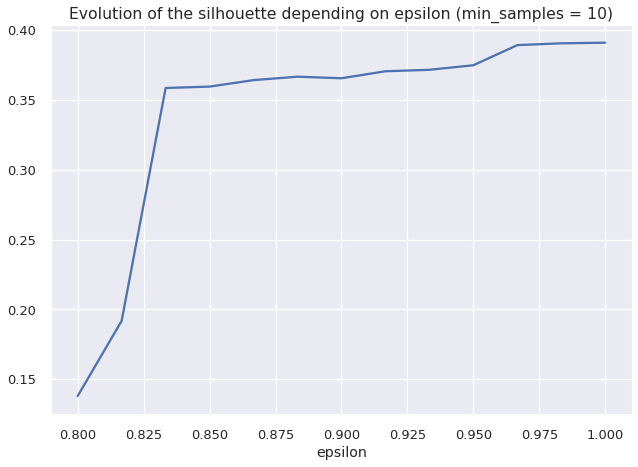

,Epsilon,Nbr_Clusters,Nbr_noises,Silhouette,Distribution of points
0,0.800000,10,52,0.137952,"[41578, 669, 465, 55, 439, 137, 189, 78, 64, 63]"
1,0.816667,7,51,0.191791,"[41968, 669, 465, 55, 439, 78, 64]"
2,0.833333,4,47,0.358499,"[42168, 669, 465, 440]"
3,0.850000,4,44,0.359504,"[42172, 669, 465, 439]"
4,0.866667,4,40,0.364137,"[42176, 669, 465, 439]"
5,0.883333,4,37,0.366597,"[42179, 669, 465, 439]"
6,0.900000,4,35,0.365460,"[42181, 669, 465, 439]"
7,0.916667,4,29,0.370482,"[42187, 669, 465, 439]"
8,0.933333,4,26,0.371522,"[42190, 669, 465, 439]"
9,0.950000,4,22,0.374781,"[42194, 669, 465, 439]"


In [22]:
# vary the value of epsilon between 0.8 and 1.0 for min_samples = 10

epsilon = np.linspace(0.8,1.0,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=10).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Number of clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc5 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                         'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
    
#graph showing the evolution of the silhouette depending on epsilon (min_samples = 10)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 10)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc5.head(13)

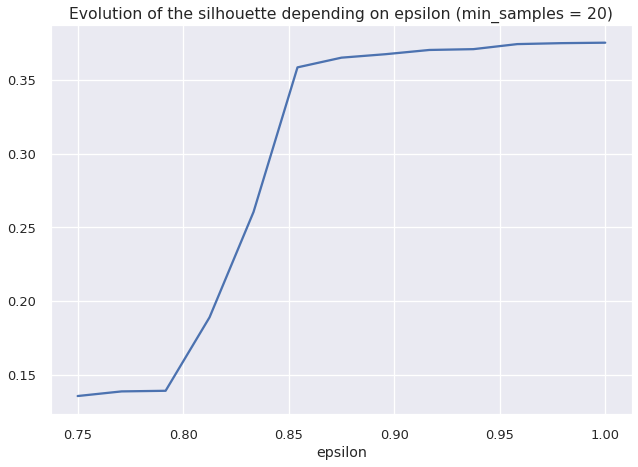

,Epsilon,Nbr_Clusters,Nbr_noises,Silhouette,Distribution of points
0,0.750000,13,139,0.135753,"[40923, 669, 465, 55, 439, 263, 137, 189, 247,..."
1,0.770833,11,106,0.138890,"[41466, 669, 465, 55, 439, 137, 189, 59, 78, 6..."
2,0.791667,11,87,0.139308,"[41484, 669, 465, 55, 439, 137, 189, 59, 78, 6..."
3,0.812500,8,68,0.189090,"[41891, 669, 465, 55, 439, 59, 78, 65]"
4,0.833333,6,62,0.260413,"[42039, 669, 465, 55, 440, 59]"
5,0.854167,4,57,0.358338,"[42158, 669, 465, 440]"
6,0.875000,4,47,0.364907,"[42168, 669, 465, 440]"
7,0.895833,4,44,0.367251,"[42171, 669, 465, 440]"
8,0.916667,4,40,0.370125,"[42175, 669, 465, 440]"
9,0.937500,4,30,0.370670,"[42185, 669, 465, 440]"


In [23]:
# vary the value of epsilon between 0.75 and 1.0 for min_samples = 20

epsilon = np.linspace(0.75,1.0,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=20).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Number of clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc5 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                         'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
    
#graph showing the evolution of the silhouette depending on epsilon (min_samples = 20)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 20)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc5.head(13)

In [ ]:
# vary the value of epsilon between 0.75 and 1.0 for min_samples = 30

epsilon = np.linspace(0.75,1.0,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=30).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Number of clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc5 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                         'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
    
#graph showing the evolution of the silhouette depending on epsilon (min_samples = 30)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 30)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc5.head(13)

In [ ]:
# vary the value of epsilon between 2.2 and 3.0 for min_samples = 20
epsilon = np.linspace(2.2,3.0,16)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=20).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)
    
# Dataframe with Nbr_Clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc30 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                          'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
# Graph showing the evolution of the silhouette depending on epsilon (min_samples = 20)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 20)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc30.head(16)

In [ ]:
# vary the value of epsilon between 1.5 and 2.4 for min_samples = 20
epsilon = np.linspace(1.5,2.4,16)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=20).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)
    
# Dataframe with Nbr_Clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc30 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                          'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
# Graph showing the evolution of the silhouette depending on epsilon (min_samples = 20)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 20)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc30.head(20)

In [ ]:
# vary the value of epsilon between 0.8 and 2.7 for min_samples = 20
epsilon = np.linspace(0.8,2.7,16)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=20).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)
    
# Dataframe with Nbr_Clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc30 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                          'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
# Graph showing the evolution of the silhouette depending on epsilon (min_samples = 20)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 20)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc30.head(20)

In [ ]:
# Graph showing the evolution of the square root of the sum of squared distances
# of samples to their closest cluster center, depending on number of cluster (k)

inertia = []

for k in range(1,30):
    model = KMeans(n_clusters=k, random_state=0).fit(df_standard)
    inertia.append(np.sqrt(model.inertia_))
    
plt.plot(range(1, 30), inertia, marker='s');
plt.xlabel('$k$ (Number of clusters)')
plt.ylabel('$J(C_k)$');

In [ ]:
# Vary the number of clusters between 2 and 20
res =  np.arange(19,dtype="double")

for k in np.arange(1,19):
    km = KMeans(n_clusters=k+1, random_state=0).fit(df_standard)
    res[k] = metrics.silhouette_score(df_standard,km.labels_)
    
#graph

plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.plot(np.arange(2,21,1),res)
plt.show()

In [31]:
#Clustering with K-means algorithm

for n_cluster in [3,4,5,6,7,8,9,12,13]:
    model = KMeans(n_clusters=n_cluster, random_state=0).fit(df_standard)
    idk = model.labels_
    dict_nbr_points = {j: ("Number of points = %d" % (len(np.where(idk == j)[0])))
                       for j in range(model.n_clusters)}
    print('Number of clusters: %d' % n_cluster)
    print(dict_nbr_points)
    print('------------------------')

Number of clusters: 3
{0: 'Number of points = 13684', 1: 'Number of points = 22530', 2: 'Number of points = 7575'}
------------------------
Number of clusters: 4
{0: 'Number of points = 8848', 1: 'Number of points = 6539', 2: 'Number of points = 7014', 3: 'Number of points = 21388'}
------------------------
Number of clusters: 5
{0: 'Number of points = 8252', 1: 'Number of points = 6774', 2: 'Number of points = 12351', 3: 'Number of points = 9849', 4: 'Number of points = 6563'}
------------------------
Number of clusters: 6
{0: 'Number of points = 8837', 1: 'Number of points = 4954', 2: 'Number of points = 5728', 3: 'Number of points = 12231', 4: 'Number of points = 6534', 5: 'Number of points = 5505'}
------------------------
Number of clusters: 7
{0: 'Number of points = 8651', 1: 'Number of points = 11868', 2: 'Number of points = 5692', 3: 'Number of points = 4998', 4: 'Number of points = 4529', 5: 'Number of points = 2123', 6: 'Number of points = 5928'}
------------------------
Numb

In [33]:
df_customers.columns

Index(['Count_Orders', 'Average_Products_Order', 'Vegs & Fruits',
       'Fruit Lover', 'Eggs & Soy', 'Yogurt Lover', 'Cheese & Pretzels',
       'Category 5', 'Category 6'],
      dtype='object')

In [ ]:
def hist_kmeans_clusters(n):
    ''' For each feature this fonction plot histograms of your kmeans model's clusters.
    
    Parameters:
      
        n (int): the value of n_clusters in K-Means clustering
      
    '''
  
    model = KMeans(n_clusters=n, random_state=0).fit(df_standard)
    idk = model.labels_
    fig, ax = plt.subplots(figsize=(7,6))

    for i in ['Count_Orders', 'Average_Products_Invoice', 'Vegs & Fruits',
              'Eggs & Fake Milk', 'Lots of Fruits', 'Cheese Lover', 
              'Yogurt Lovers']:
        print(df_customers[i].describe())

        for id_cluster in range(model.n_clusters):
            print("Cluster %d" % id_cluster)
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Median = df_customers[i][index].median()
            plt.hist(df_customers[i][index], bins = 30)
            plt.text(0.85, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
               transform=ax.transAxes)
            plt.text(0.85, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                    alpha=0.5),
               transform=ax.transAxes)
            plt.title(i)
            plt.show()

        print('---------------------------------------------------------')

In [ ]:
def df_kmeans_clusters(n):
    ''' Show a dataframe with the average percentage difference betwean the mean of each feature
    and the value of each point for each kmeans model's clusters.
    
    Parameters:
      
         n (int): the value of n_clusters in K-Means clustering
      
    '''
  
    model = KMeans(n_clusters=n, random_state=0).fit(df_standard)
    idk = model.labels_
    my_dict={}
    alphabet = 'BCDEFGHIJKLM'
    my_dict['A/Number_Of_Customers'] = [(len(np.where(idk == j)[0])) for j in 
                                        range(model.n_clusters)]

    for h, i in enumerate(['Count_Orders', 'Average_Products_Invoice', 'Vegs & Fruits', 
                           'Eggs & Fake Milk', 'Lots of Fruits', 'Cheese Lover', 
                           'Yogurt Lovers']):
        feature = []

        for id_cluster in range(model.n_clusters):
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Mean_feature = df_customers[i].mean()
            pourcentage_mean = str('%.2f' % ((Mean - Mean_feature)*100/Mean_feature)) + ' %'
            feature.append(pourcentage_mean)
    
        my_dict[alphabet[h] + '/' + i] = feature
   
    my_dict['N' + '/'] = feature
    Clusters_df = pd.DataFrame(my_dict)
  
    return Clusters_df.head(n)

count    27663.000000
mean         1.162311
std          0.438266
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: Count_Orders, dtype: float64
Cluster 0


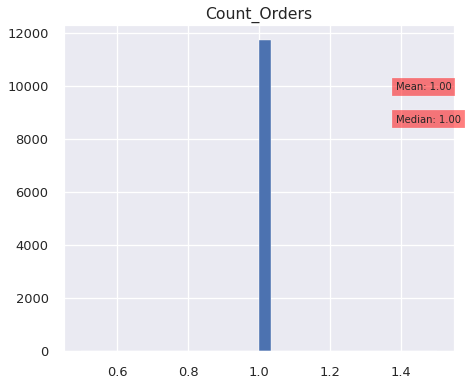

Cluster 1


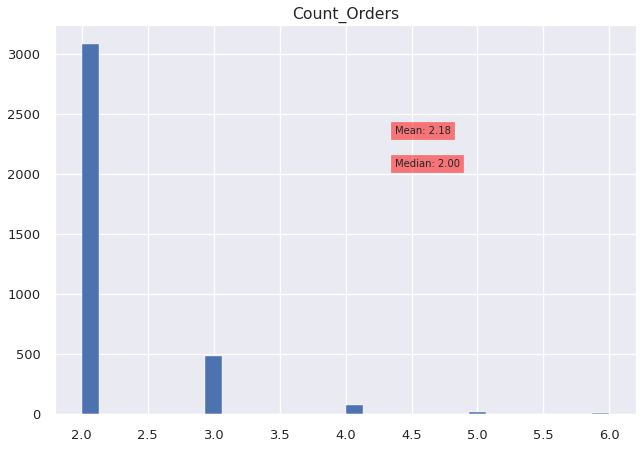

Cluster 2


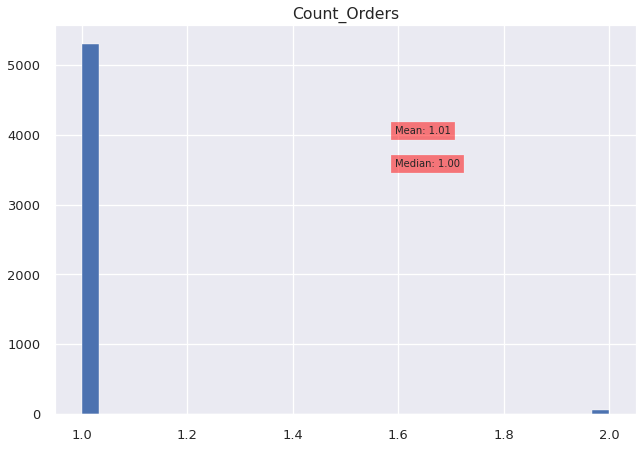

Cluster 3


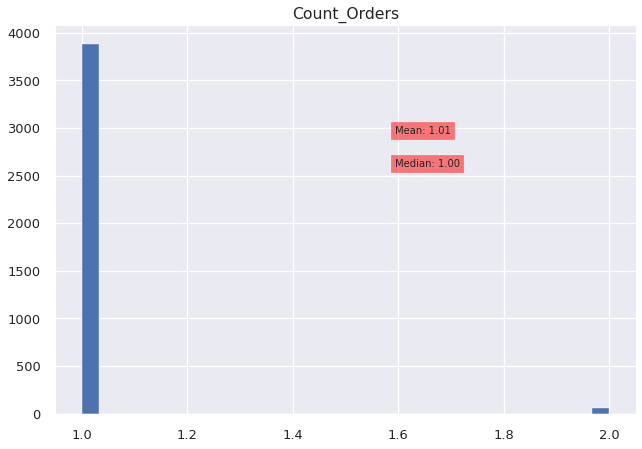

Cluster 4


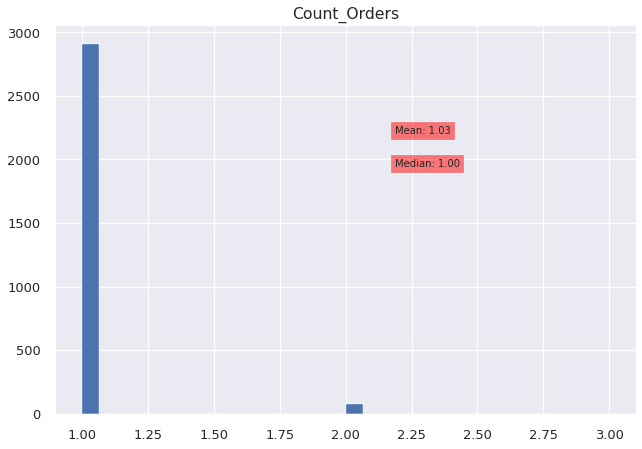

---------------------------------------------------------
count    27663.000000
mean        10.067387
std          7.391124
min          1.000000
25%          5.000000
50%          8.000000
75%         14.000000
max         71.000000
Name: Average_Products_Invoice, dtype: float64
Cluster 0


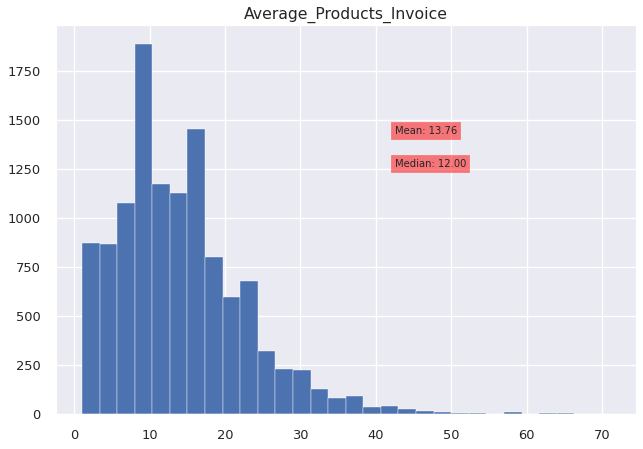

Cluster 1


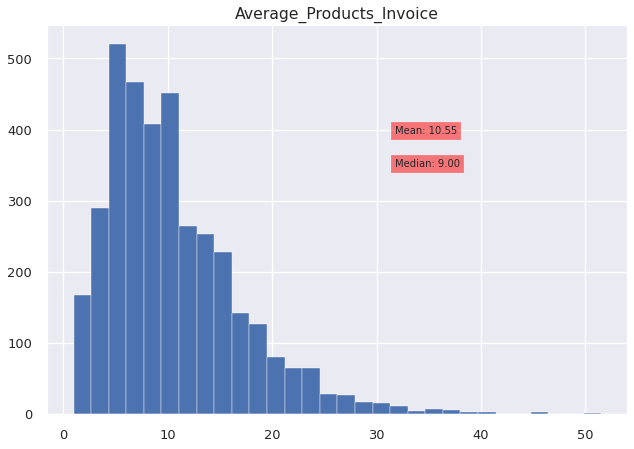

Cluster 2


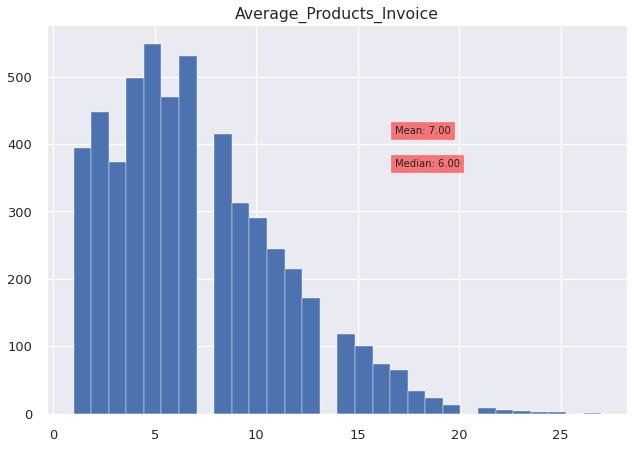

Cluster 3


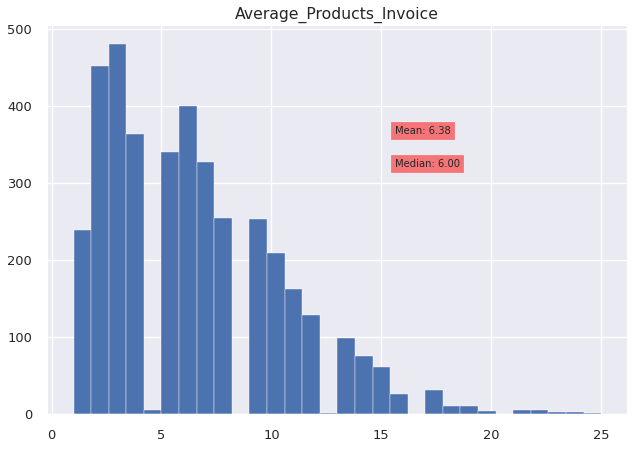

Cluster 4


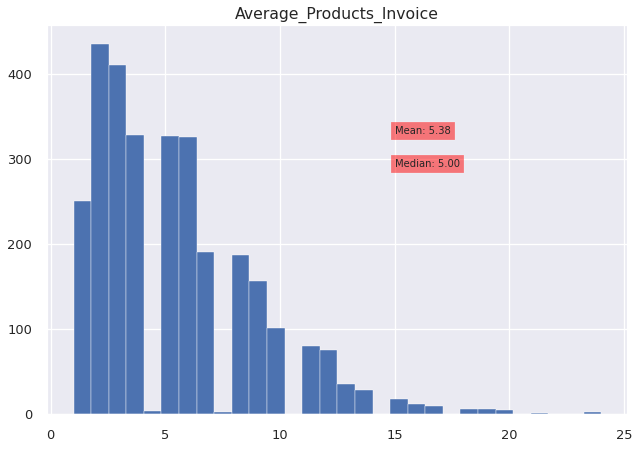

---------------------------------------------------------
count    27663.000000
mean         0.309708
std          0.203726
min          0.000000
25%          0.181818
50%          0.300000
75%          0.416667
max          1.000000
Name: Vegs & Fruits, dtype: float64
Cluster 0


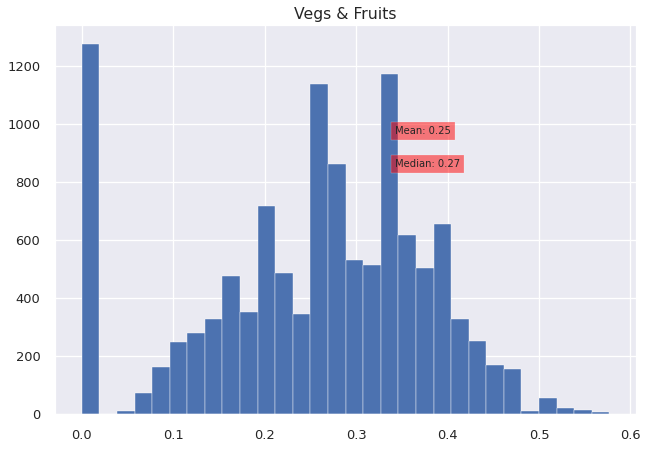

Cluster 1


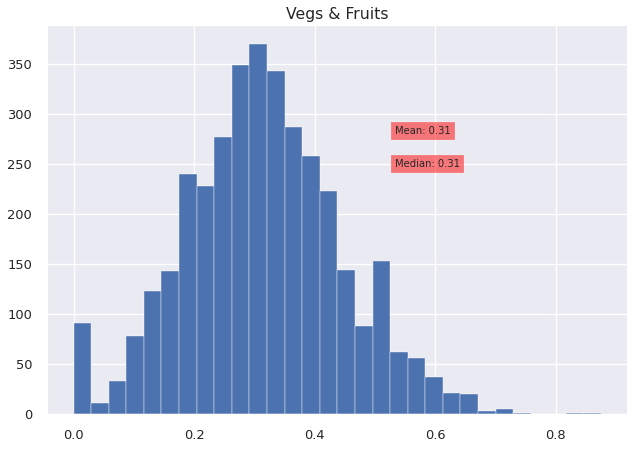

Cluster 2


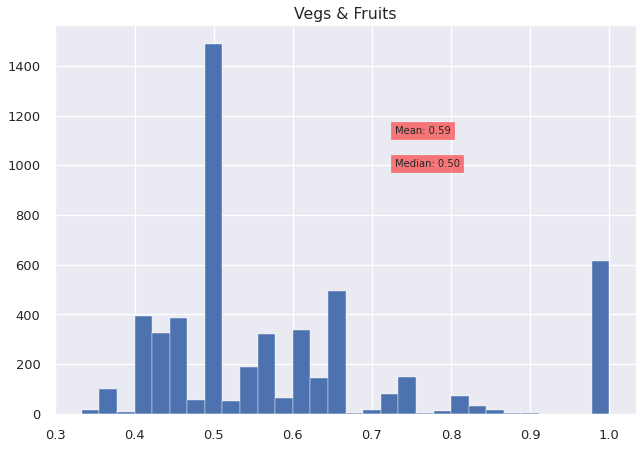

Cluster 3


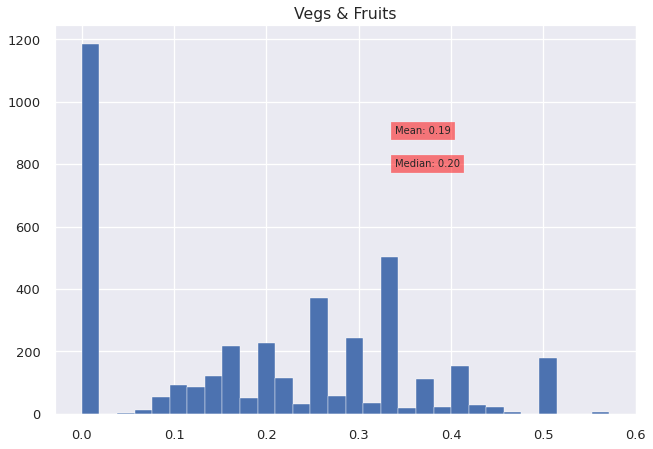

Cluster 4


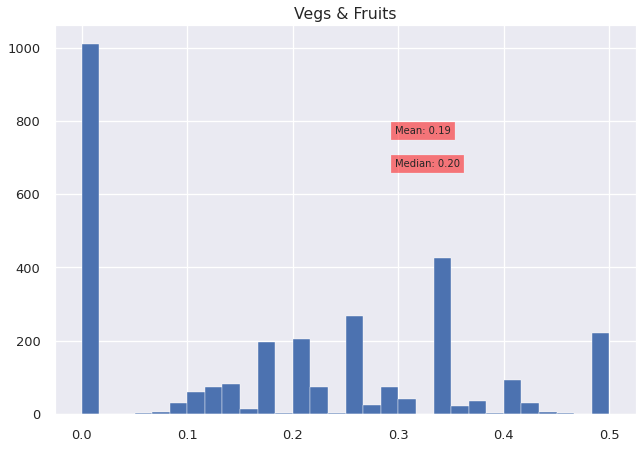

---------------------------------------------------------
count    27663.000000
mean         0.159360
std          0.168831
min          0.000000
25%          0.000000
50%          0.130435
75%          0.234314
max          1.000000
Name: Eggs & Fake Milk, dtype: float64
Cluster 0


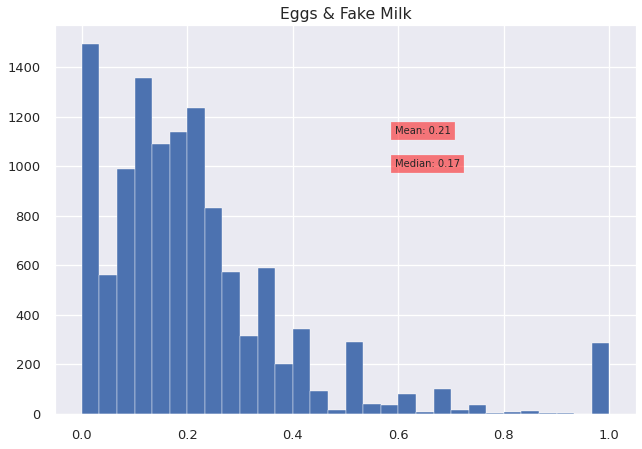

Cluster 1


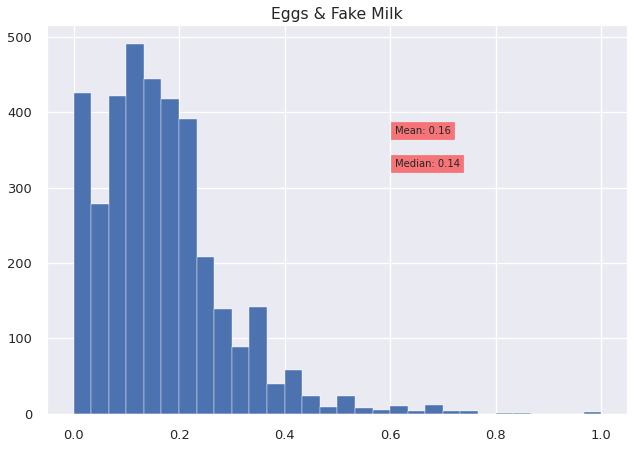

Cluster 2


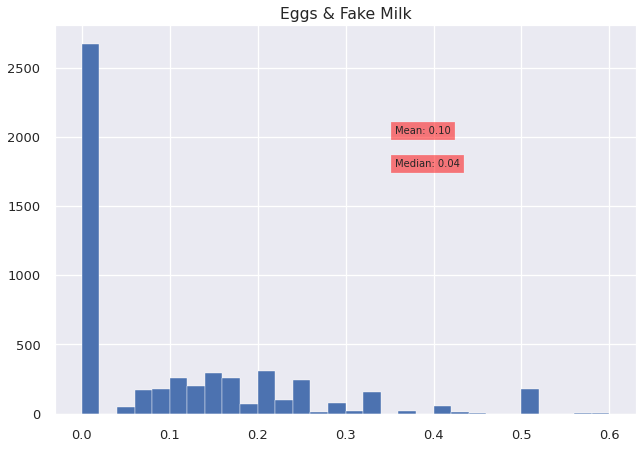

Cluster 3


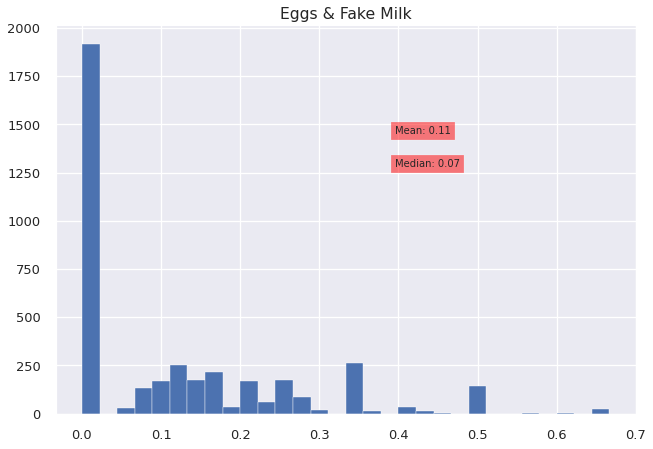

Cluster 4


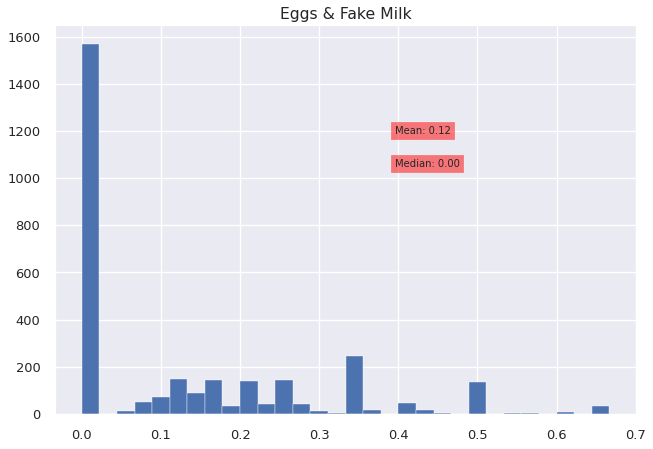

---------------------------------------------------------
count    27663.000000
mean         0.170828
std          0.175178
min          0.000000
25%          0.000000
50%          0.142857
75%          0.250000
max          1.000000
Name: Lots of Fruits, dtype: float64
Cluster 0


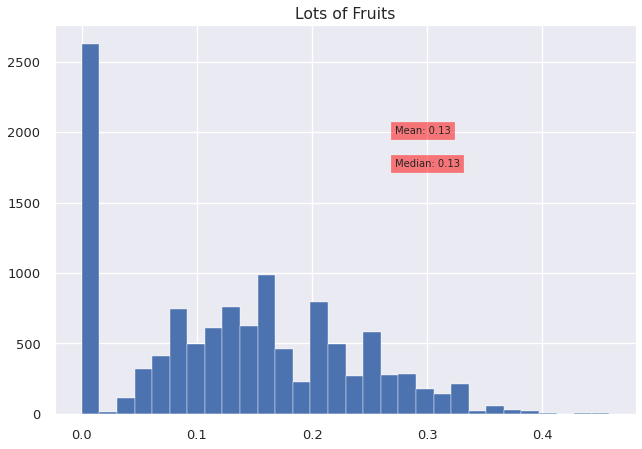

Cluster 1


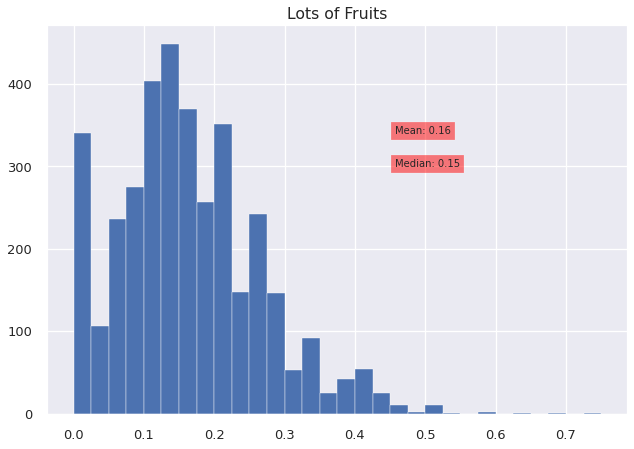

Cluster 2


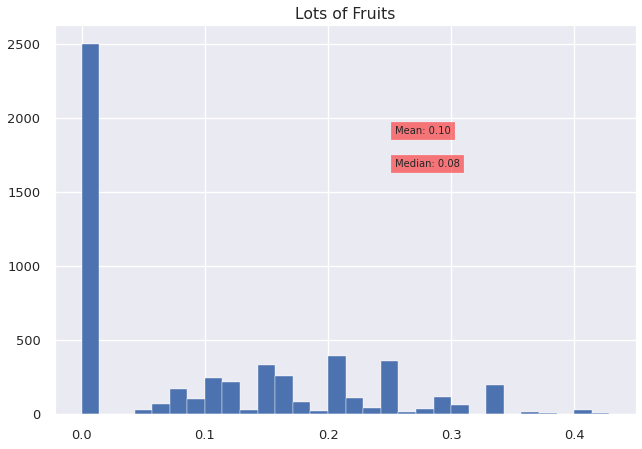

Cluster 3


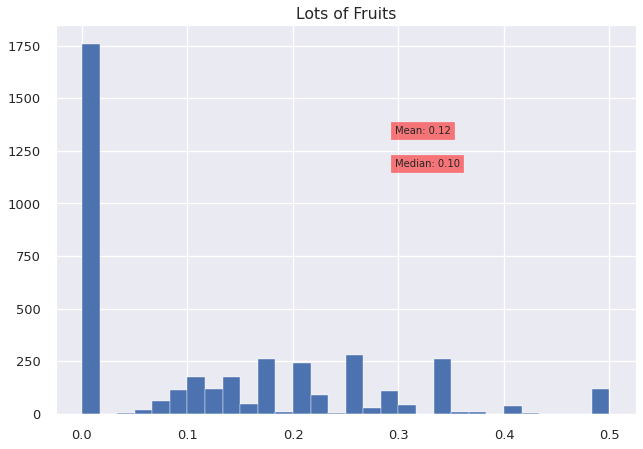

Cluster 4


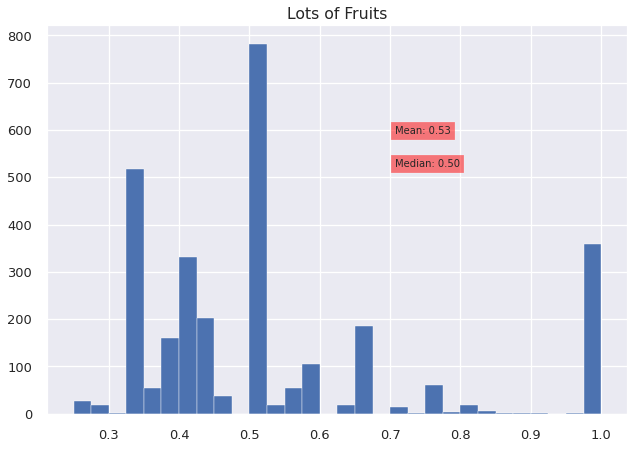

---------------------------------------------------------
count    27663.000000
mean         0.187212
std          0.169397
min          0.000000
25%          0.000000
50%          0.166667
75%          0.272727
max          1.000000
Name: Cheese Lover, dtype: float64
Cluster 0


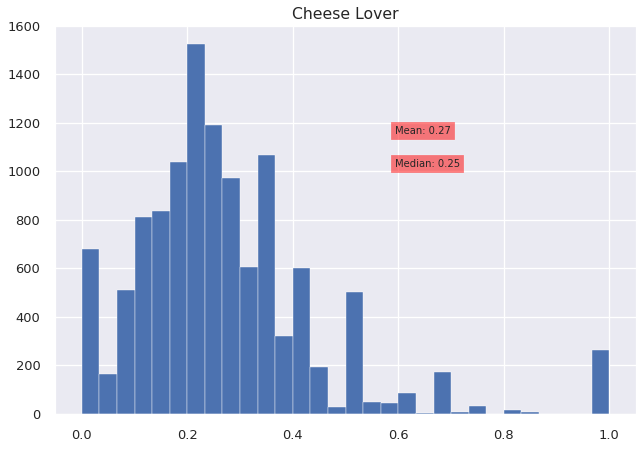

Cluster 1


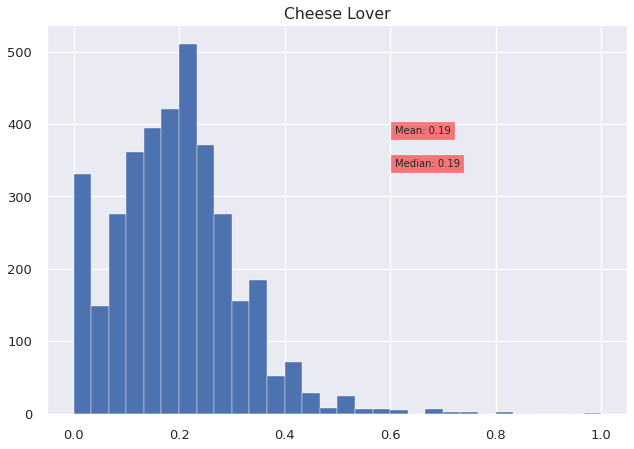

Cluster 2


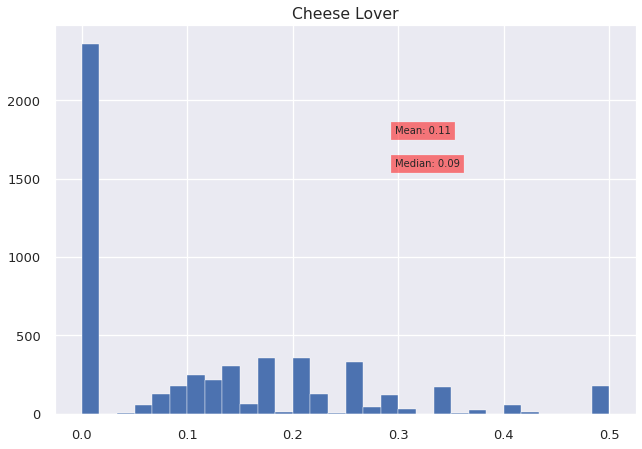

Cluster 3


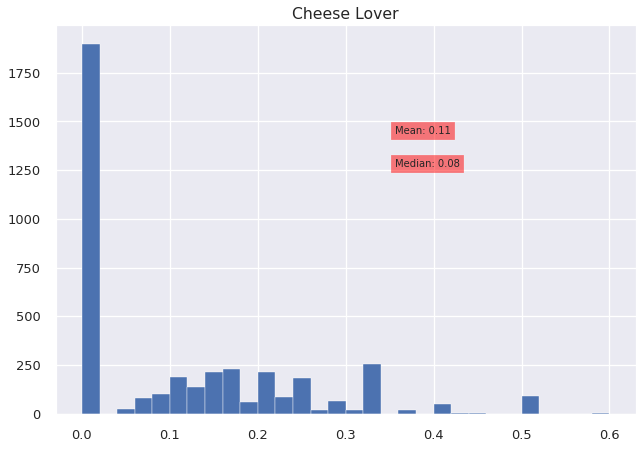

Cluster 4


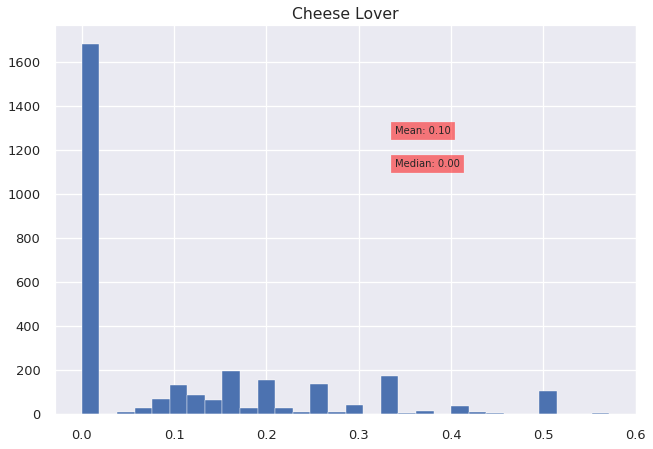

---------------------------------------------------------
count    27663.000000
mean         0.172893
std          0.168889
min          0.000000
25%          0.000000
50%          0.153846
75%          0.250000
max          1.000000
Name: Yogurt Lovers, dtype: float64
Cluster 0


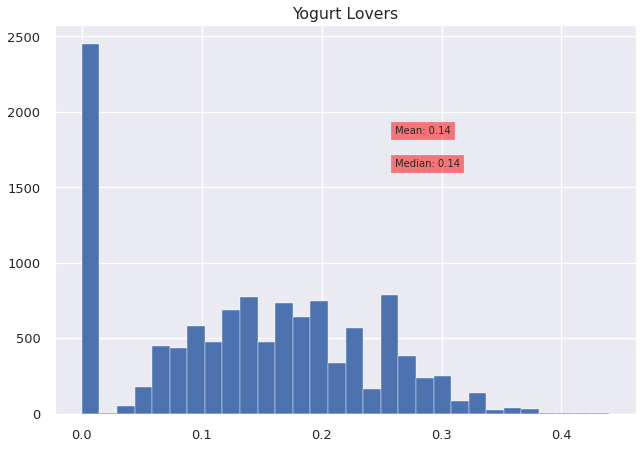

Cluster 1


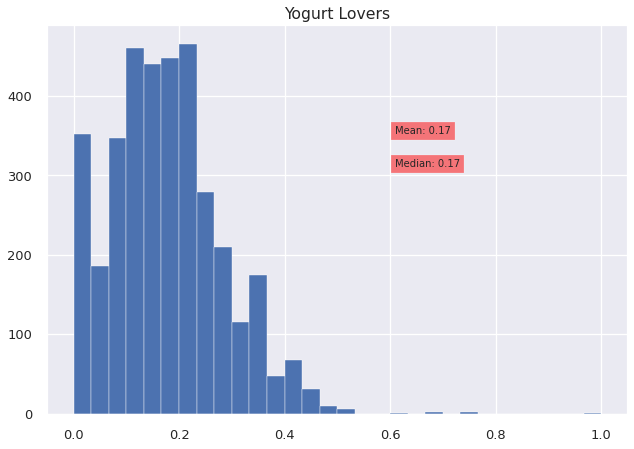

Cluster 2


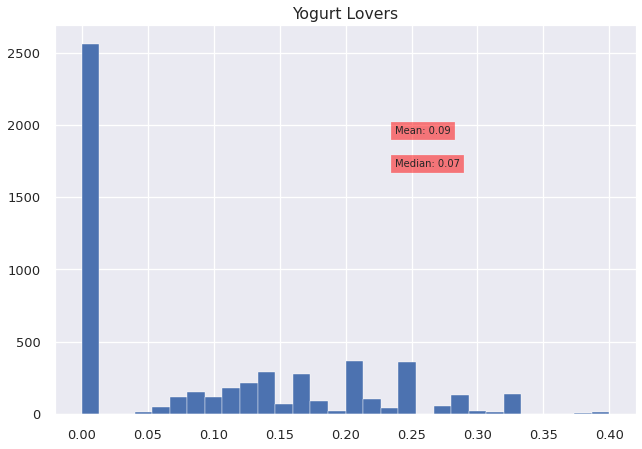

Cluster 3


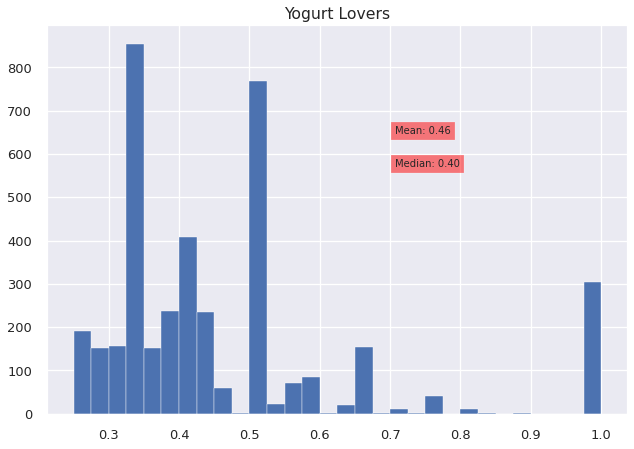

Cluster 4


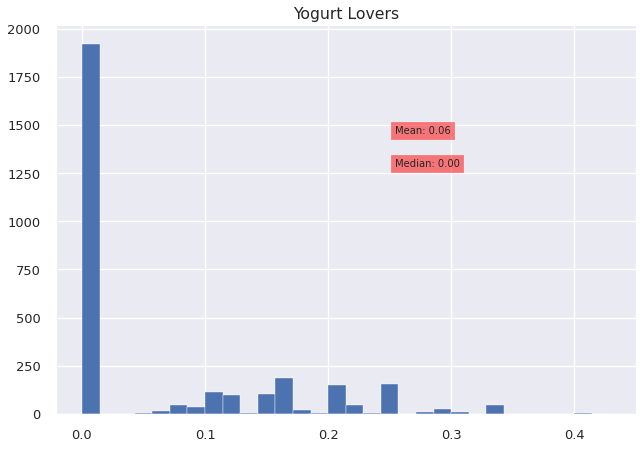

---------------------------------------------------------


In [ ]:
hist_kmeans_clusters(5)

In [ ]:
df_kmeans_clusters(5)

,A/Number_Of_Customers,B/Count_Orders,C/Average_Products_Invoice,D/Vegs & Fruits,E/Eggs & Fake Milk,F/Lots of Fruits,G/Cheese Lover,H/Yogurt Lovers,N/
0,11723,-13.96 %,36.67 %,-18.79 %,31.37 %,-22.86 %,43.14 %,-19.40 %,-19.40 %
1,3646,87.65 %,4.76 %,1.37 %,1.47 %,-5.42 %,1.51 %,-0.09 %,-0.09 %
2,5360,-13.19 %,-30.49 %,90.42 %,-36.03 %,-41.83 %,-38.85 %,-45.36 %,-45.36 %
3,3944,-12.72 %,-36.67 %,-38.06 %,-28.16 %,-28.93 %,-41.21 %,167.33 %,167.33 %
4,2990,-11.69 %,-46.54 %,-39.91 %,-23.05 %,209.37 %,-46.99 %,-63.25 %,-63.25 %


count    27663.000000
mean         1.162311
std          0.438266
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: Count_Orders, dtype: float64
Cluster 0


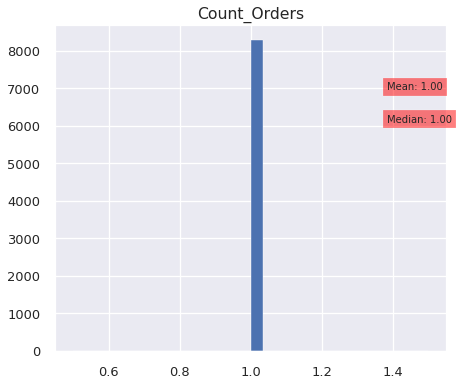

Cluster 1


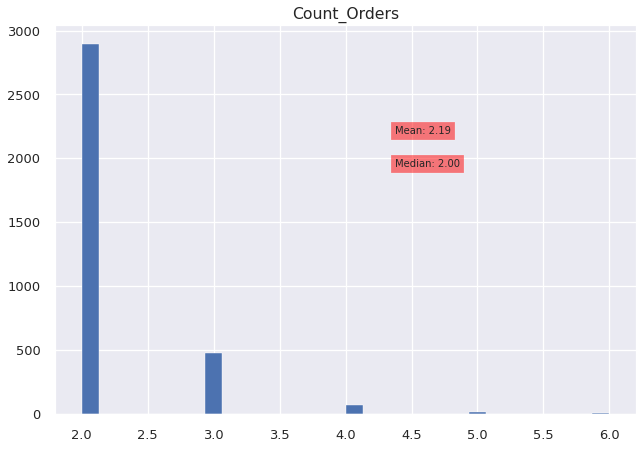

Cluster 2


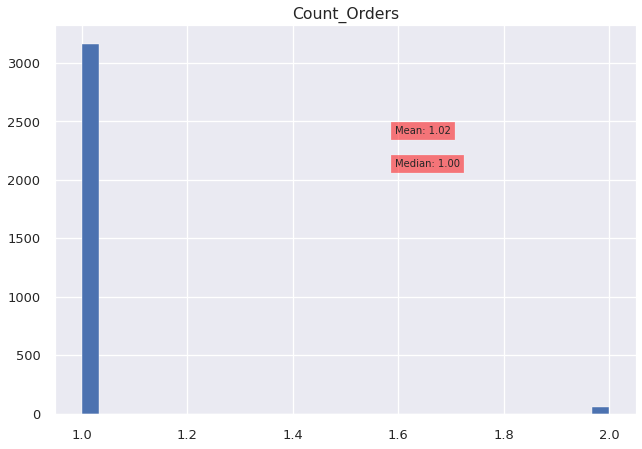

Cluster 3


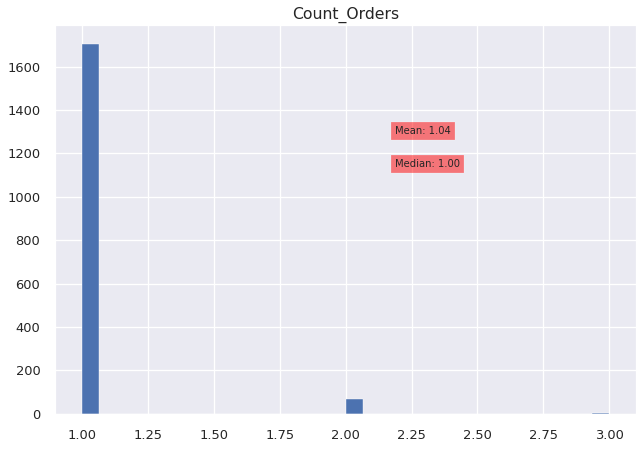

Cluster 4


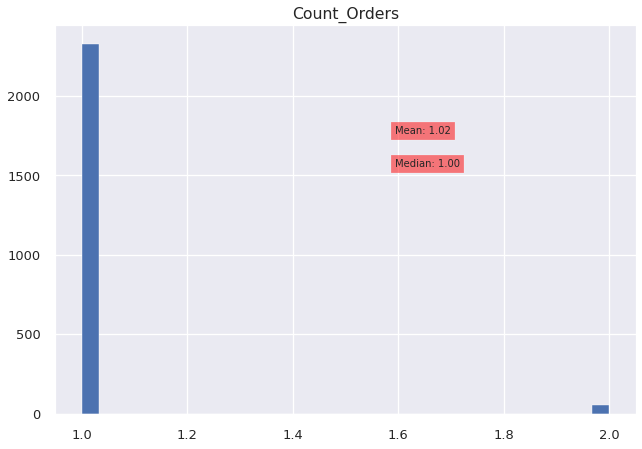

Cluster 5


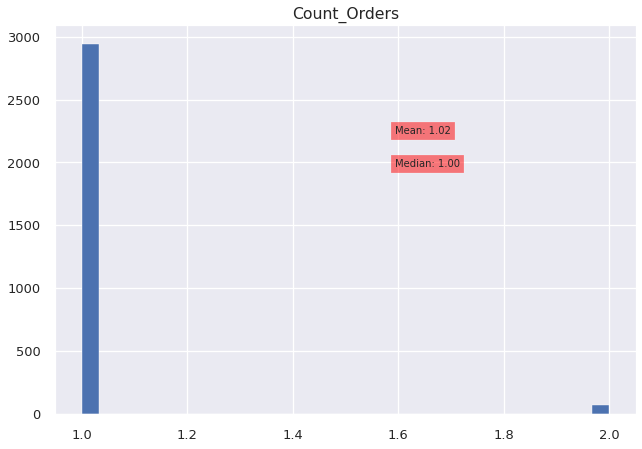

Cluster 6


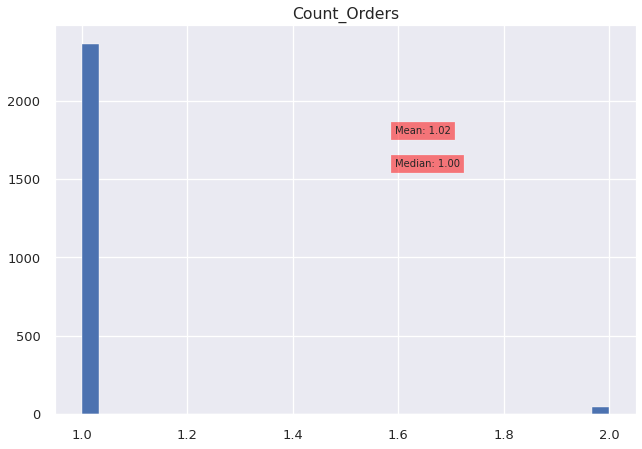

Cluster 7


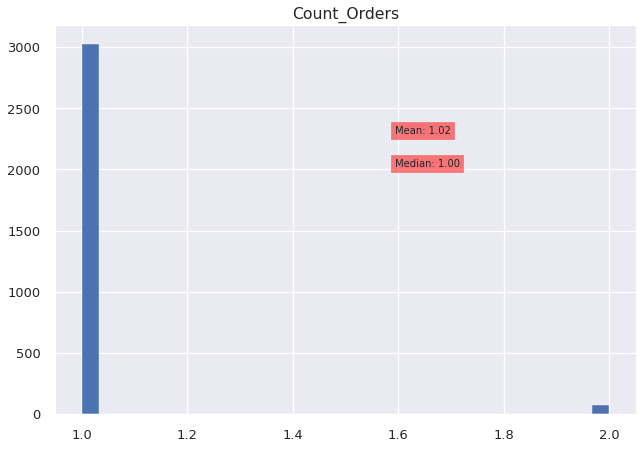

---------------------------------------------------------
count    27663.000000
mean        10.067387
std          7.391124
min          1.000000
25%          5.000000
50%          8.000000
75%         14.000000
max         71.000000
Name: Average_Products_Invoice, dtype: float64
Cluster 0


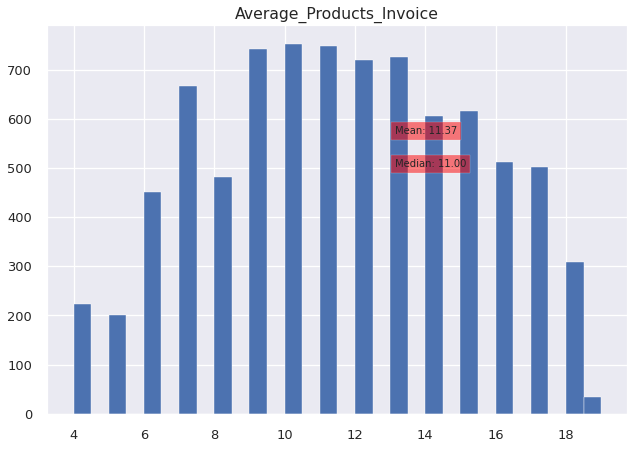

Cluster 1


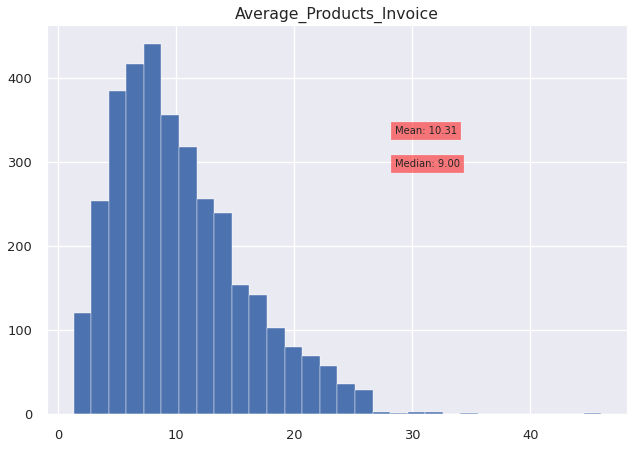

Cluster 2


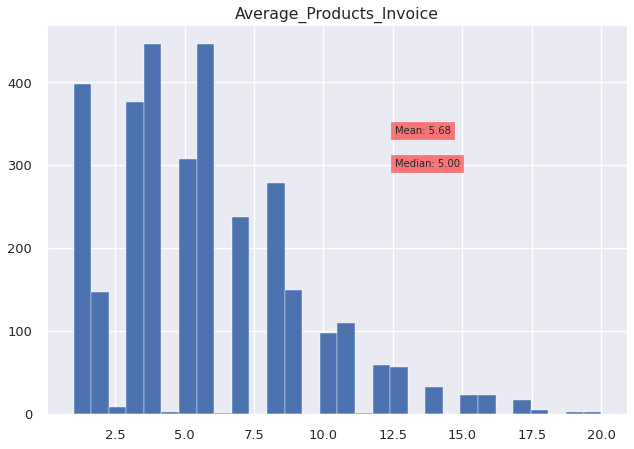

Cluster 3


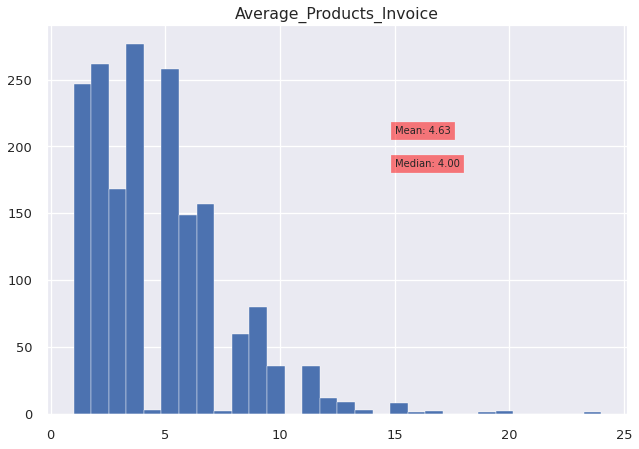

Cluster 4


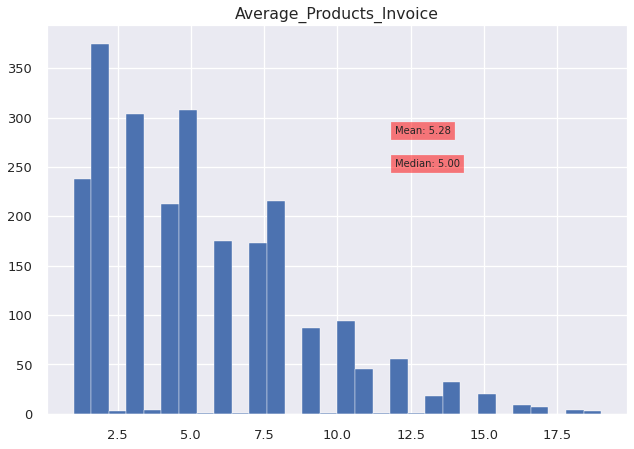

Cluster 5


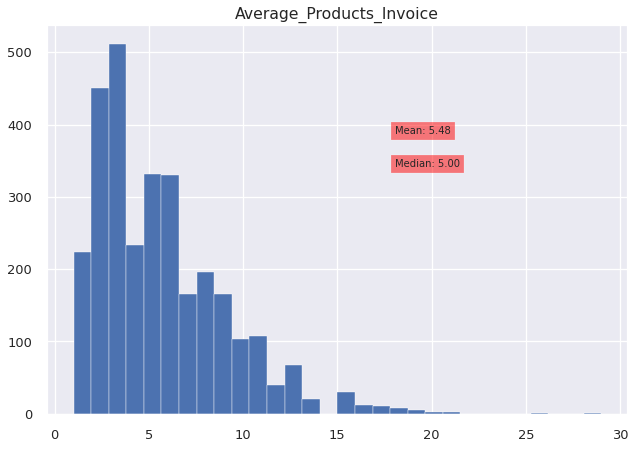

Cluster 6


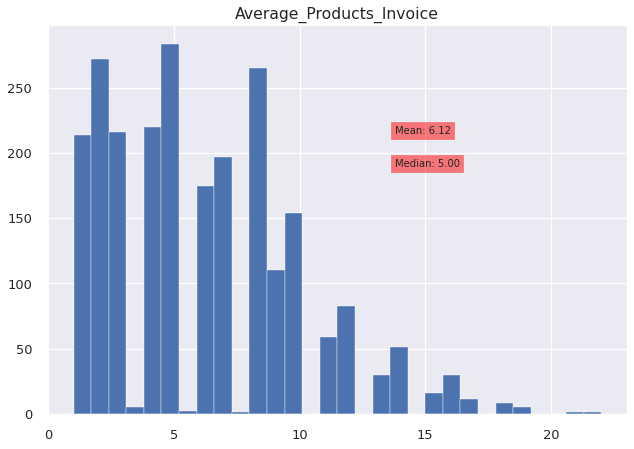

Cluster 7


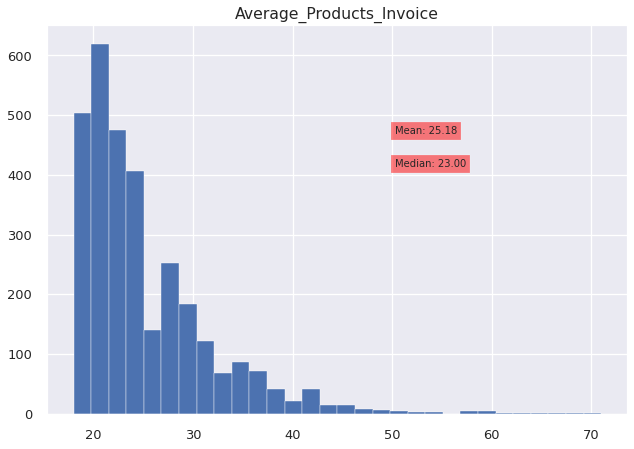

---------------------------------------------------------
count    27663.000000
mean         0.309708
std          0.203726
min          0.000000
25%          0.181818
50%          0.300000
75%          0.416667
max          1.000000
Name: Vegs & Fruits, dtype: float64
Cluster 0


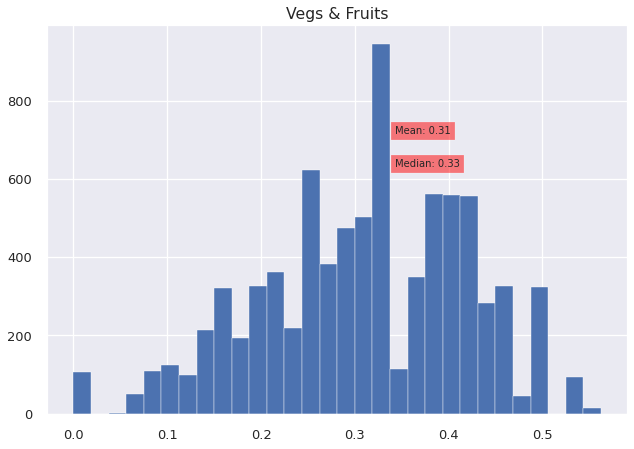

Cluster 1


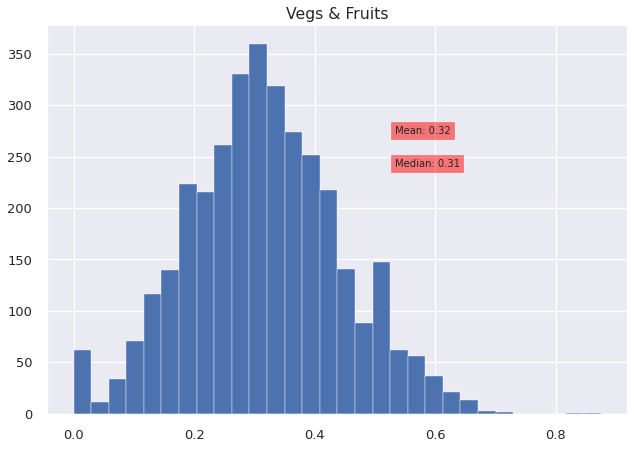

Cluster 2


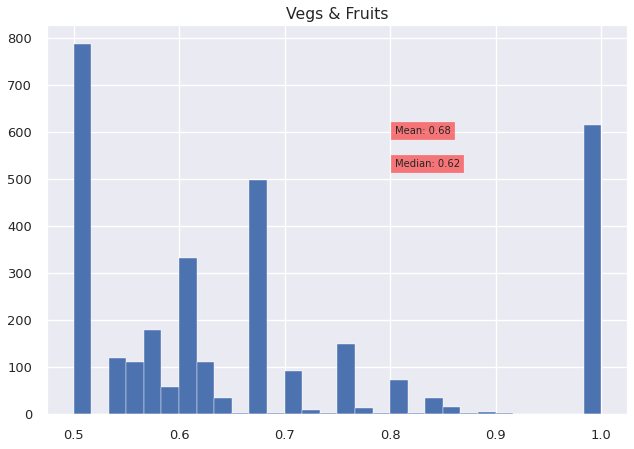

Cluster 3


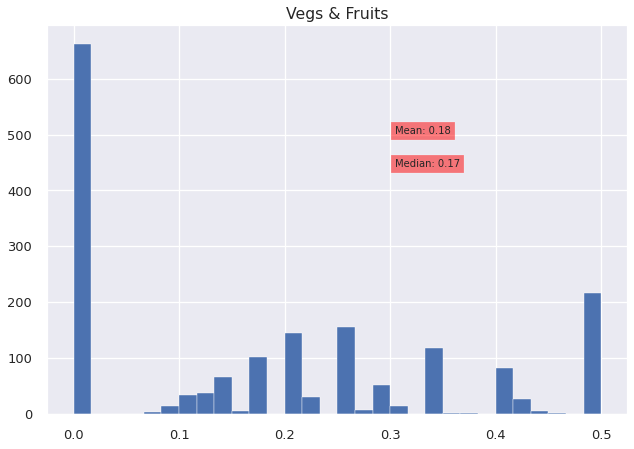

Cluster 4


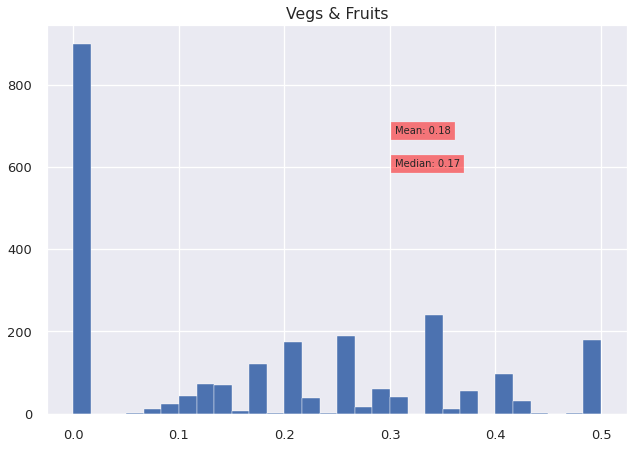

Cluster 5


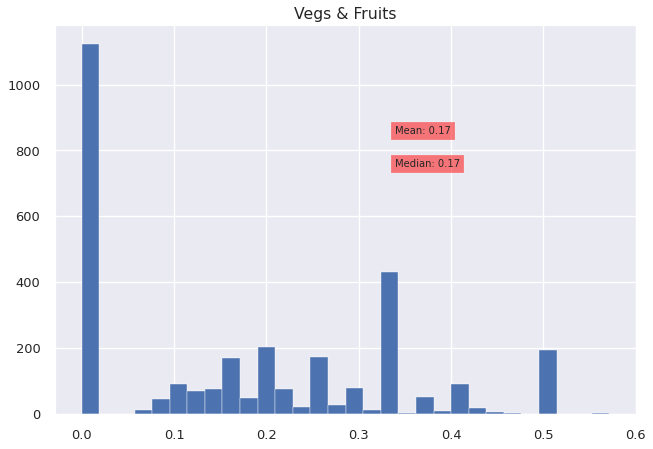

Cluster 6


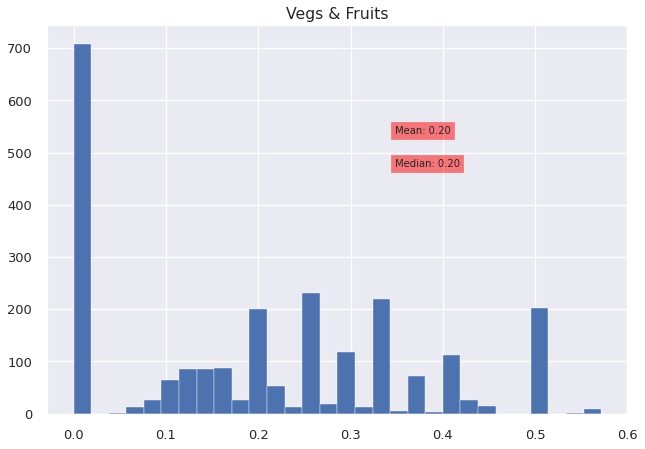

Cluster 7


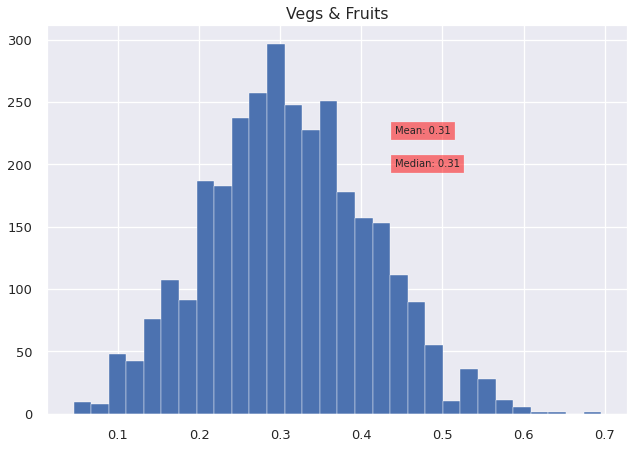

---------------------------------------------------------
count    27663.000000
mean         0.159360
std          0.168831
min          0.000000
25%          0.000000
50%          0.130435
75%          0.234314
max          1.000000
Name: Eggs & Fake Milk, dtype: float64
Cluster 0


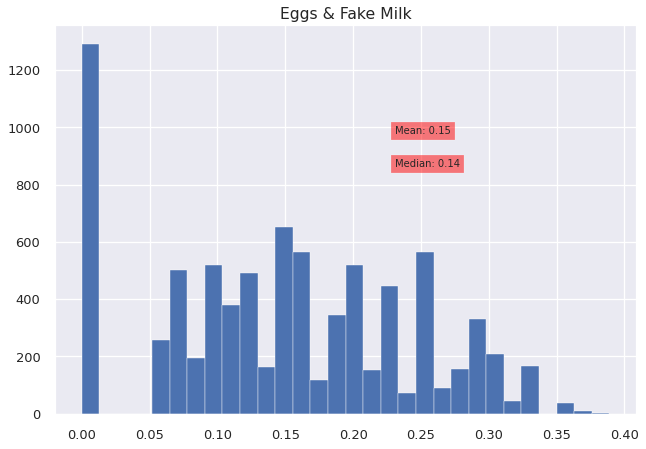

Cluster 1


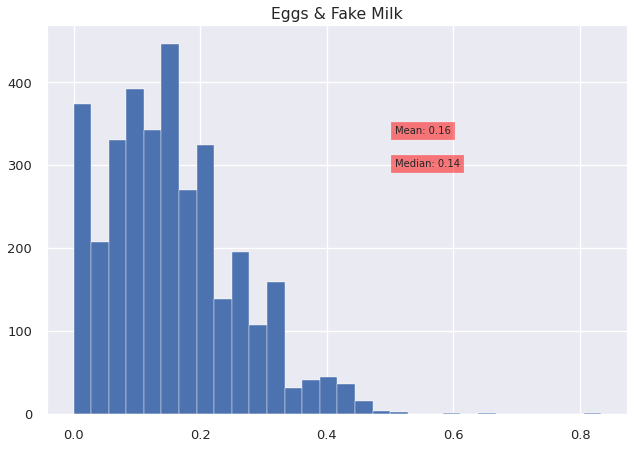

Cluster 2


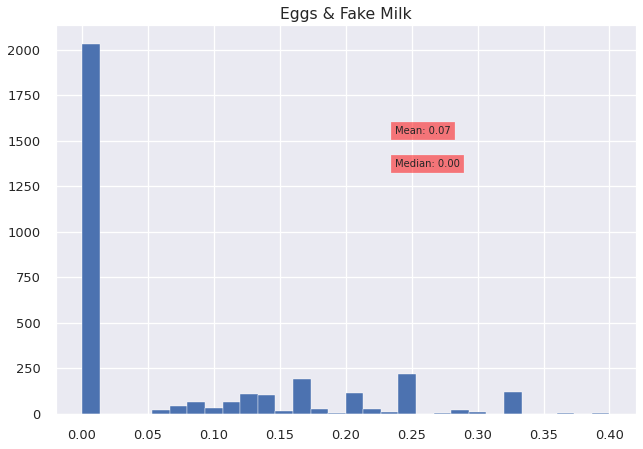

Cluster 3


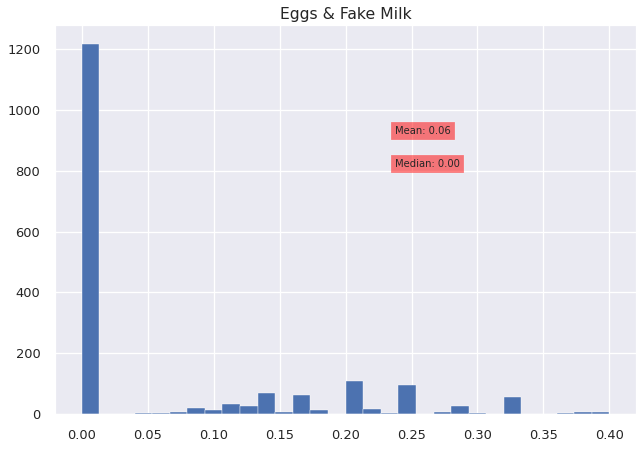

Cluster 4


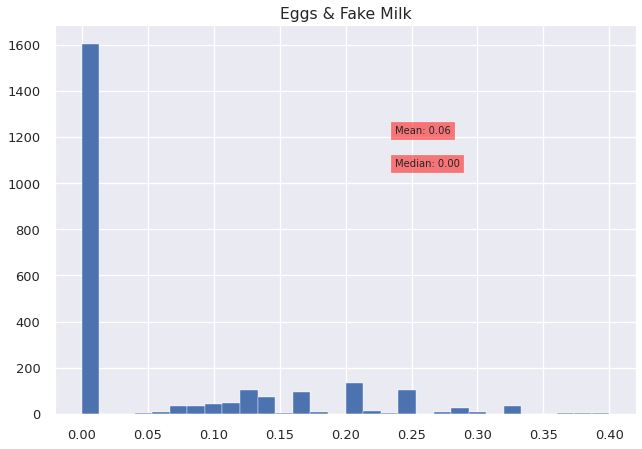

Cluster 5


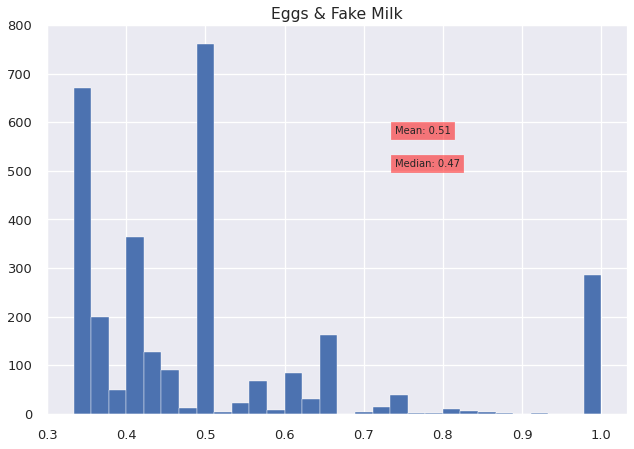

Cluster 6


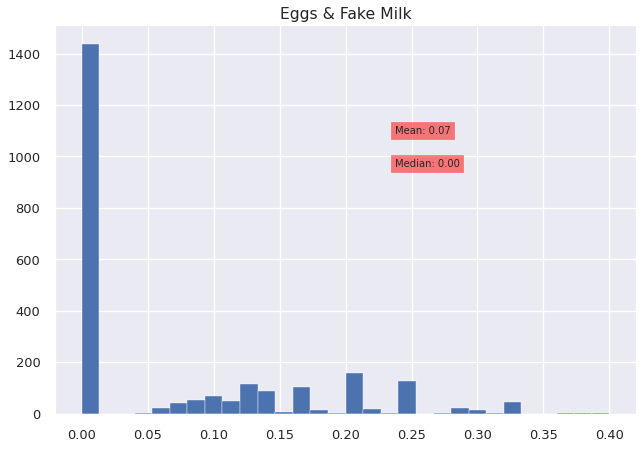

Cluster 7


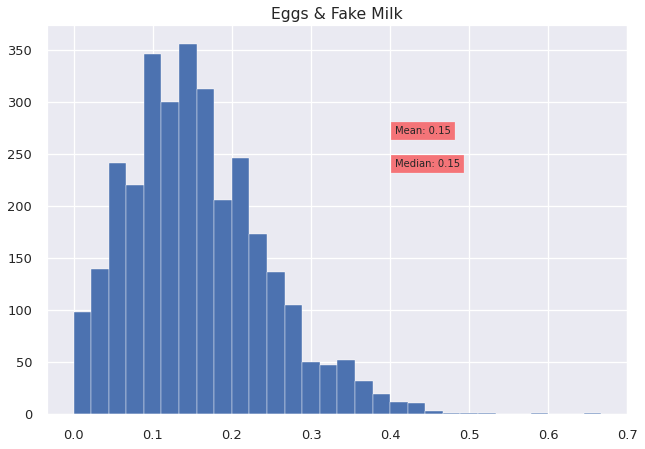

---------------------------------------------------------
count    27663.000000
mean         0.170828
std          0.175178
min          0.000000
25%          0.000000
50%          0.142857
75%          0.250000
max          1.000000
Name: Lots of Fruits, dtype: float64
Cluster 0


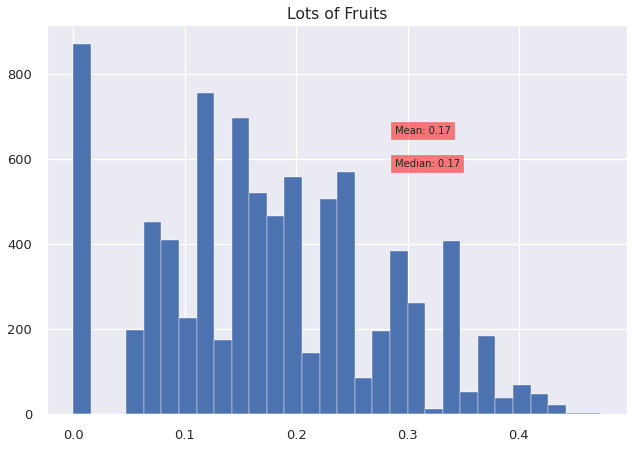

Cluster 1


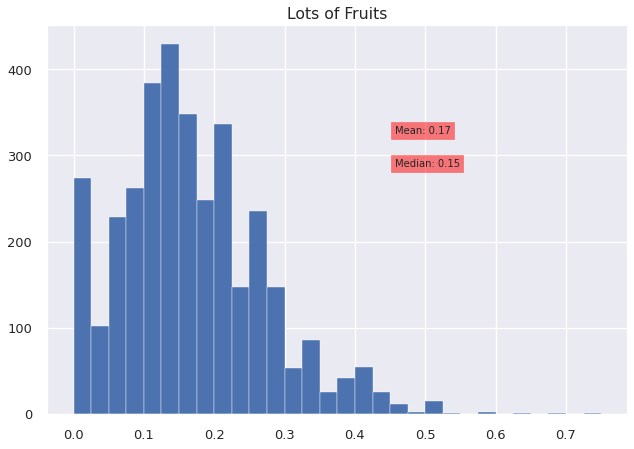

Cluster 2


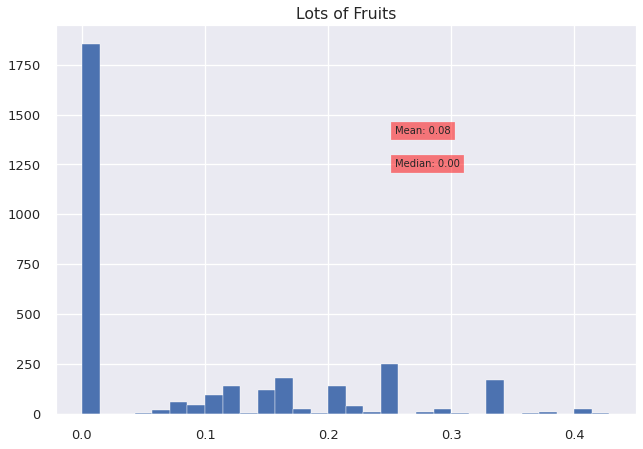

Cluster 3


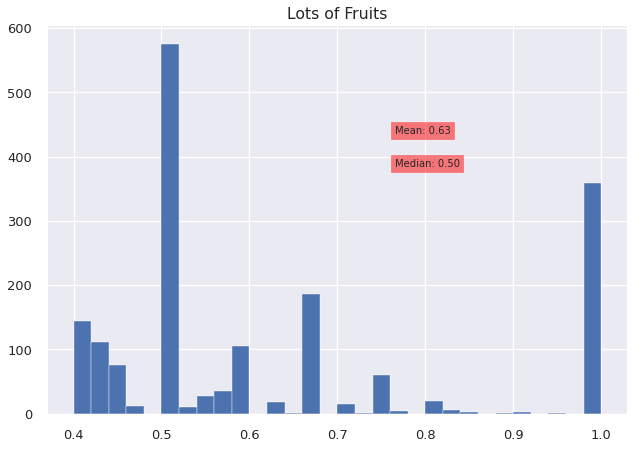

Cluster 4


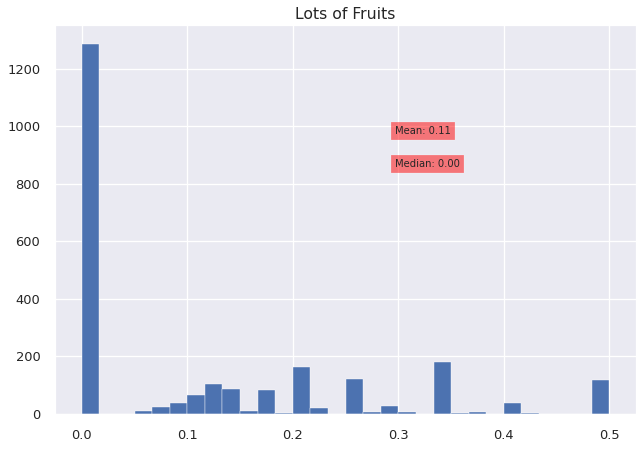

Cluster 5


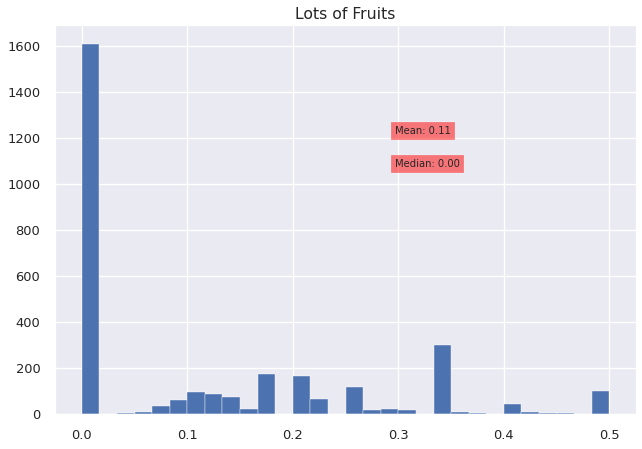

Cluster 6


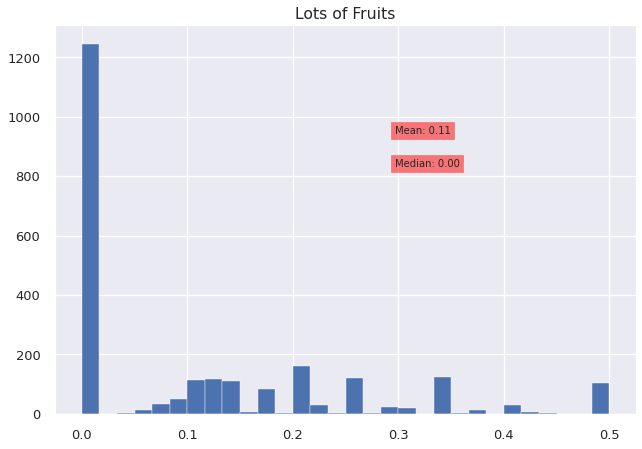

Cluster 7


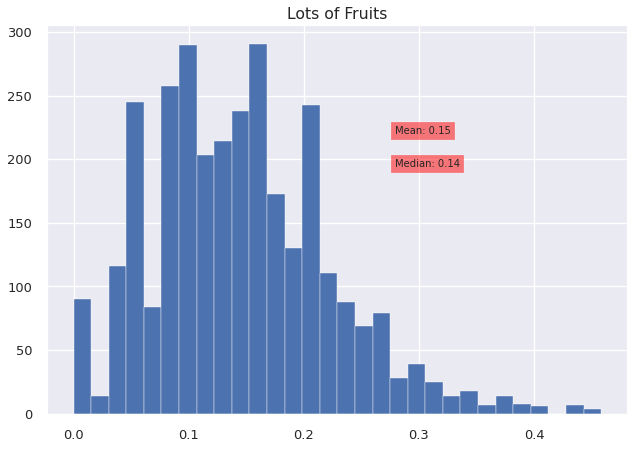

---------------------------------------------------------
count    27663.000000
mean         0.187212
std          0.169397
min          0.000000
25%          0.000000
50%          0.166667
75%          0.272727
max          1.000000
Name: Cheese Lover, dtype: float64
Cluster 0


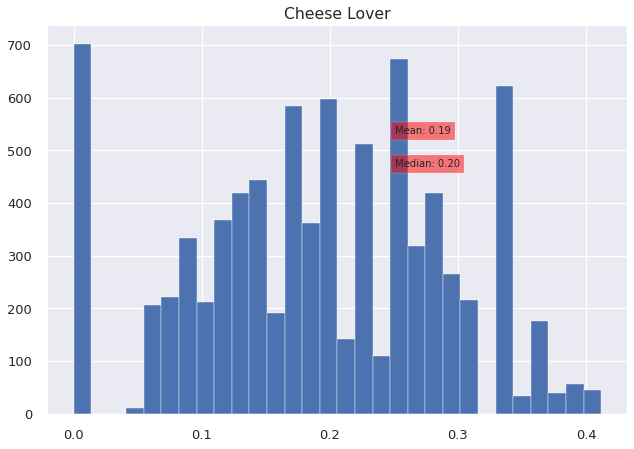

Cluster 1


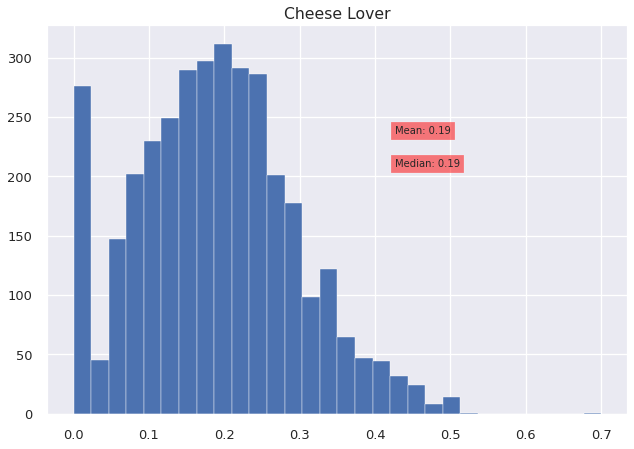

Cluster 2


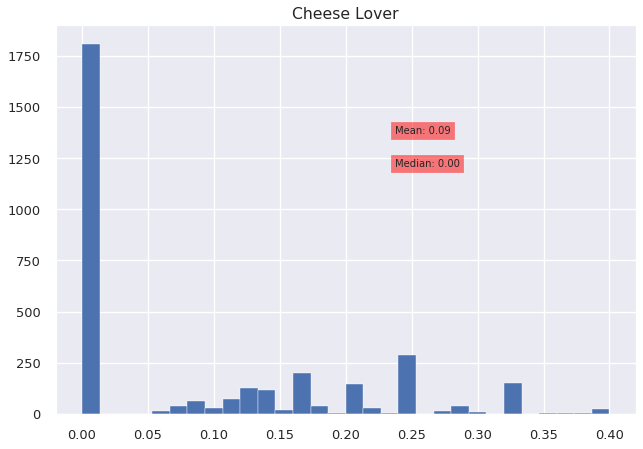

Cluster 3


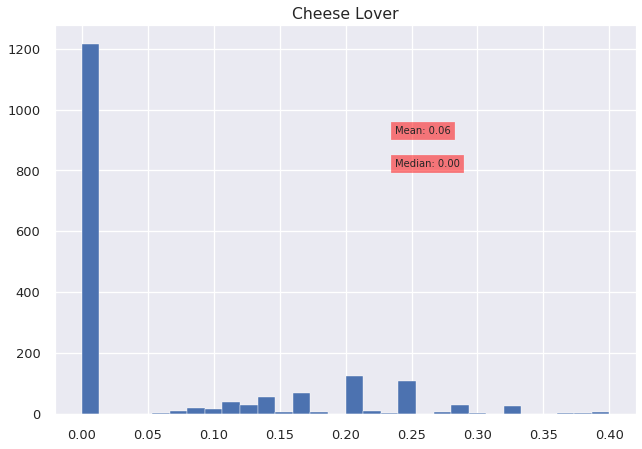

Cluster 4


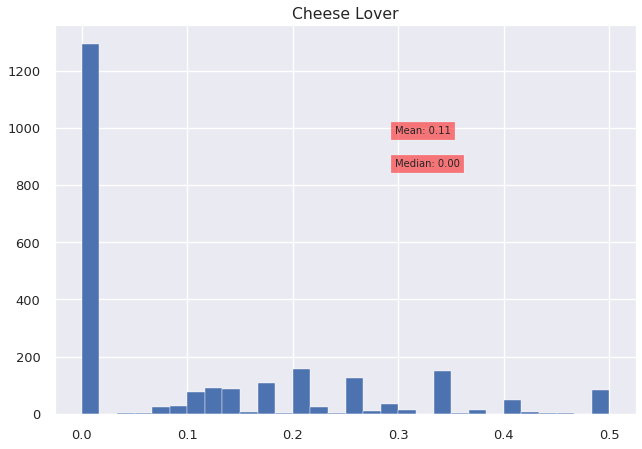

Cluster 5


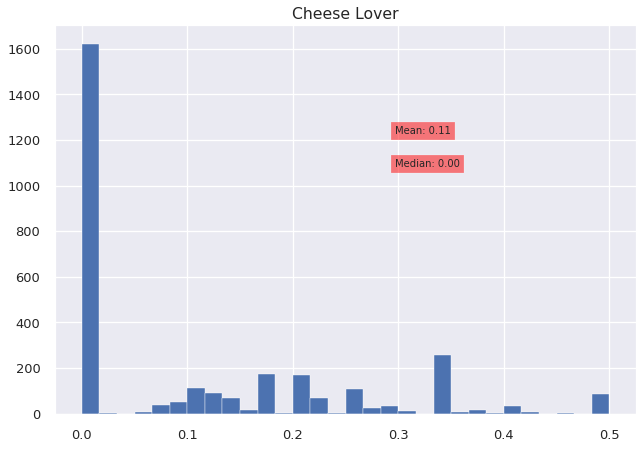

Cluster 6


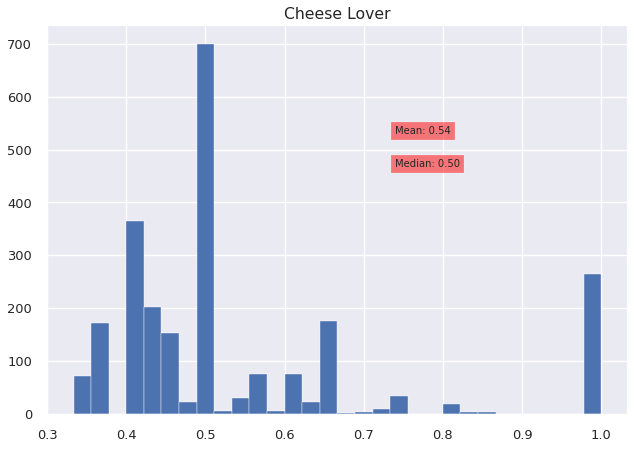

Cluster 7


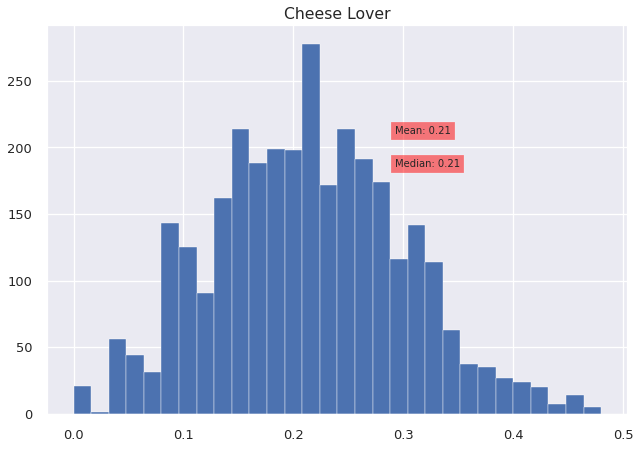

---------------------------------------------------------
count    27663.000000
mean         0.172893
std          0.168889
min          0.000000
25%          0.000000
50%          0.153846
75%          0.250000
max          1.000000
Name: Yogurt Lovers, dtype: float64
Cluster 0


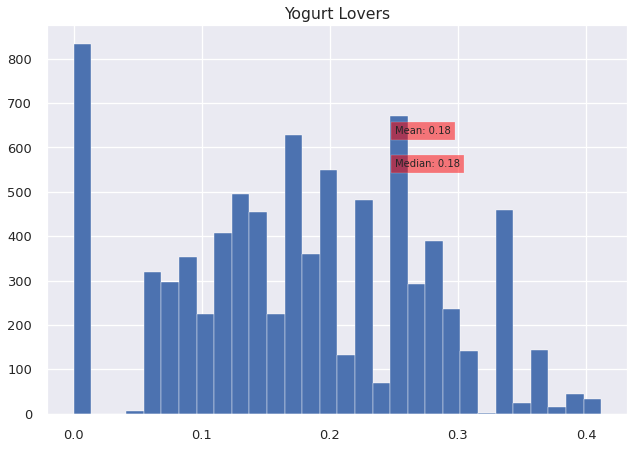

Cluster 1


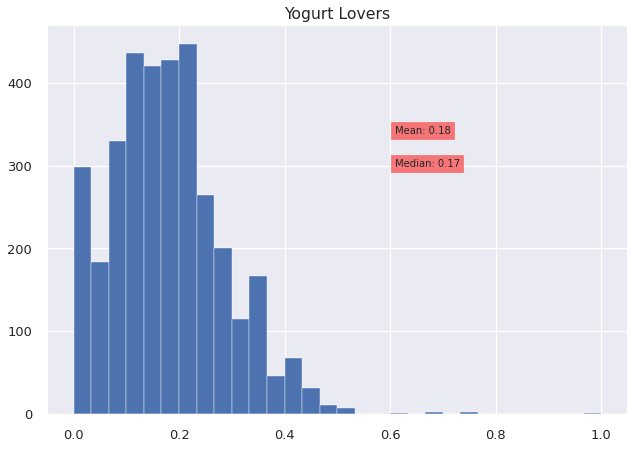

Cluster 2


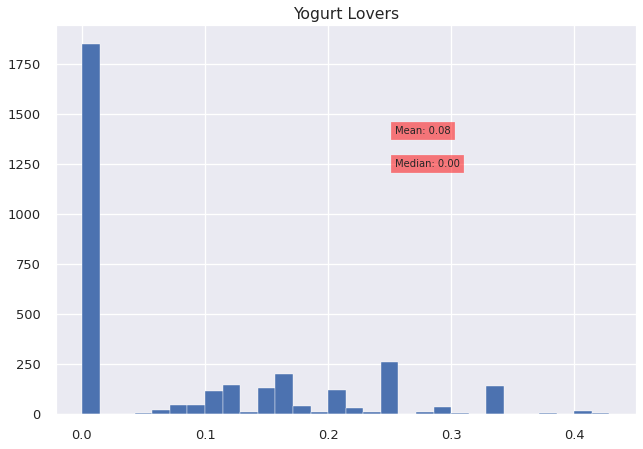

Cluster 3


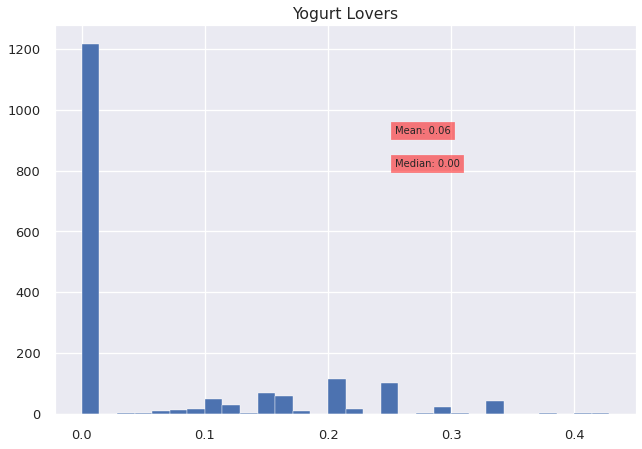

Cluster 4


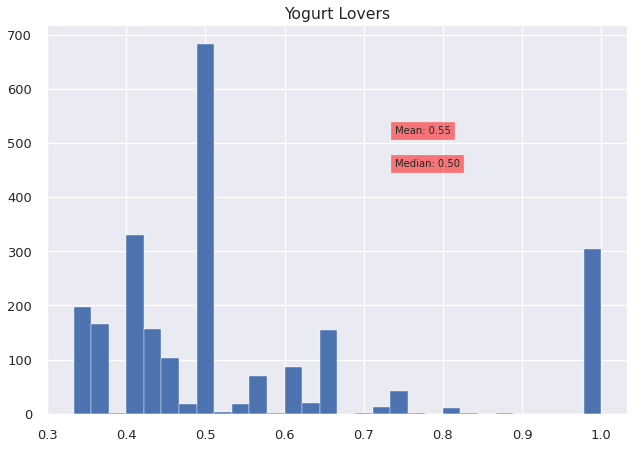

Cluster 5


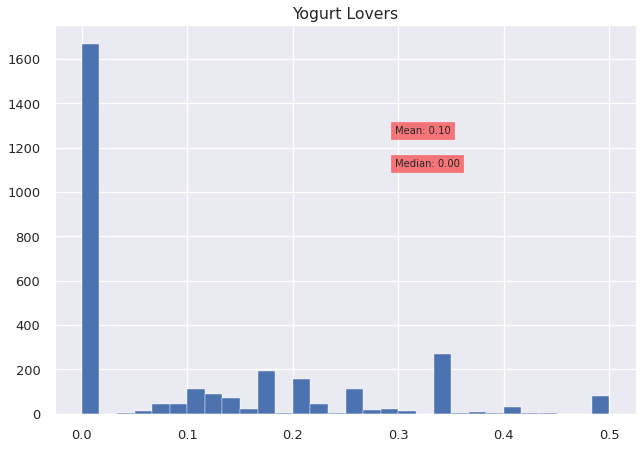

Cluster 6


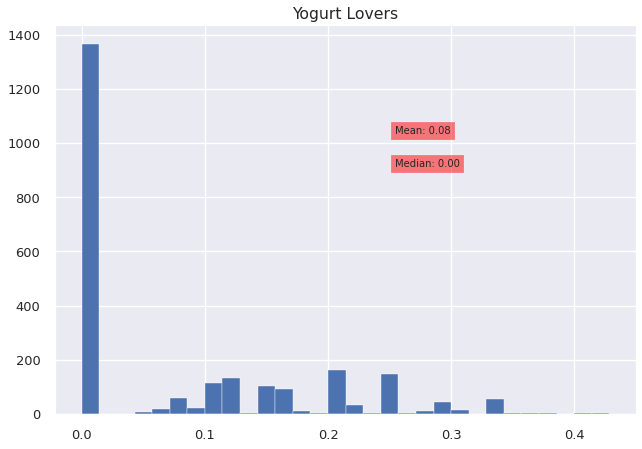

Cluster 7


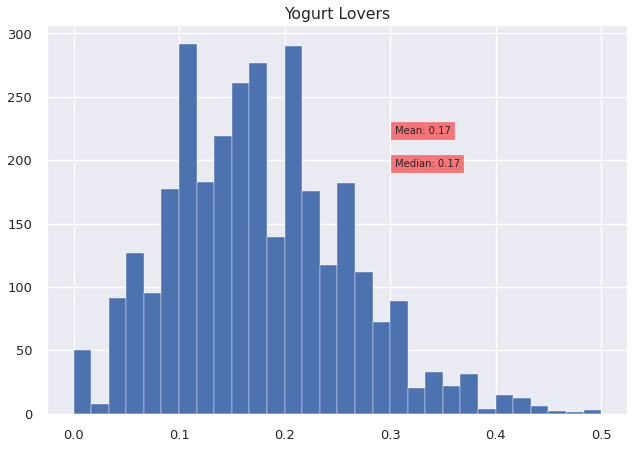

---------------------------------------------------------


In [ ]:
hist_kmeans_clusters(8)

In [ ]:
df_kmeans_clusters(8)

,A/Number_Of_Customers,B/Count_Orders,C/Average_Products_Invoice,D/Vegs & Fruits,E/Eggs & Fake Milk,F/Lots of Fruits,G/Cheese Lover,H/Yogurt Lovers,N/
0,8285,-13.96 %,12.97 %,0.27 %,-7.43 %,2.23 %,2.00 %,2.00 %,2.00 %
1,3460,88.48 %,2.39 %,2.26 %,-2.54 %,-3.20 %,0.04 %,1.42 %,1.42 %
2,3225,-12.39 %,-43.57 %,118.78 %,-56.59 %,-50.61 %,-53.55 %,-52.62 %,-52.62 %
3,1774,-10.62 %,-54.03 %,-40.49 %,-60.25 %,268.75 %,-67.26 %,-64.65 %,-64.65 %
4,2386,-11.98 %,-47.58 %,-43.10 %,-63.96 %,-34.47 %,-41.90 %,215.59 %,215.59 %
5,3017,-11.97 %,-45.60 %,-44.58 %,217.36 %,-34.55 %,-42.28 %,-40.58 %,-40.58 %
6,2410,-12.47 %,-39.17 %,-35.53 %,-55.98 %,-36.83 %,190.49 %,-54.64 %,-54.64 %
7,3106,-11.89 %,150.10 %,0.55 %,-2.75 %,-14.70 %,14.08 %,0.84 %,0.84 %


In [ ]:
def hist_dbscan_clusters(epsilon, minimum):
    ''' For each feature this fonction plot histograms of your dbscan model's clusters.
    
    Parameters:
      
      epsilon (float): the value of eps in DBSCAN clustering
      minimum (int): the value of min_samples in DBSCAN clustering
      
  '''
  
    dbsc = DBSCAN(eps =epsilon, min_samples = minimum).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels))
  
    fig, ax = plt.subplots(figsize=(7,6))

    for i in ['Count_Orders', 'Average_Products_Invoice', 'Vegs & Fruits', 
               'Eggs & Fake Milk', 'Lots of Fruits', 'Cheese Lover', 
               'Yogurt Lovers']:
        print(df_customers[i].describe())

        for id_cluster in range(-1, n_clusters_ -1):
            print("Cluster %d" % id_cluster)
            index = np.where(labels == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Median = df_customers[i][index].median()
            plt.hist(df_customers[i][index], bins = 30)
            plt.text(0.85, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
                    transform=ax.transAxes)
            plt.text(0.85, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                    alpha=0.5),
                    transform=ax.transAxes)
            plt.title(i)
            plt.show()
        print('---------------------------------------------------------')

In [ ]:
def df_dbscan_clusters(epsilon, minimum):
    ''' Show a dataframe with the average percentage difference betwean the mean 
        of each feature and the value of each point for each dbscan model's clusters.
  
    Parameters:
      
        epsilon (float): the value of eps in DBSCAN clustering
        minimum (int): the value of min_samples in DBSCAN clustering
      
    '''
  
    dbsc = DBSCAN(eps =epsilon, min_samples = minimum).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels))
    my_dict={}
    alphabet = 'BCDEFGHIJKLM'
    my_dict['A/Number_Of_Customers'] = [len(np.where(labels == id_cluster)[0])
                                      for id_cluster in range(-1, n_clusters_ -1)]

    for h,i in enumerate(['Count_Orders', 'Average_Products_Invoice', 'Vegs & Fruits', 
                          'Eggs & Fake Milk', 'Lots of Fruits', 'Cheese Lover', 
                          'Yogurt Lovers']):
        feature = []

        for id_cluster in range(-1, n_clusters_ -1):
            index = np.where(labels == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Mean_feature = df_customers[i].mean()
            pourcentage_mean = str('%.2f' % ((Mean - Mean_feature)*100/Mean_feature)) + ' %'
            feature.append(pourcentage_mean)
      
        my_dict[alphabet[h] + '/' + i] = feature
     
    Clusters_df = pd.DataFrame(my_dict, index=range(-1, n_clusters_ -1))
  
    return Clusters_df.head(n_clusters_)

count    27663.000000
mean         1.162311
std          0.438266
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: Count_Orders, dtype: float64
Cluster -1


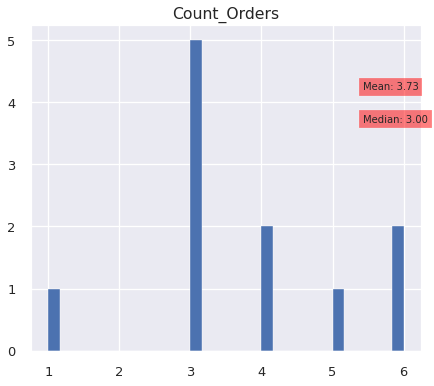

Cluster 0


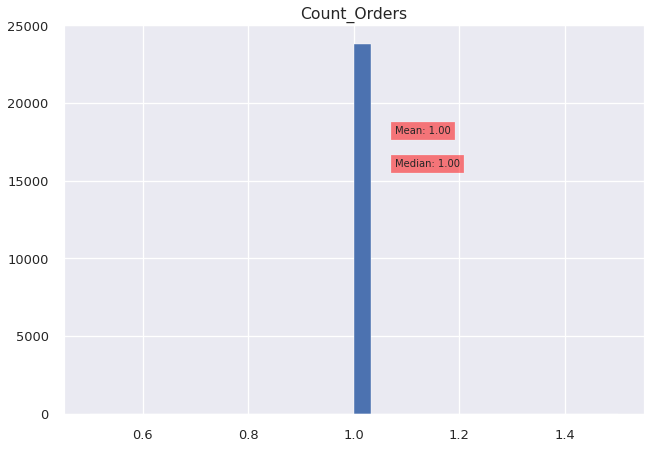

Cluster 1


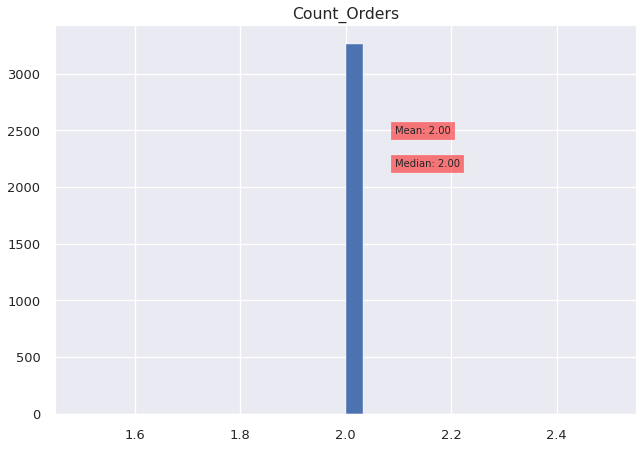

Cluster 2


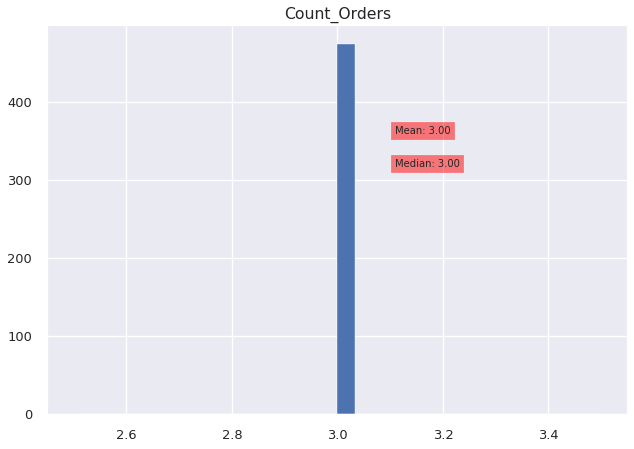

Cluster 3


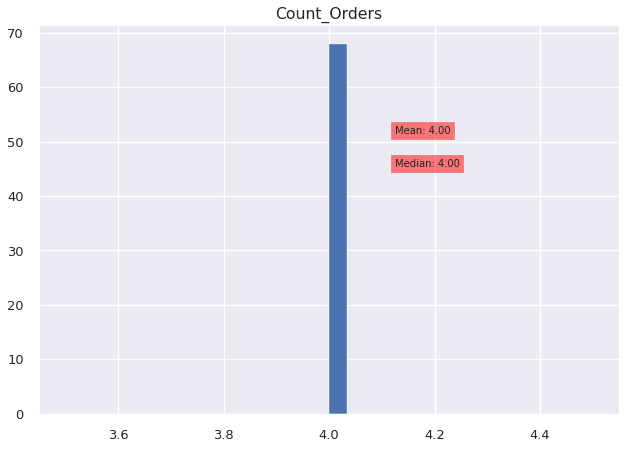

Cluster 4


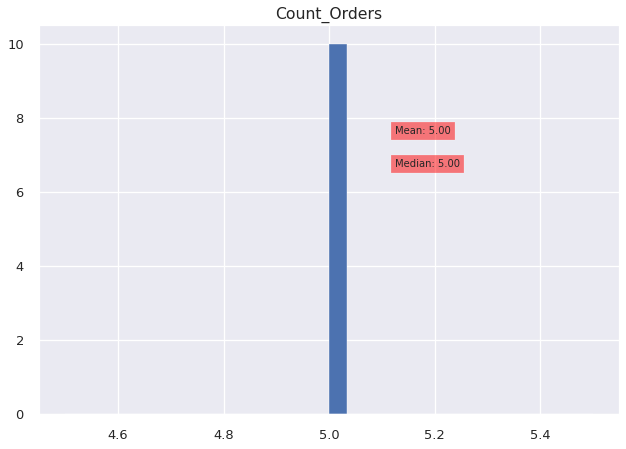

---------------------------------------------------------
count    27663.000000
mean        10.067387
std          7.391124
min          1.000000
25%          5.000000
50%          8.000000
75%         14.000000
max         71.000000
Name: Average_Products_Invoice, dtype: float64
Cluster -1


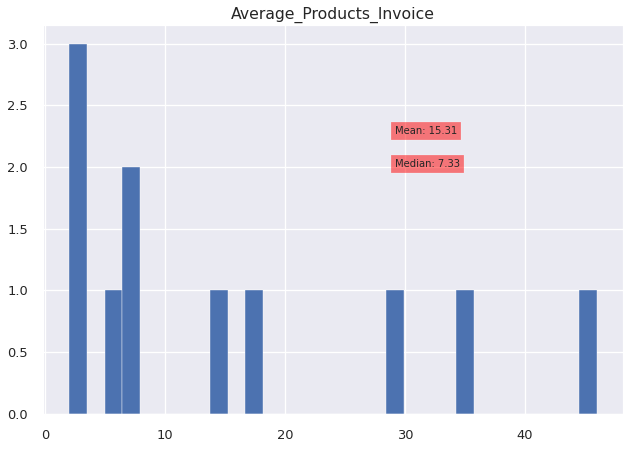

Cluster 0


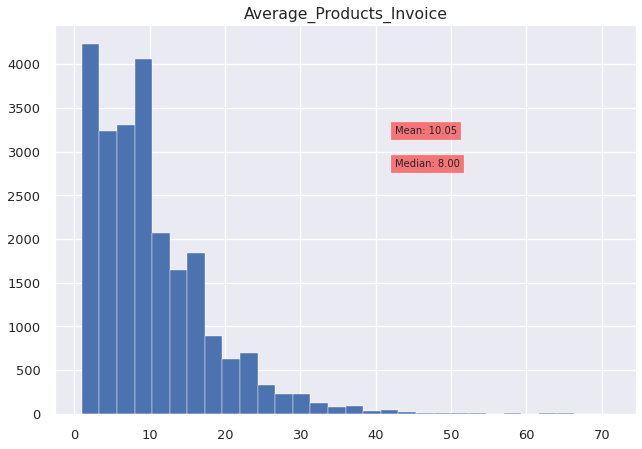

Cluster 1


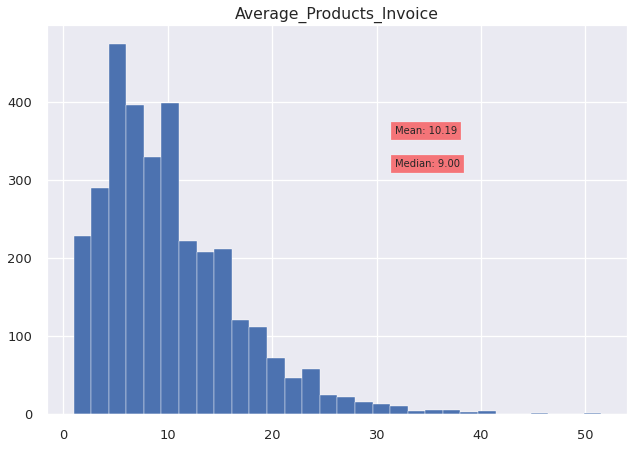

Cluster 2


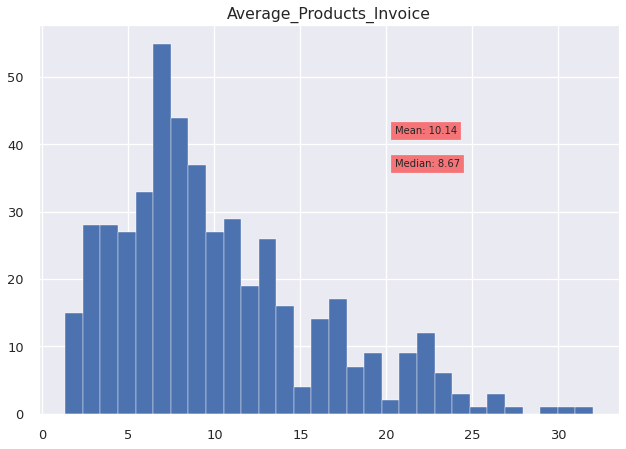

Cluster 3


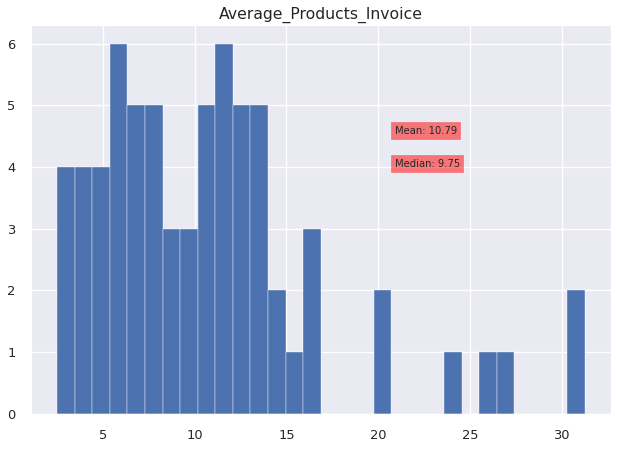

Cluster 4


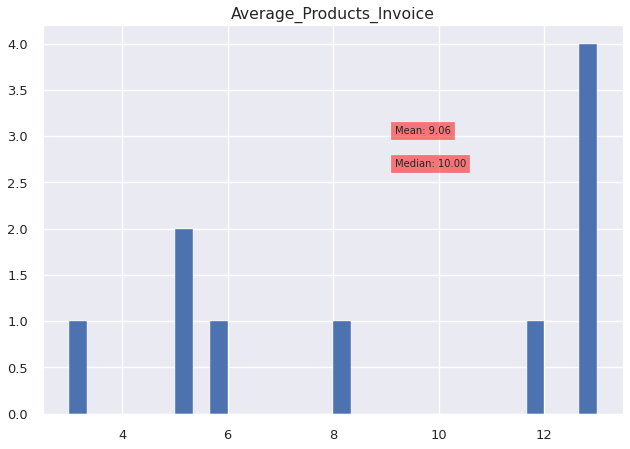

---------------------------------------------------------
count    27663.000000
mean         0.309708
std          0.203726
min          0.000000
25%          0.181818
50%          0.300000
75%          0.416667
max          1.000000
Name: Vegs & Fruits, dtype: float64
Cluster -1


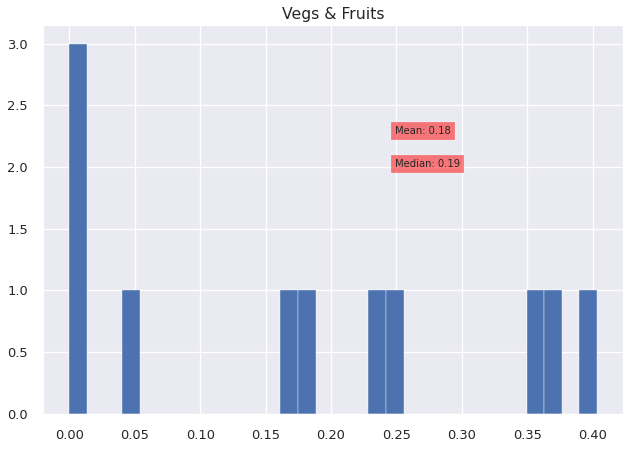

Cluster 0


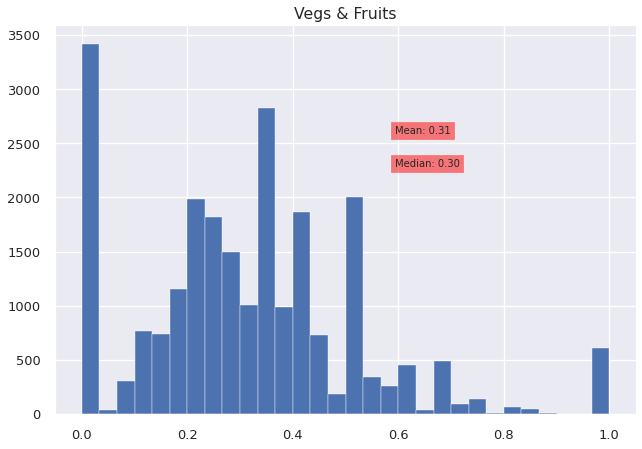

Cluster 1


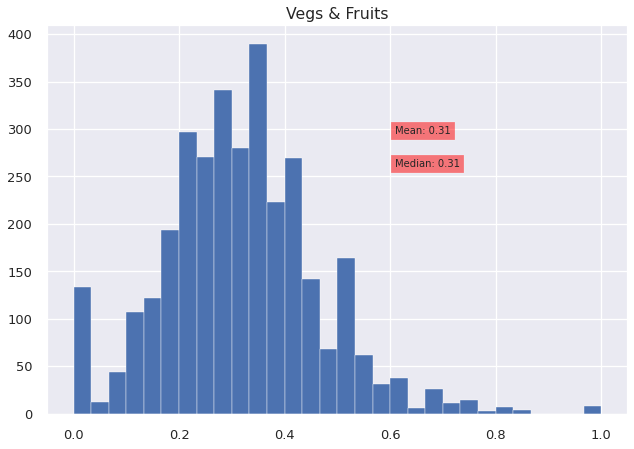

Cluster 2


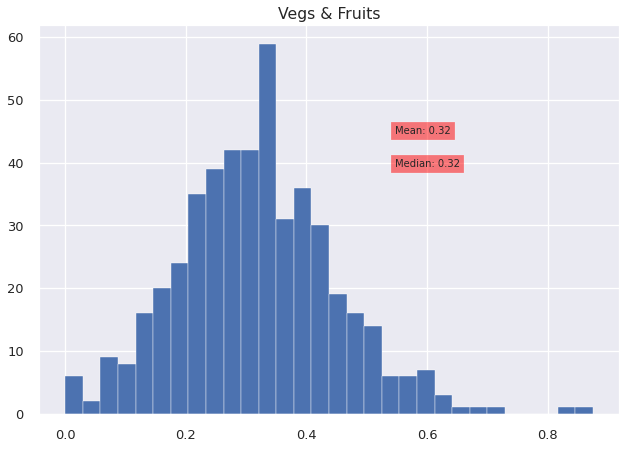

Cluster 3


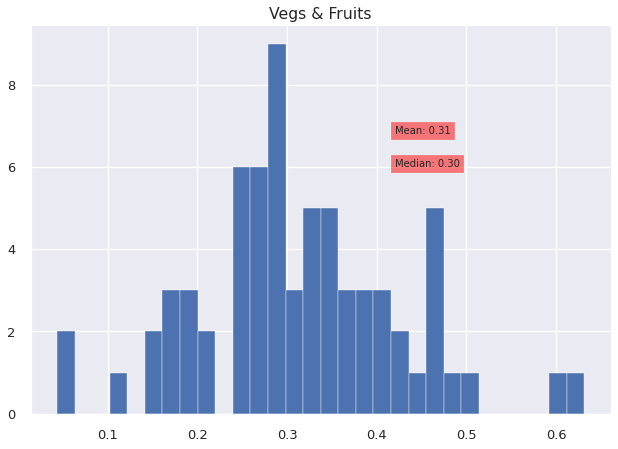

Cluster 4


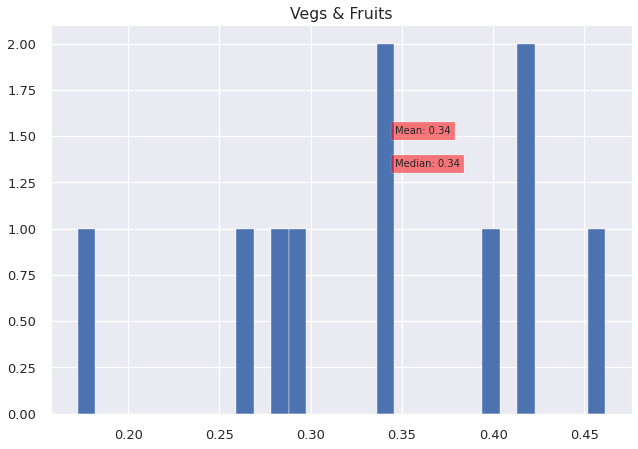

---------------------------------------------------------
count    27663.000000
mean         0.159360
std          0.168831
min          0.000000
25%          0.000000
50%          0.130435
75%          0.234314
max          1.000000
Name: Eggs & Fake Milk, dtype: float64
Cluster -1


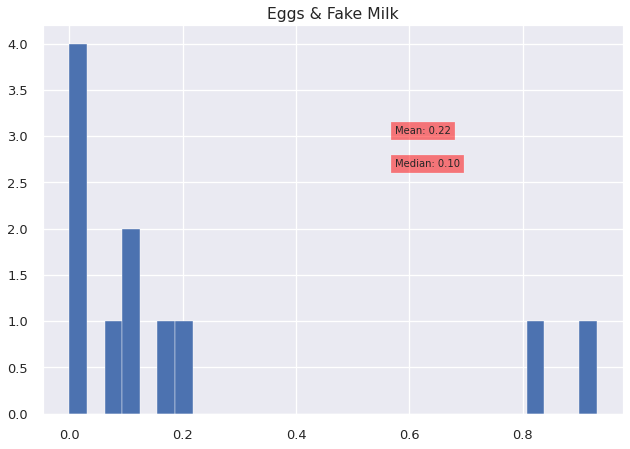

Cluster 0


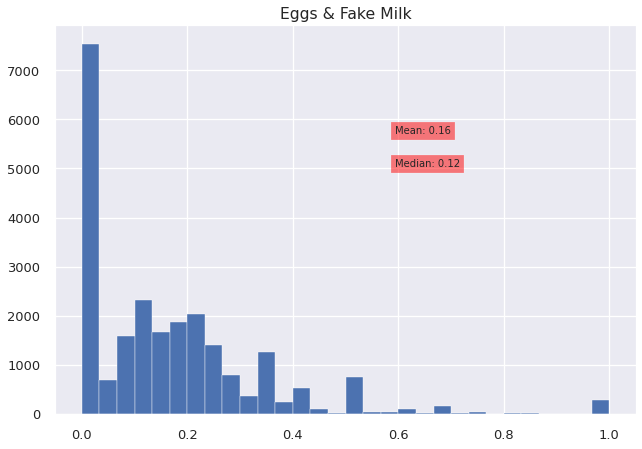

Cluster 1


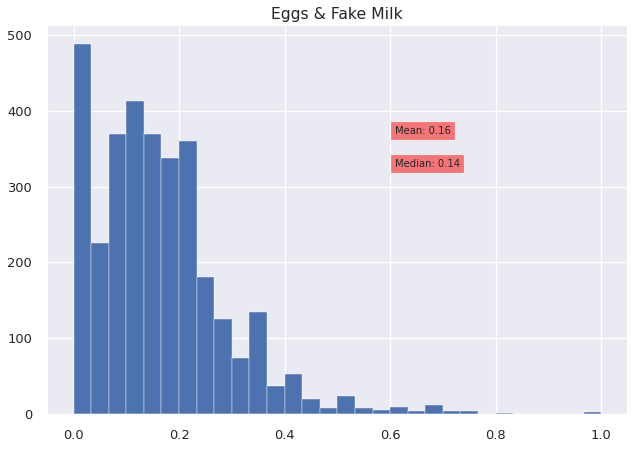

Cluster 2


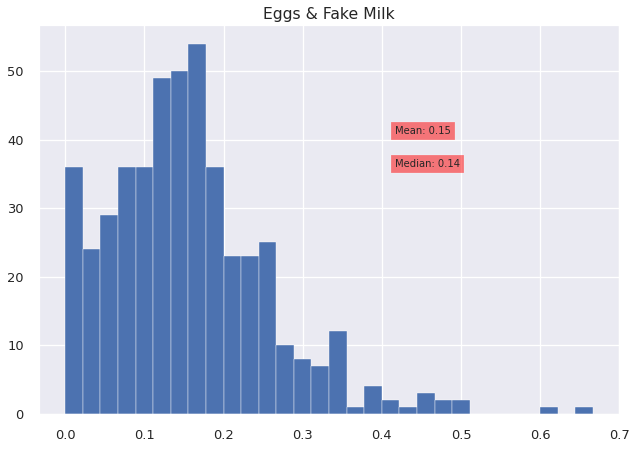

Cluster 3


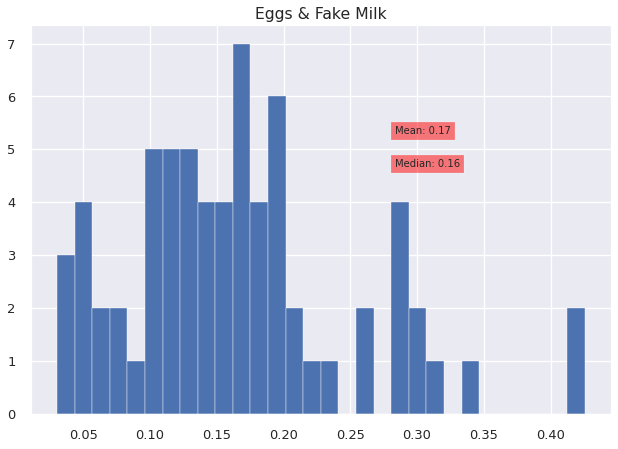

Cluster 4


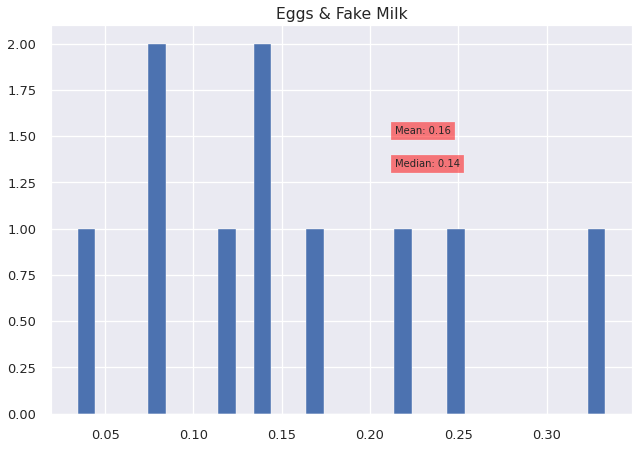

---------------------------------------------------------
count    27663.000000
mean         0.170828
std          0.175178
min          0.000000
25%          0.000000
50%          0.142857
75%          0.250000
max          1.000000
Name: Lots of Fruits, dtype: float64
Cluster -1


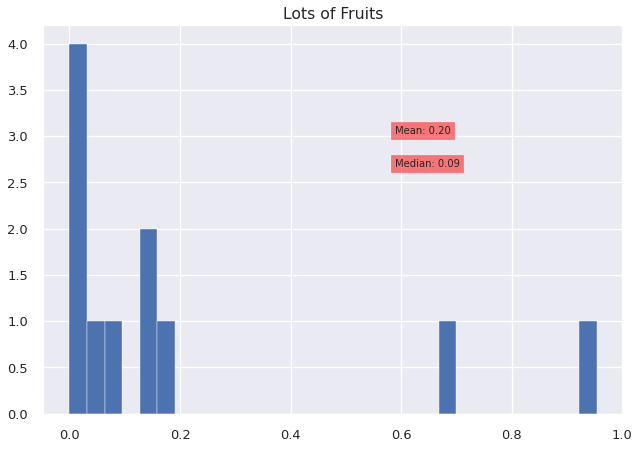

Cluster 0


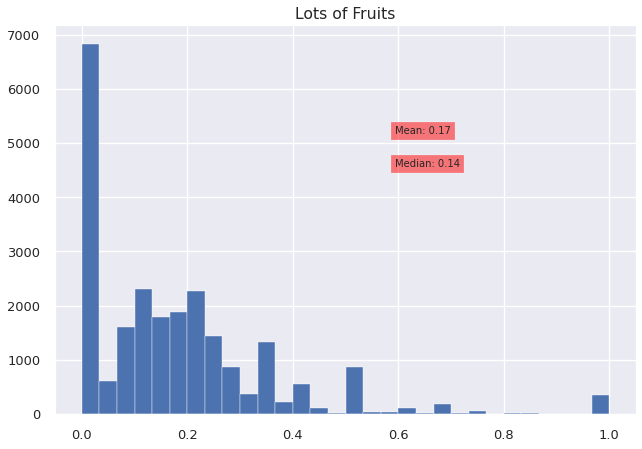

Cluster 1


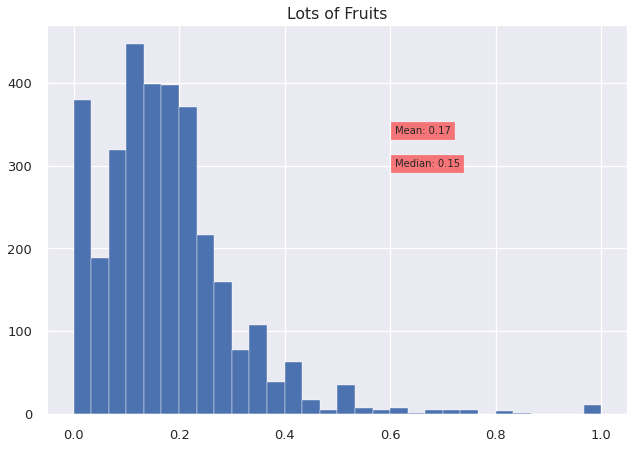

Cluster 2


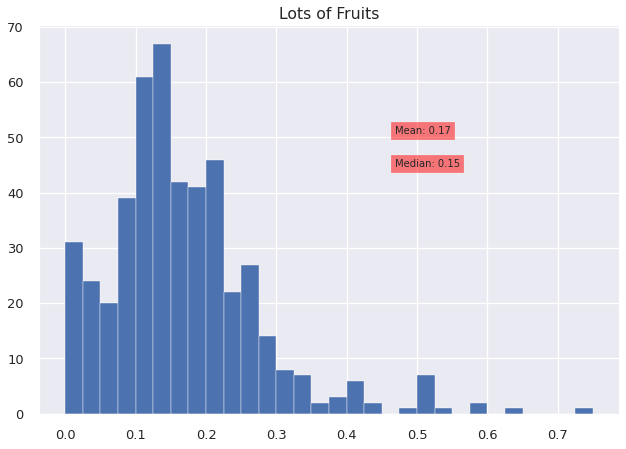

Cluster 3


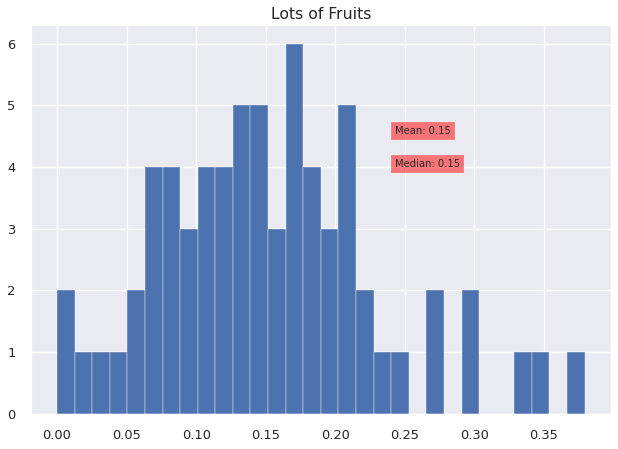

Cluster 4


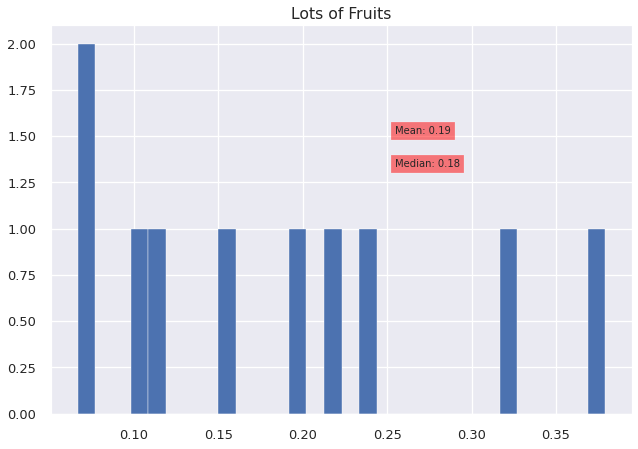

---------------------------------------------------------
count    27663.000000
mean         0.187212
std          0.169397
min          0.000000
25%          0.000000
50%          0.166667
75%          0.272727
max          1.000000
Name: Cheese Lover, dtype: float64
Cluster -1


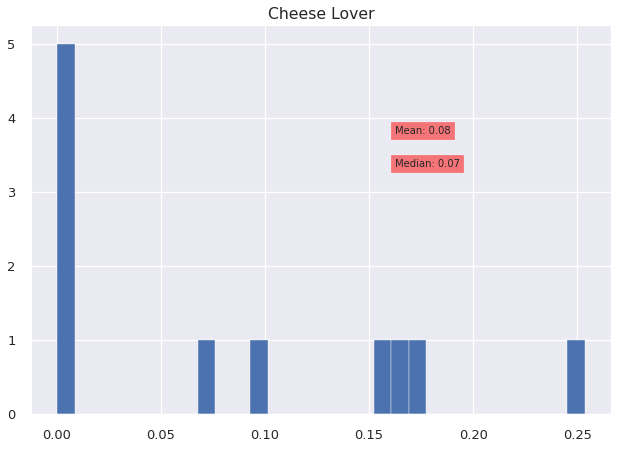

Cluster 0


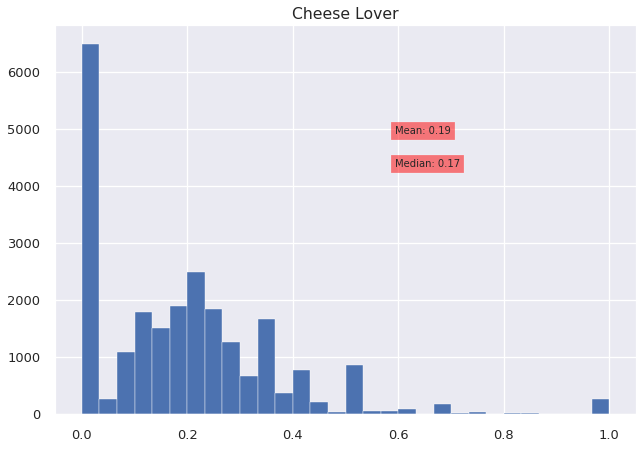

Cluster 1


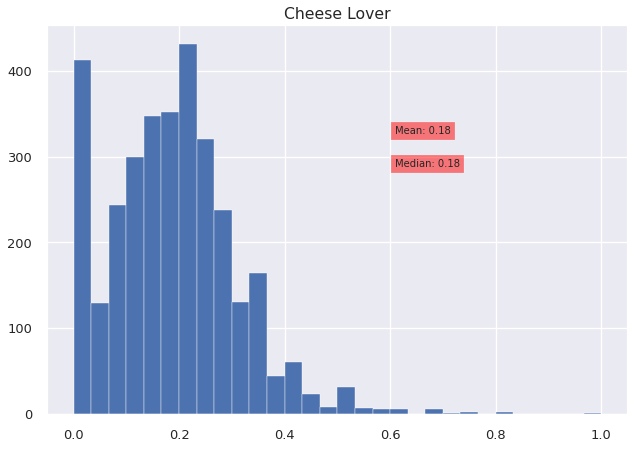

Cluster 2


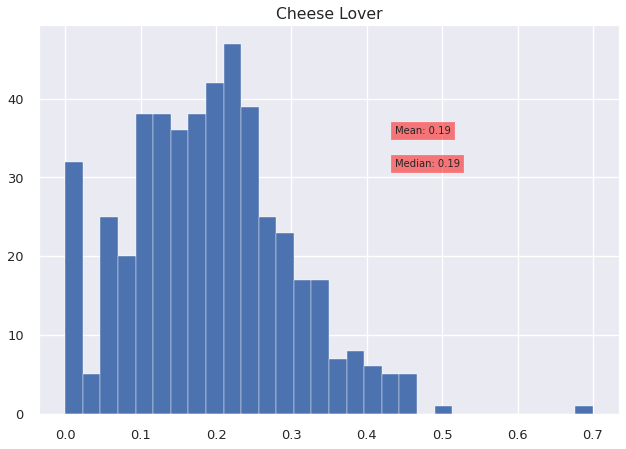

Cluster 3


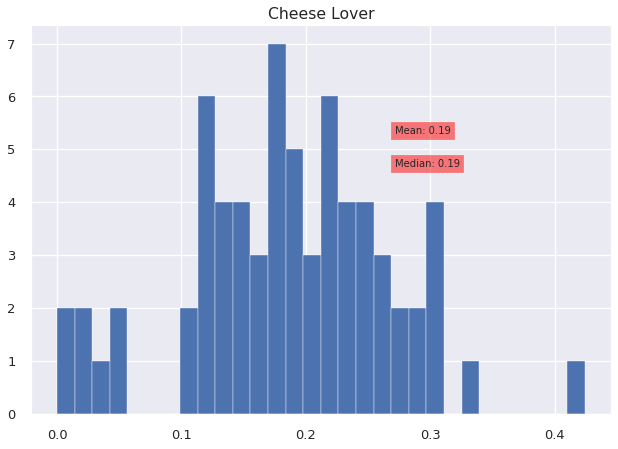

Cluster 4


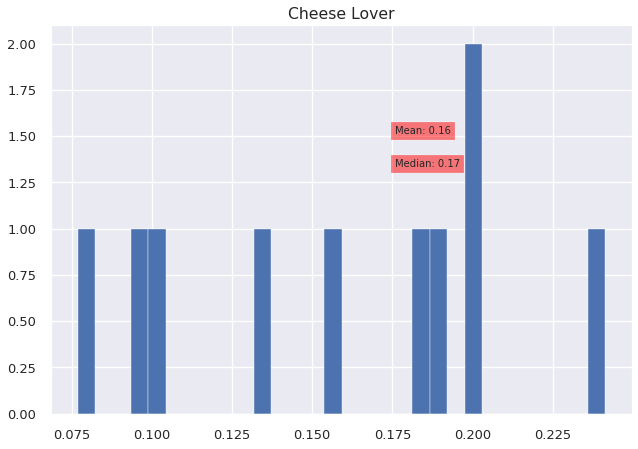

---------------------------------------------------------
count    27663.000000
mean         0.172893
std          0.168889
min          0.000000
25%          0.000000
50%          0.153846
75%          0.250000
max          1.000000
Name: Yogurt Lovers, dtype: float64
Cluster -1


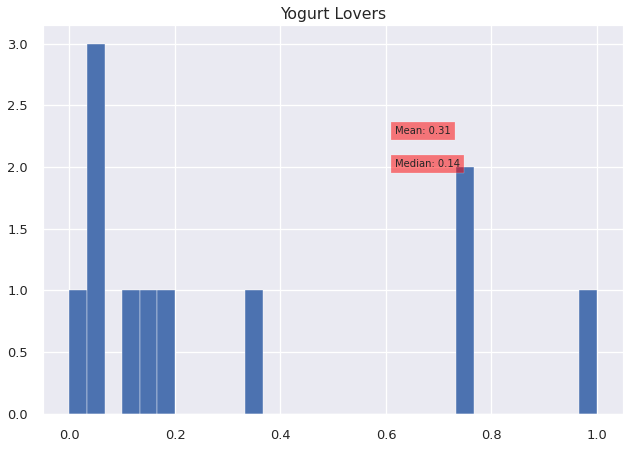

Cluster 0


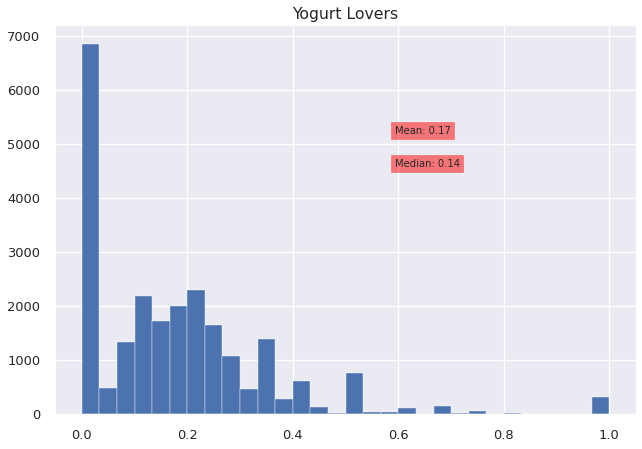

Cluster 1


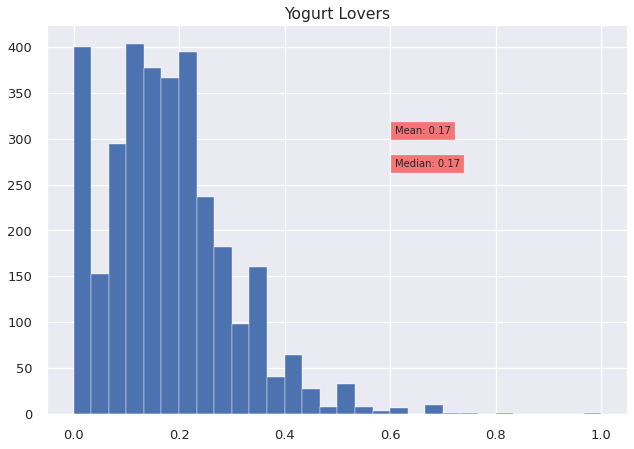

Cluster 2


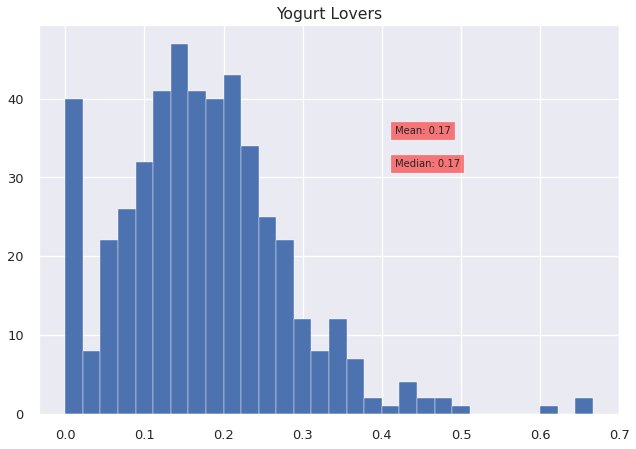

Cluster 3


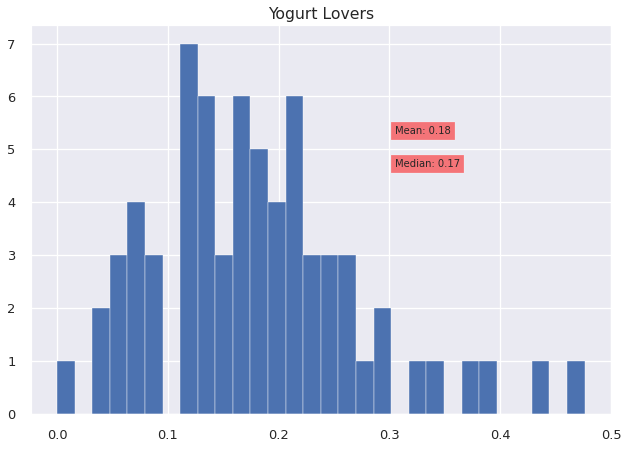

Cluster 4


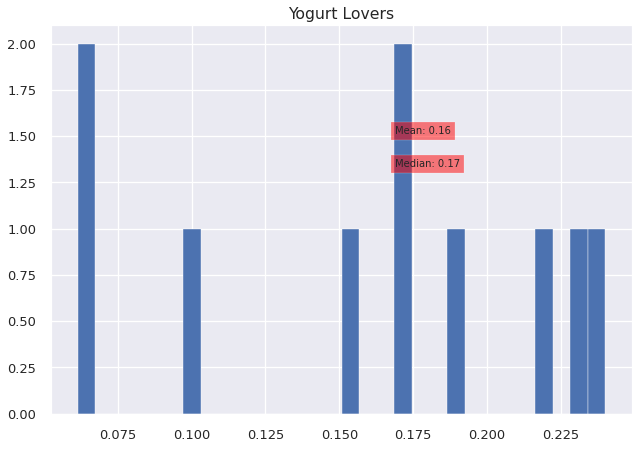

---------------------------------------------------------


In [ ]:
hist_dbscan_clusters(1.8, 5)

In [ ]:
df_dbscan_clusters(1.8, 5)

,A/Number_Of_Customers,B/Count_Orders,C/Average_Products_Invoice,D/Vegs & Fruits,E/Eggs & Fake Milk,F/Lots of Fruits,G/Cheese Lover,H/Yogurt Lovers
-1,11,220.68 %,52.04 %,-40.94 %,37.71 %,19.71 %,-55.14 %,78.81 %
0,23833,-13.96 %,-0.22 %,-0.22 %,0.11 %,0.16 %,0.27 %,-0.15 %
1,3266,72.07 %,1.19 %,1.35 %,-0.55 %,-0.62 %,-1.96 %,0.83 %
2,475,158.11 %,0.68 %,2.47 %,-3.40 %,-3.00 %,1.88 %,-0.36 %
3,68,244.14 %,7.15 %,1.40 %,4.75 %,-10.27 %,-0.92 %,4.26 %
4,10,330.18 %,-10.01 %,9.54 %,-2.11 %,9.21 %,-15.64 %,-7.31 %


count    27663.000000
mean         1.162311
std          0.438266
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: Count_Orders, dtype: float64
Cluster -1


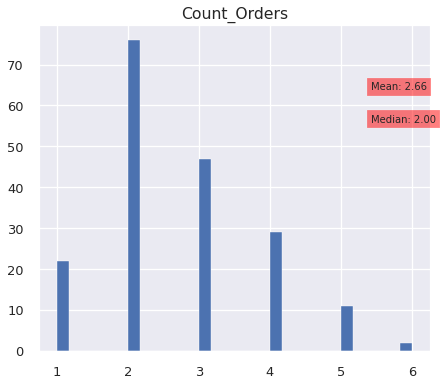

Cluster 0


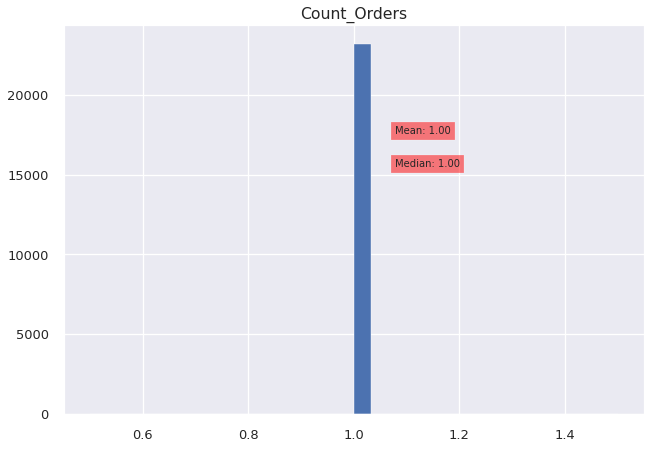

Cluster 1


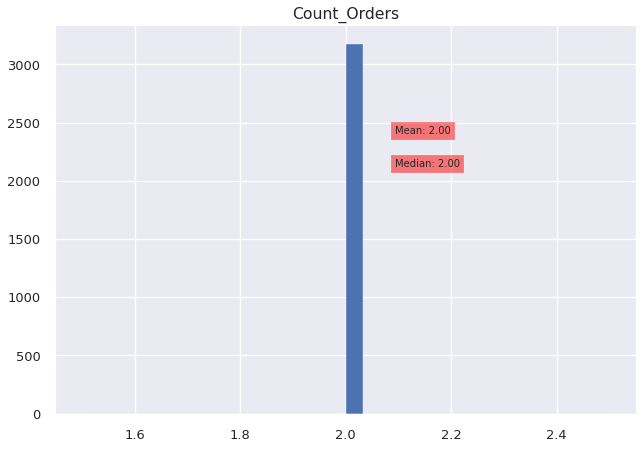

Cluster 2


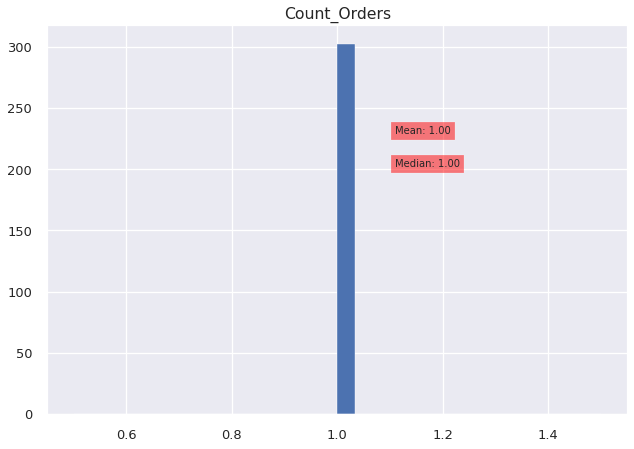

Cluster 3


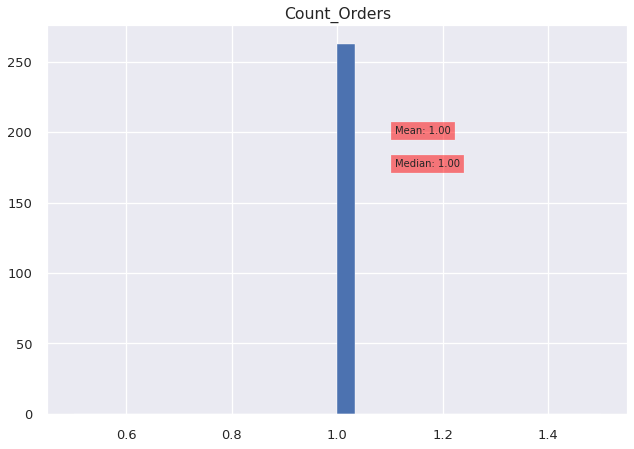

Cluster 4


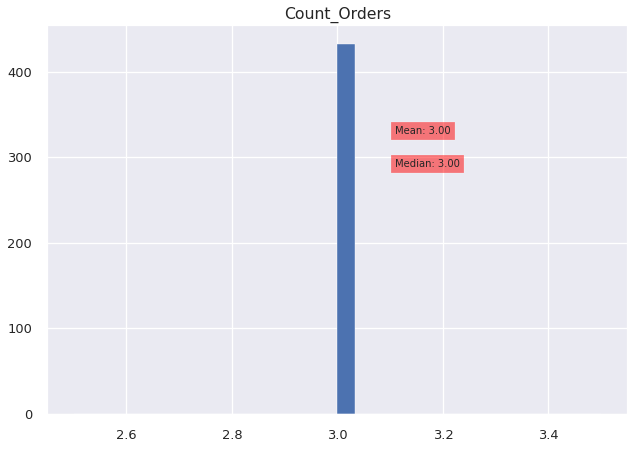

Cluster 5


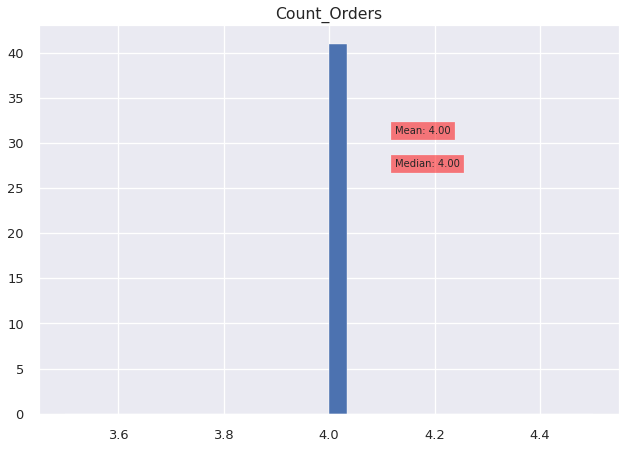

Cluster 6


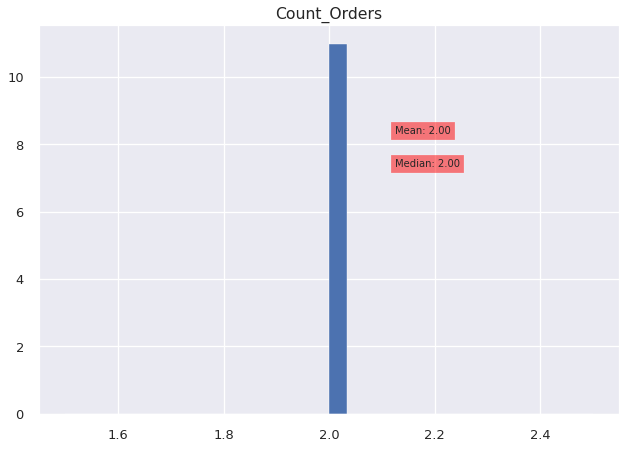

Cluster 7


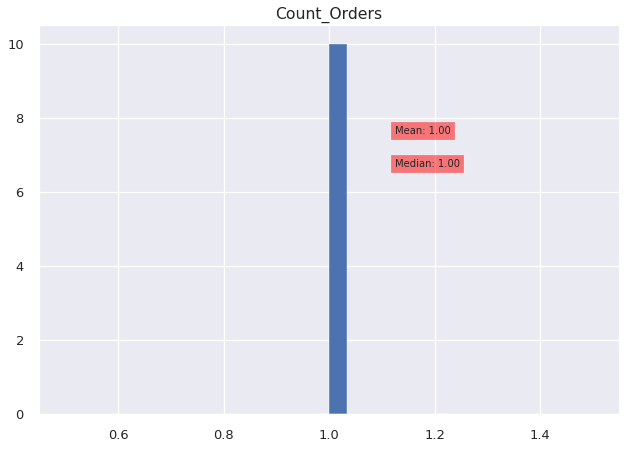

---------------------------------------------------------
count    27663.000000
mean        10.067387
std          7.391124
min          1.000000
25%          5.000000
50%          8.000000
75%         14.000000
max         71.000000
Name: Average_Products_Invoice, dtype: float64
Cluster -1


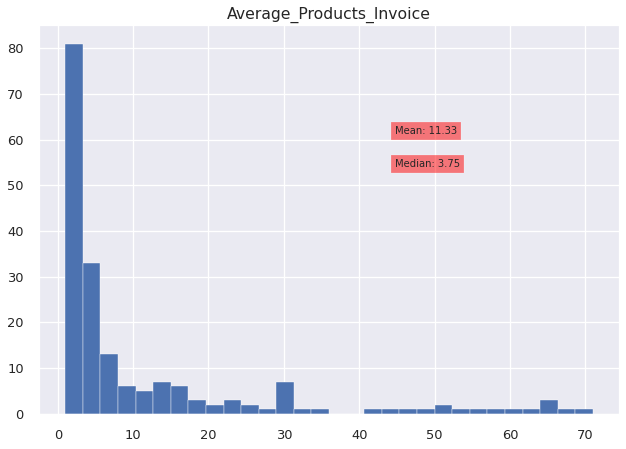

Cluster 0


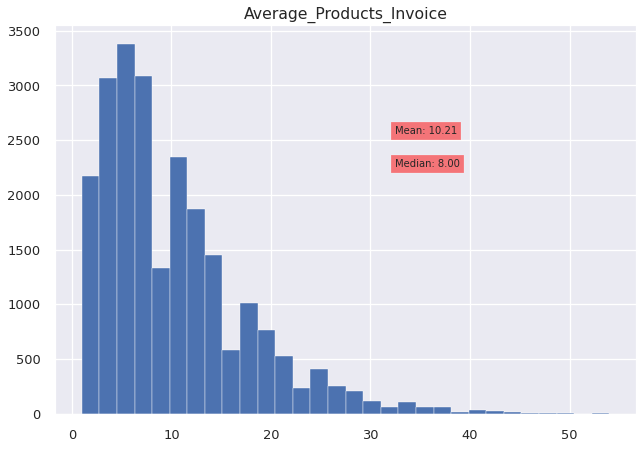

Cluster 1


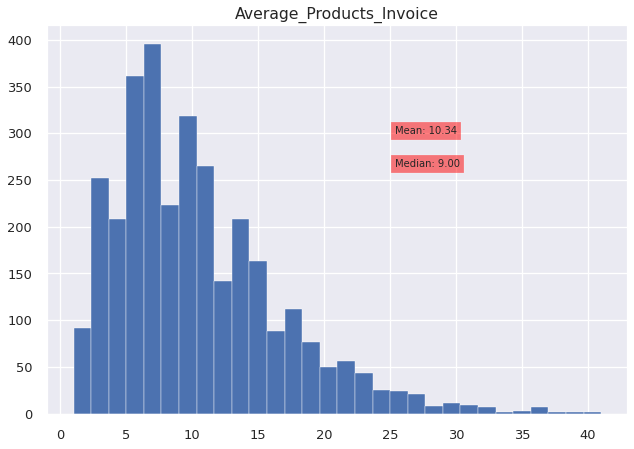

Cluster 2


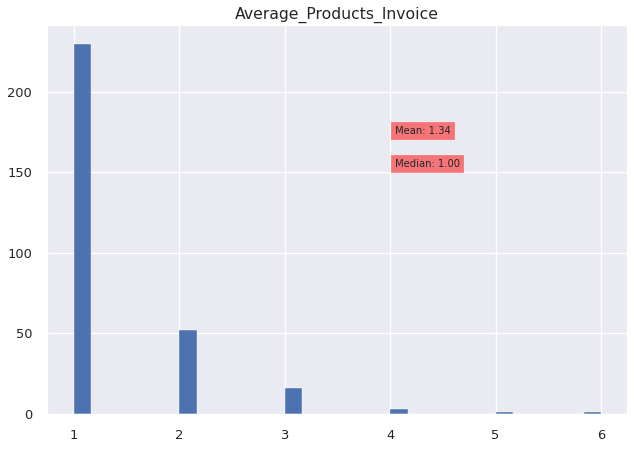

Cluster 3


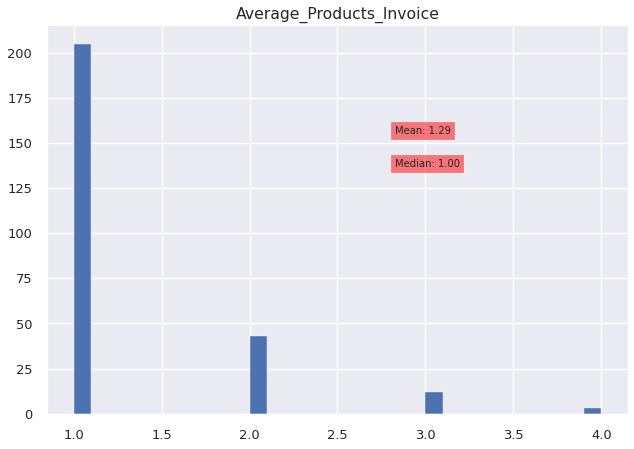

Cluster 4


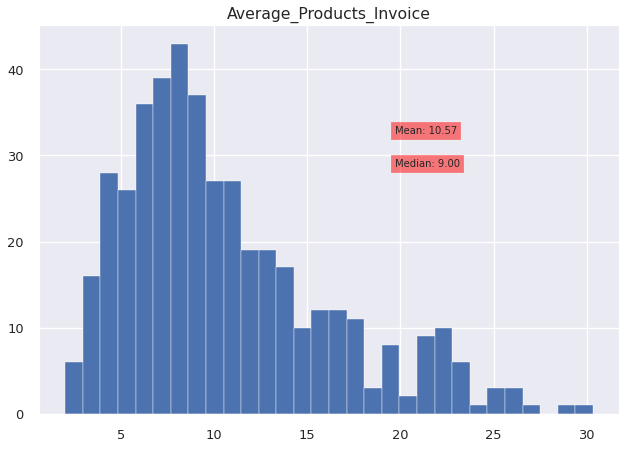

Cluster 5


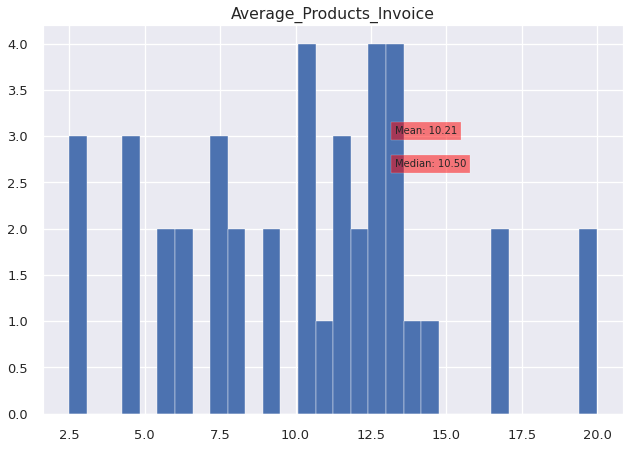

Cluster 6


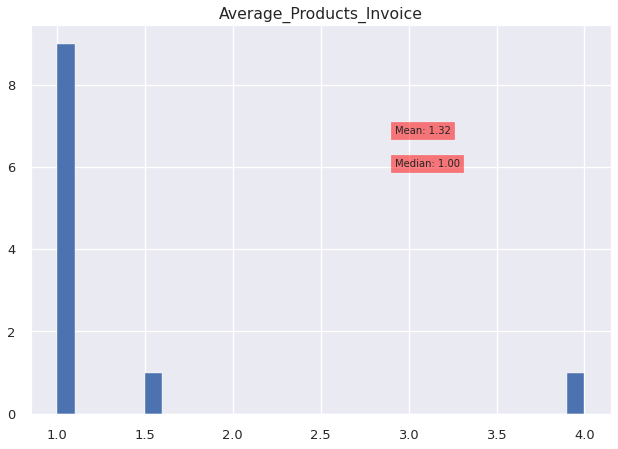

Cluster 7


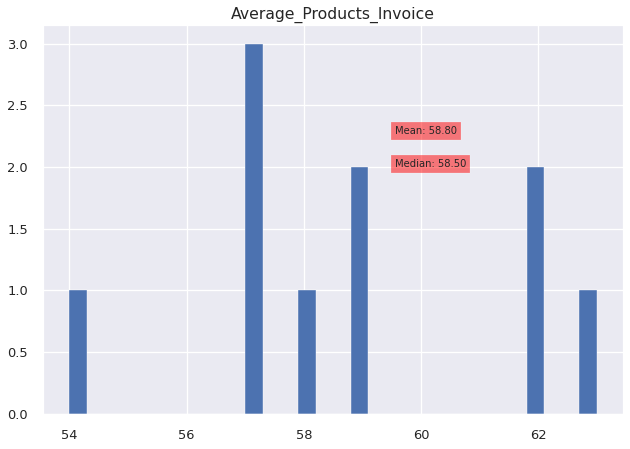

---------------------------------------------------------
count    27663.000000
mean         0.309708
std          0.203726
min          0.000000
25%          0.181818
50%          0.300000
75%          0.416667
max          1.000000
Name: Vegs & Fruits, dtype: float64
Cluster -1


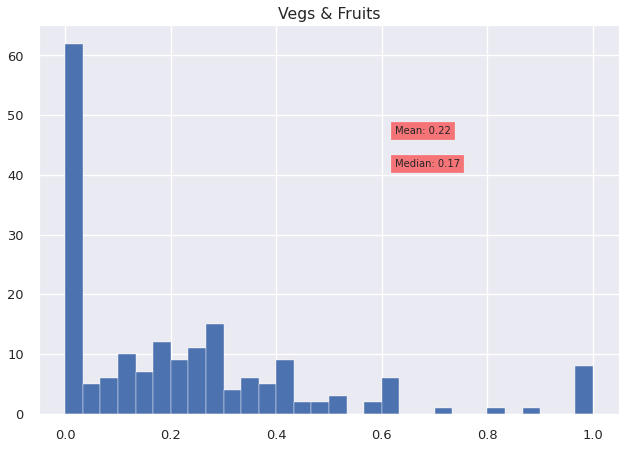

Cluster 0


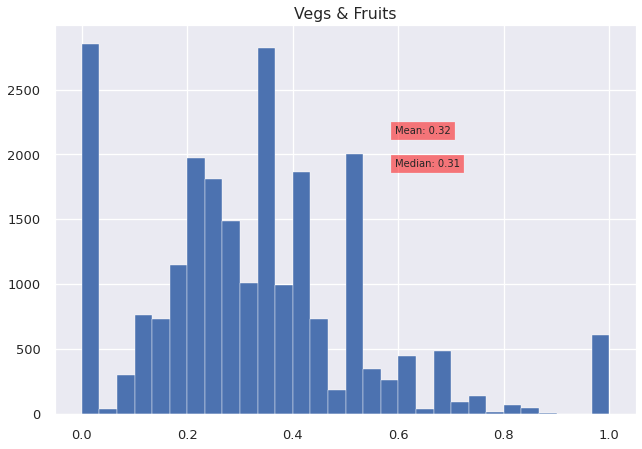

Cluster 1


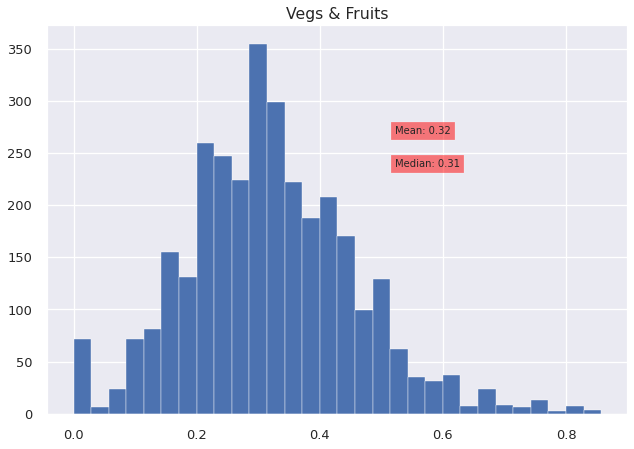

Cluster 2


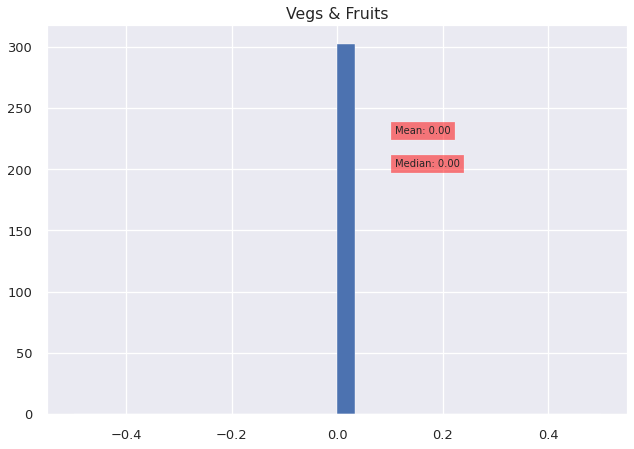

Cluster 3


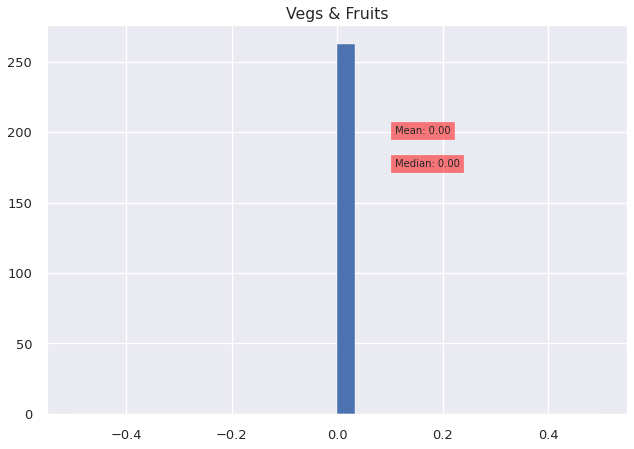

Cluster 4


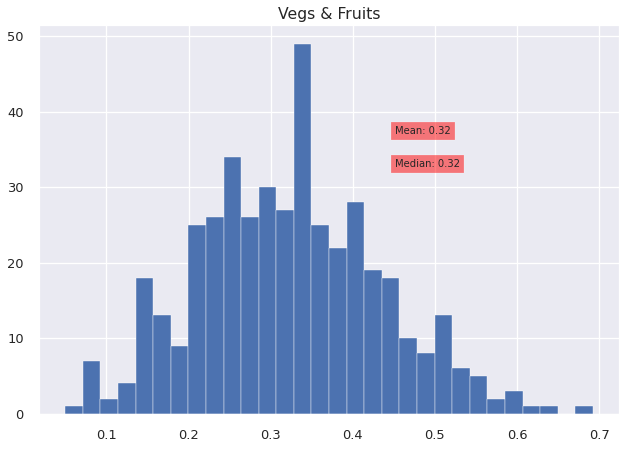

Cluster 5


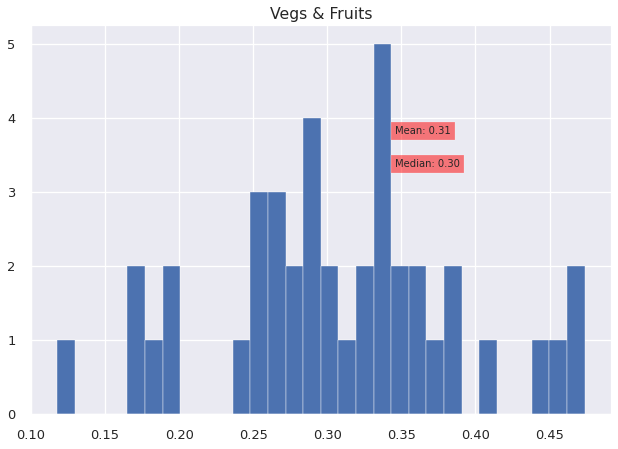

Cluster 6


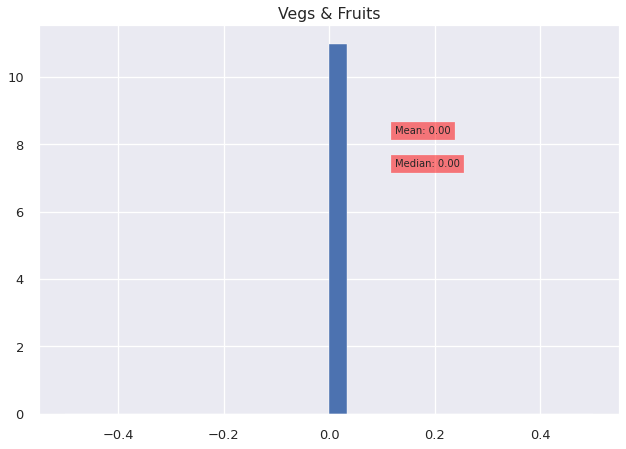

Cluster 7


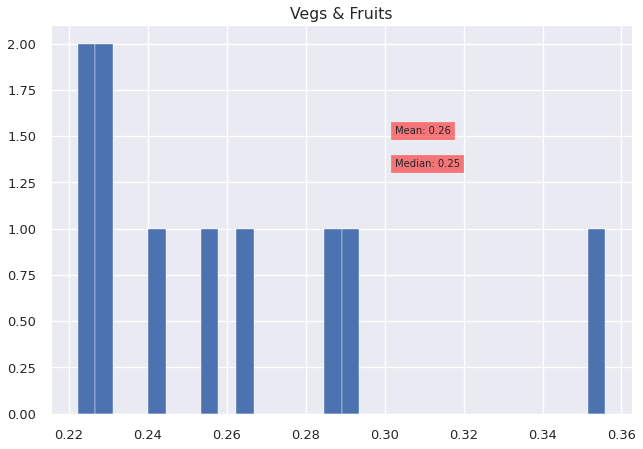

---------------------------------------------------------
count    27663.000000
mean         0.159360
std          0.168831
min          0.000000
25%          0.000000
50%          0.130435
75%          0.234314
max          1.000000
Name: Eggs & Fake Milk, dtype: float64
Cluster -1


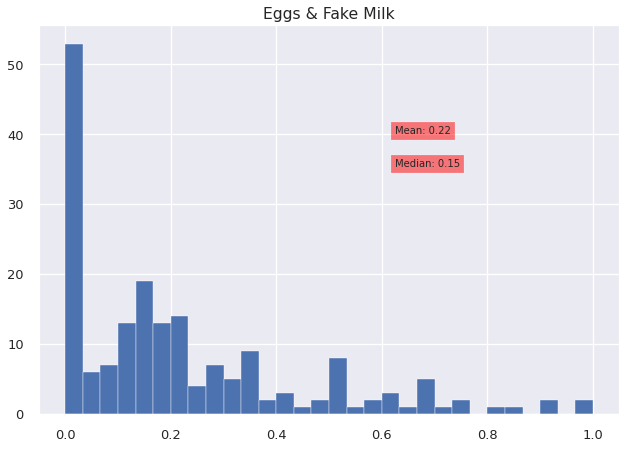

Cluster 0


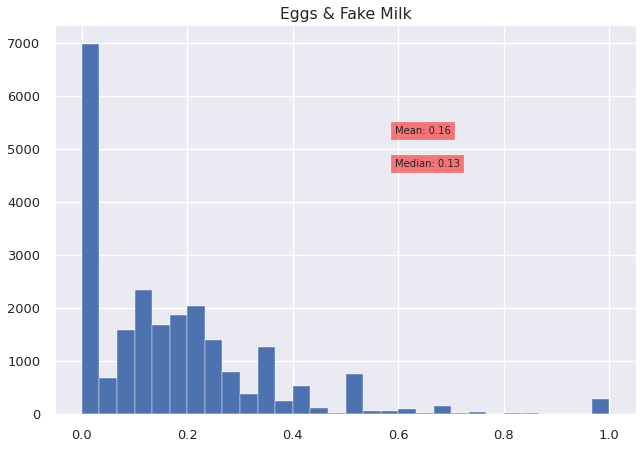

Cluster 1


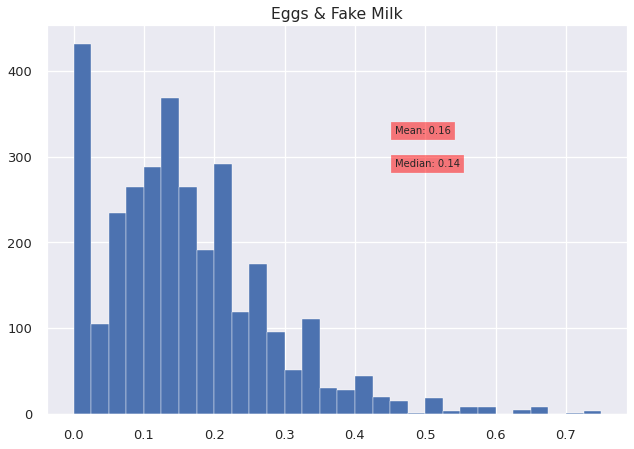

Cluster 2


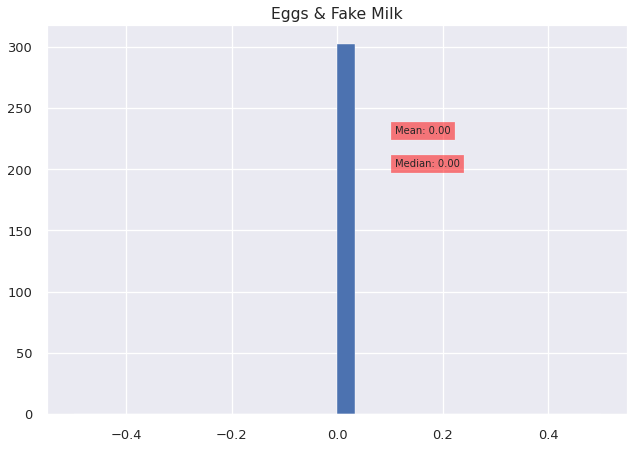

Cluster 3


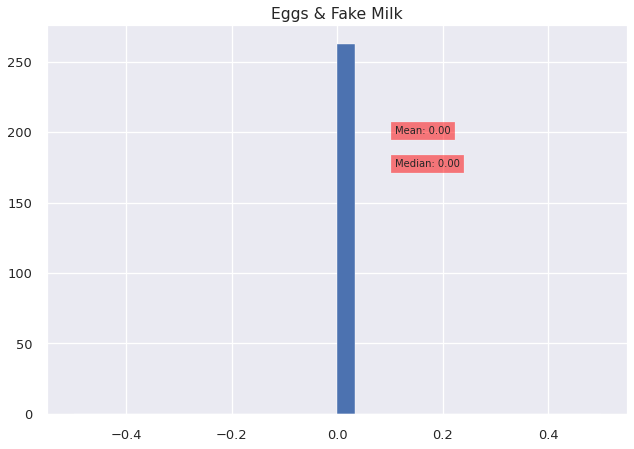

Cluster 4


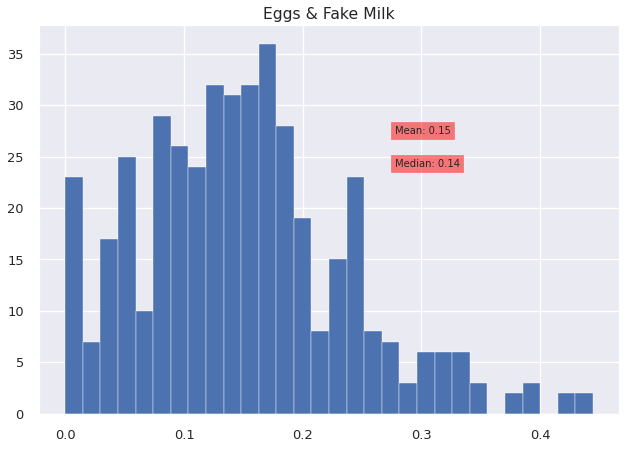

Cluster 5


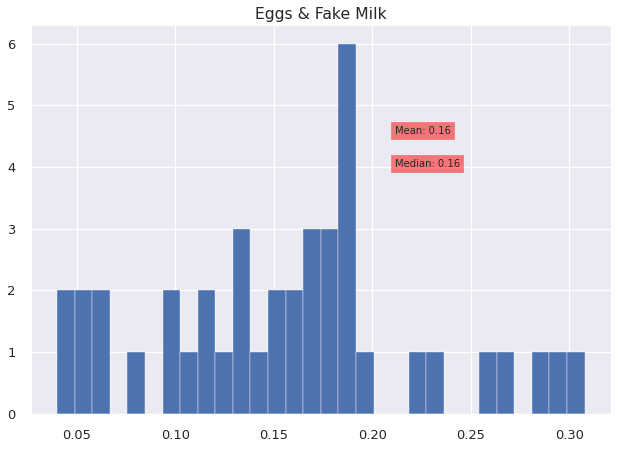

Cluster 6


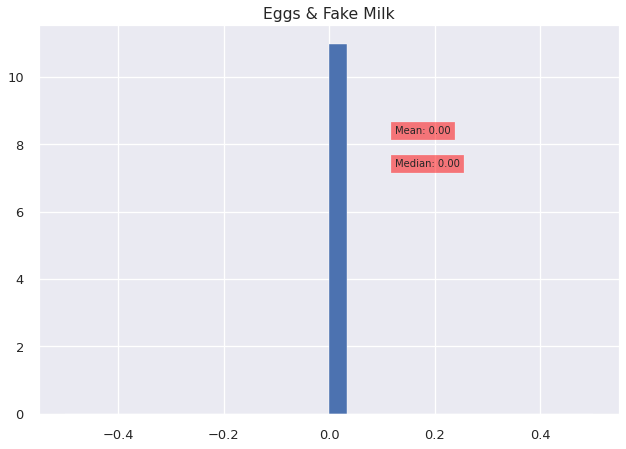

Cluster 7


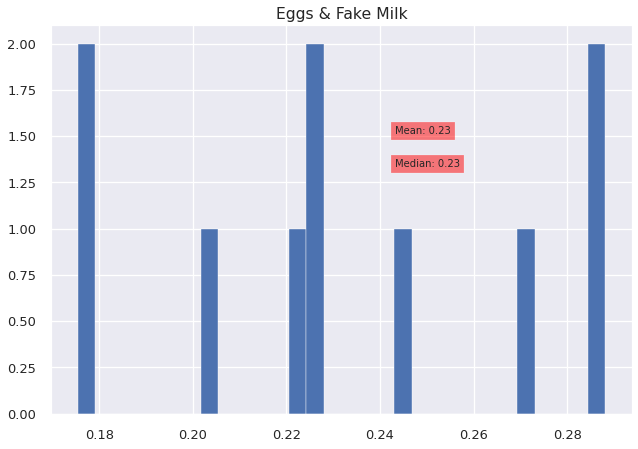

---------------------------------------------------------
count    27663.000000
mean         0.170828
std          0.175178
min          0.000000
25%          0.000000
50%          0.142857
75%          0.250000
max          1.000000
Name: Lots of Fruits, dtype: float64
Cluster -1


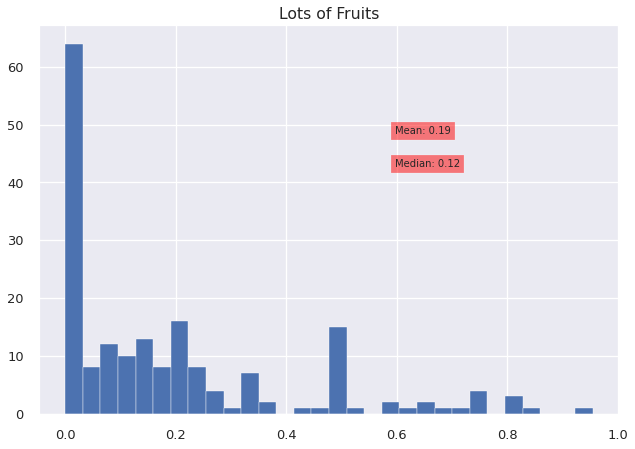

Cluster 0


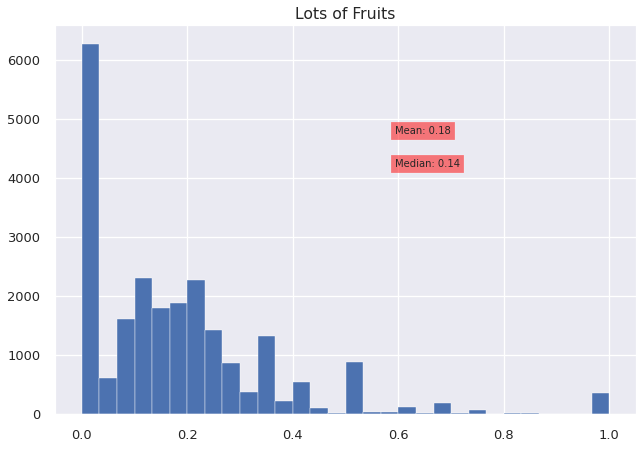

Cluster 1


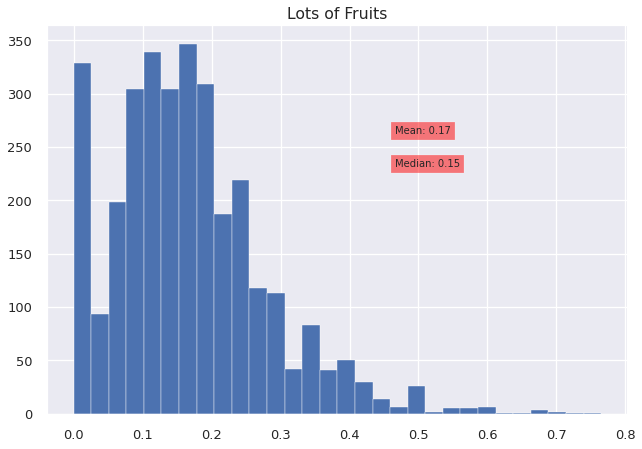

Cluster 2


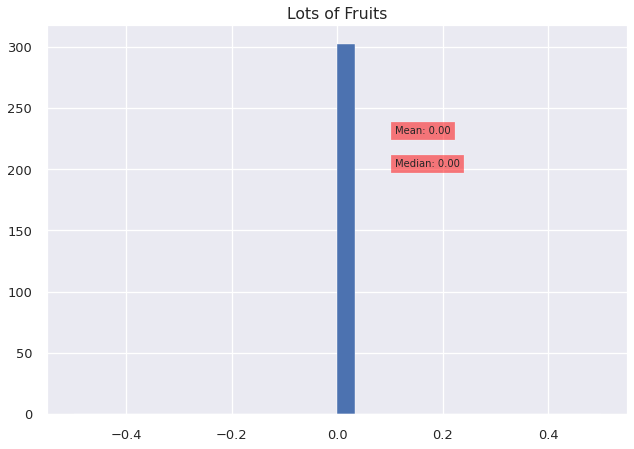

Cluster 3


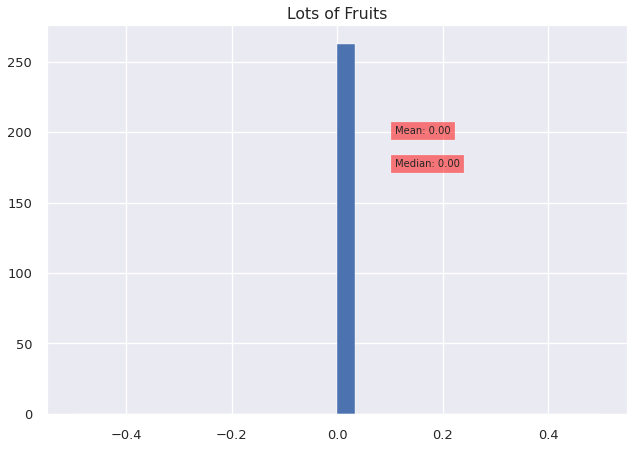

Cluster 4


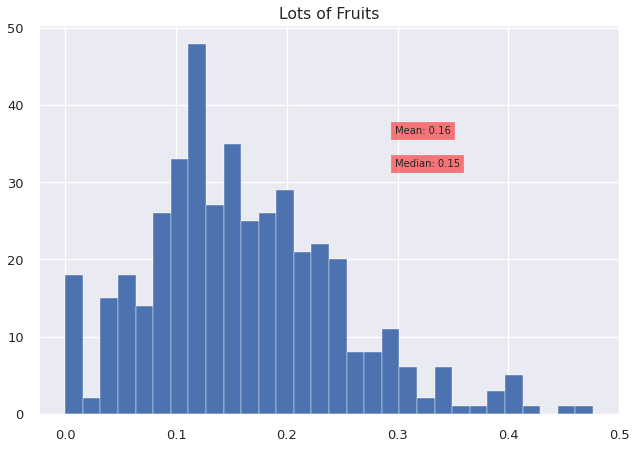

Cluster 5


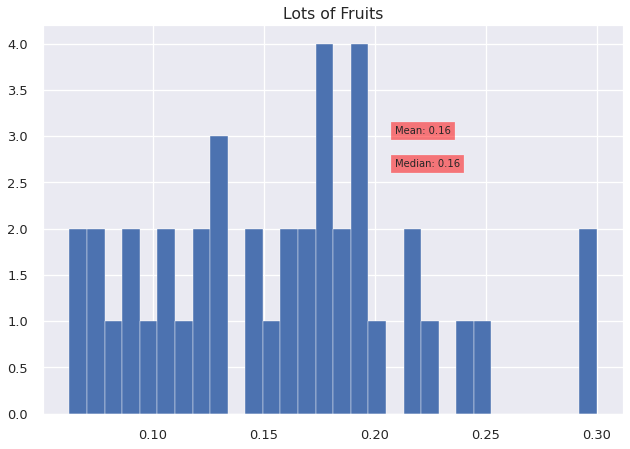

Cluster 6


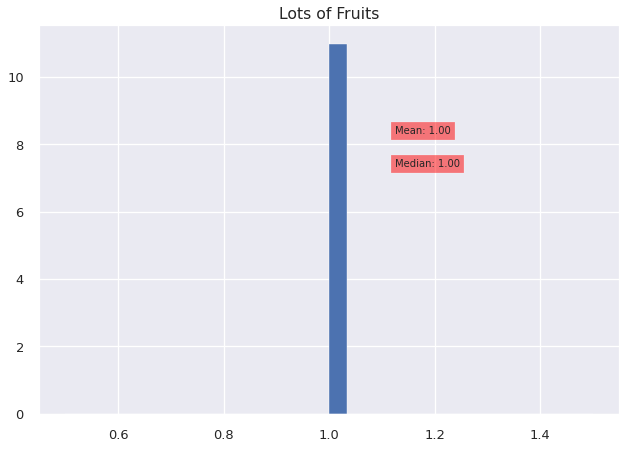

Cluster 7


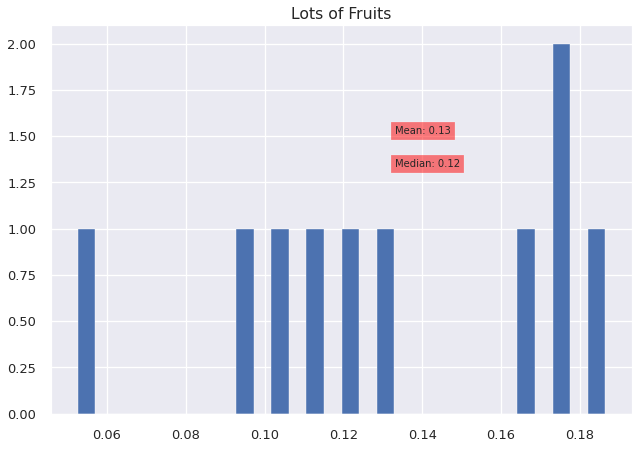

---------------------------------------------------------
count    27663.000000
mean         0.187212
std          0.169397
min          0.000000
25%          0.000000
50%          0.166667
75%          0.272727
max          1.000000
Name: Cheese Lover, dtype: float64
Cluster -1


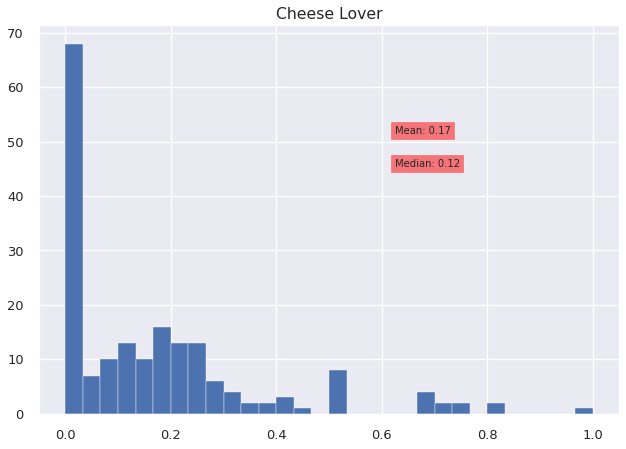

Cluster 0


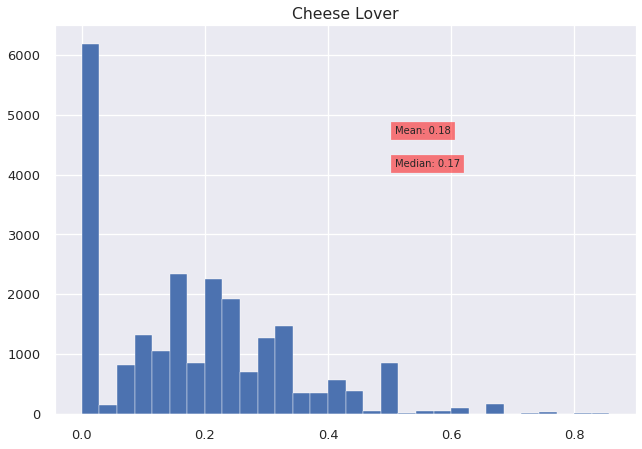

Cluster 1


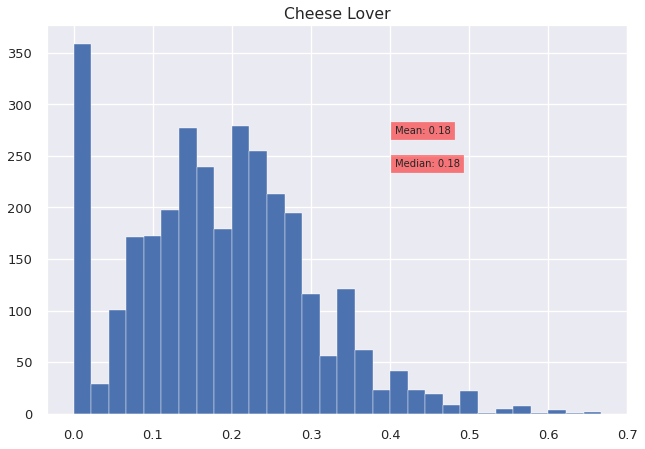

Cluster 2


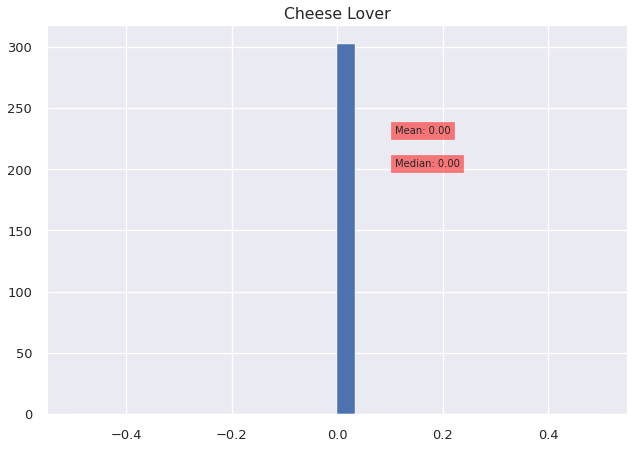

Cluster 3


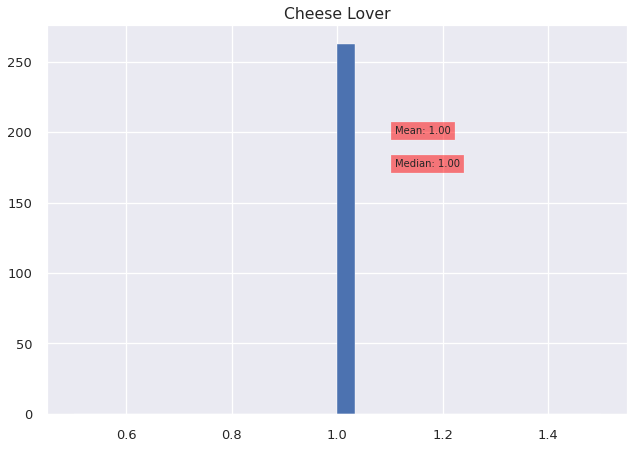

Cluster 4


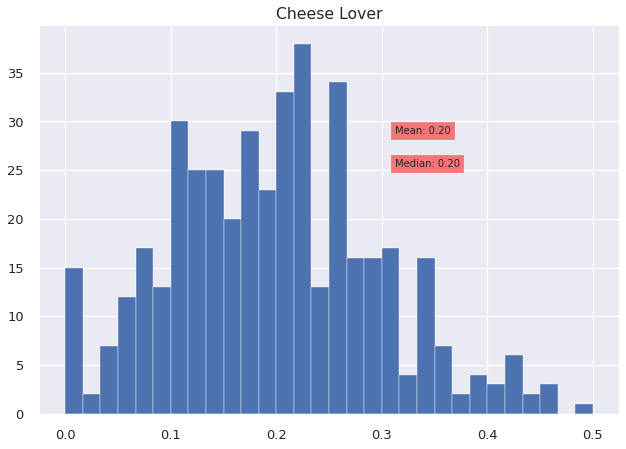

Cluster 5


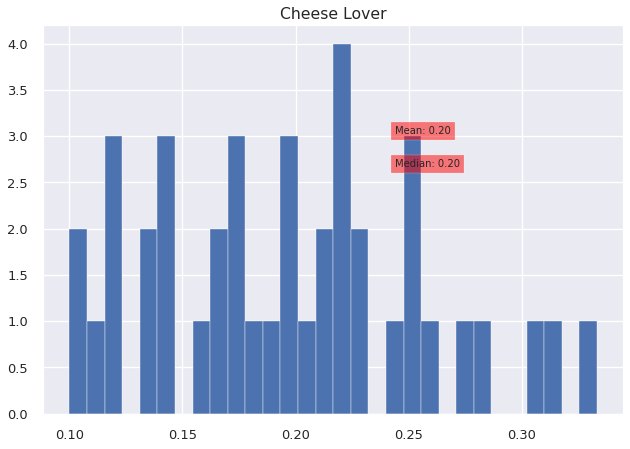

Cluster 6


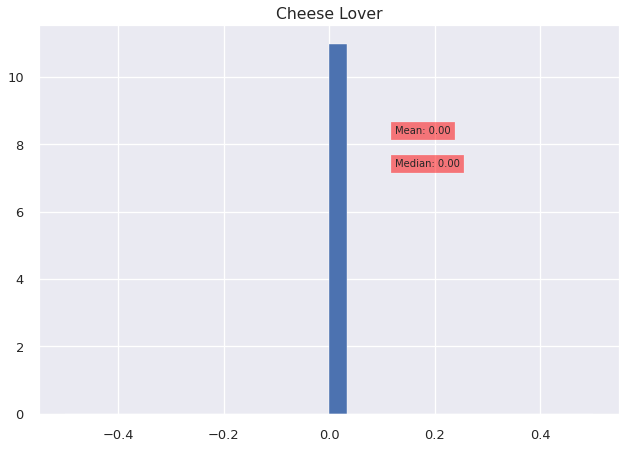

Cluster 7


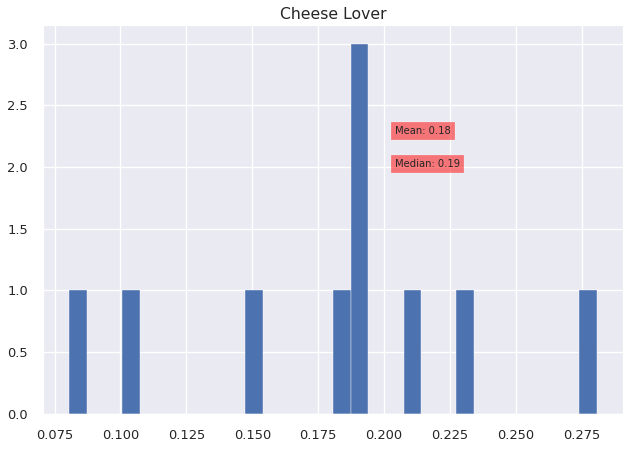

---------------------------------------------------------
count    27663.000000
mean         0.172893
std          0.168889
min          0.000000
25%          0.000000
50%          0.153846
75%          0.250000
max          1.000000
Name: Yogurt Lovers, dtype: float64
Cluster -1


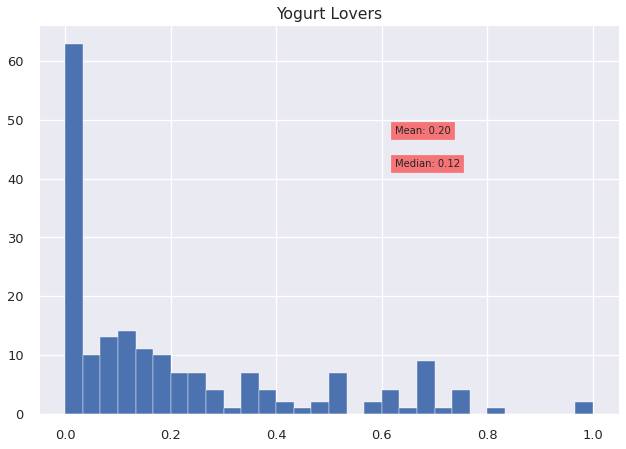

Cluster 0


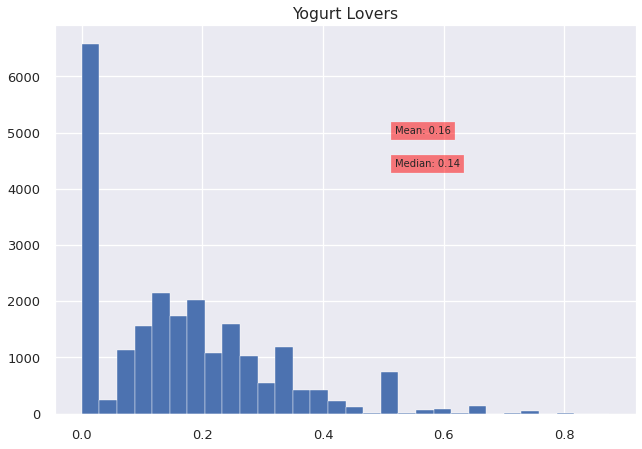

Cluster 1


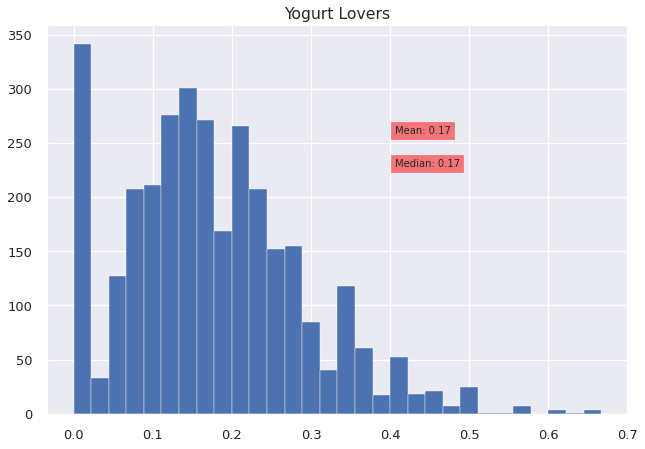

Cluster 2


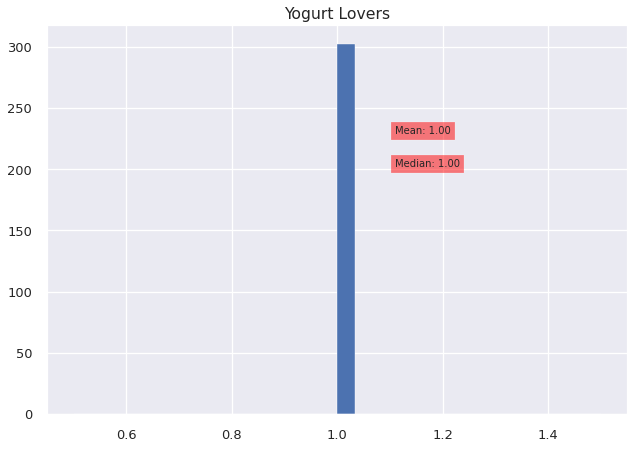

Cluster 3


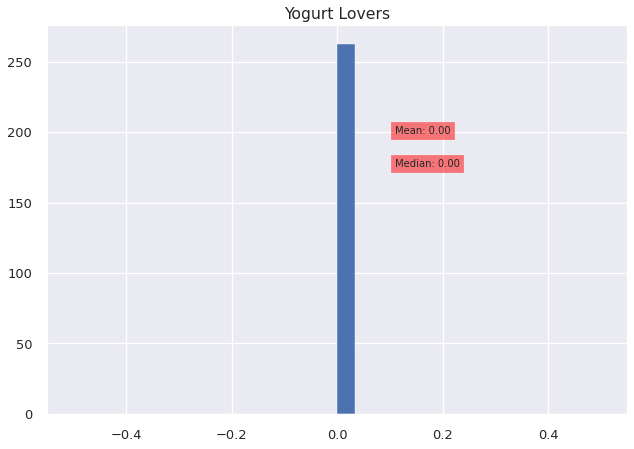

Cluster 4


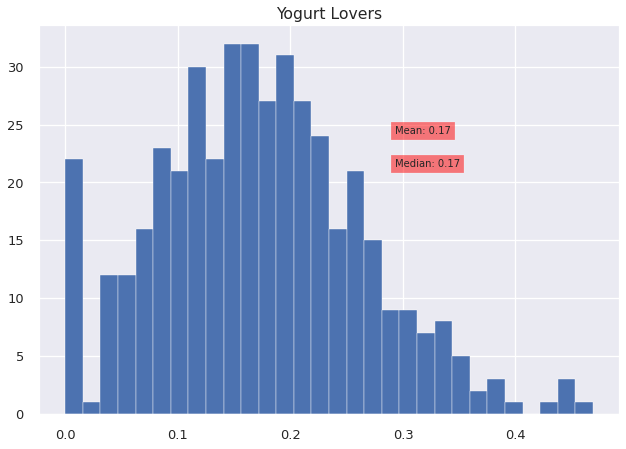

Cluster 5


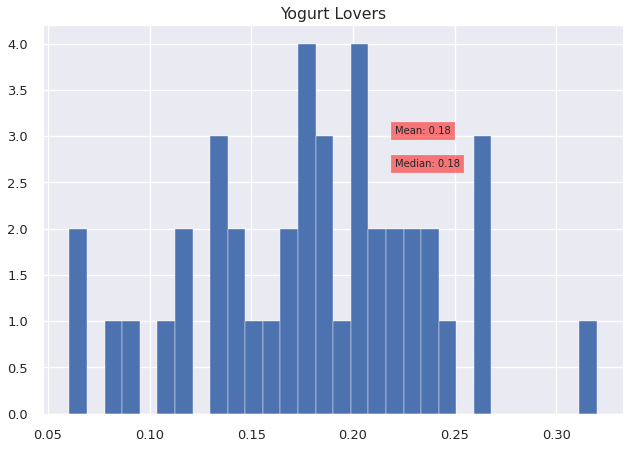

Cluster 6


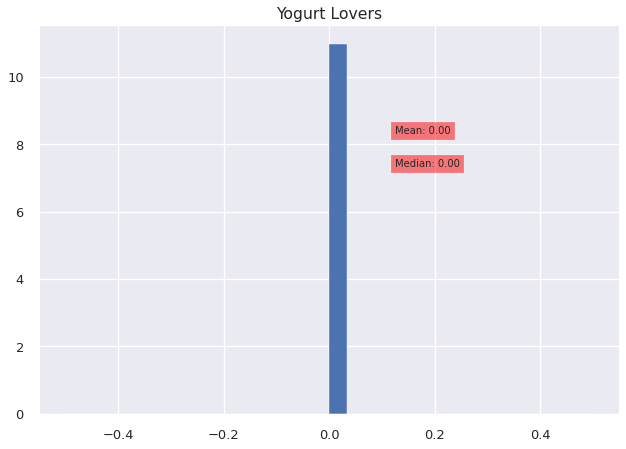

Cluster 7


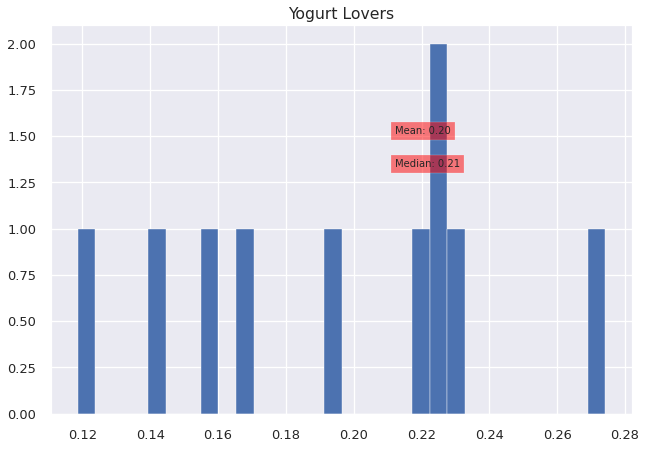

---------------------------------------------------------


In [ ]:
hist_dbscan_clusters(1.0, 10)

In [ ]:
df_dbscan_clusters(1.0, 10)

,A/Number_Of_Customers,B/Count_Orders,C/Average_Products_Invoice,D/Vegs & Fruits,E/Eggs & Fake Milk,F/Lots of Fruits,G/Cheese Lover,H/Yogurt Lovers
-1,187,129.12 %,12.56 %,-28.27 %,36.07 %,13.37 %,-11.08 %,16.18 %
0,23236,-13.96 %,1.38 %,2.25 %,2.43 %,2.64 %,-3.33 %,-5.27 %
1,3179,72.07 %,2.71 %,2.88 %,-1.05 %,-2.84 %,-1.79 %,0.55 %
2,303,-13.96 %,-86.72 %,-100.00 %,-100.00 %,-100.00 %,-100.00 %,478.39 %
3,263,-13.96 %,-87.20 %,-100.00 %,-100.00 %,-100.00 %,434.15 %,-100.00 %
4,433,158.11 %,5.00 %,4.08 %,-6.13 %,-6.77 %,5.17 %,-0.56 %
5,41,244.14 %,1.39 %,-0.83 %,-1.50 %,-7.44 %,5.34 %,4.43 %
6,11,72.07 %,-86.91 %,-100.00 %,-100.00 %,485.39 %,-100.00 %,-100.00 %
7,10,-13.96 %,484.06 %,-16.21 %,45.64 %,-22.95 %,-3.23 %,13.15 %


In [ ]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using KMeans(n_clusters=5) model 

model = KMeans(n_clusters=5, random_state=0).fit(df_standard)
idk = model.labels_

for id_cluster in range(model.n_clusters):
    df_customers.loc[np.where(idk == id_cluster)[0], 'Customer_Category_km5'] = id_cluster

In [ ]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using KMeans(n_clusters=8) model 

model = KMeans(n_clusters=8, random_state=0).fit(df_standard)
idk = model.labels_

for id_cluster in range(model.n_clusters):
    df_customers.loc[np.where(idk == id_cluster)[0], 'Customer_Category_km8'] = id_cluster

In [ ]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using DBSCAN(eps=2.3, min_samples=5) model 

dbsc = DBSCAN(eps=2.3, min_samples=5).fit(df_standard)
labels = dbsc.labels_
df_customers['Customer_Category_dbsc5'] = labels

In [ ]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using DBSCAN(eps=1.0, min_samples=10) model 

dbsc = DBSCAN(eps=1.0, min_samples=10).fit(df_standard)
labels = dbsc.labels_
df_customers['Customer_Category_dbsc10'] = labels

In [ ]:
df_customers.head(10)

,Count_Orders,Average_Products_Invoice,Vegs & Fruits,Eggs & Fake Milk,Lots of Fruits,Cheese Lover,Yogurt Lovers,Customer_Category_km5,Customer_Category_km8,Customer_Category_dbsc5,Customer_Category_dbsc10
0,1.0,11.0,0.090909,0.090909,0.090909,0.363636,0.363636,3.0,0.0,0,0
1,1.0,5.0,0.400000,0.200000,0.000000,0.400000,0.000000,0.0,6.0,0,0
2,1.0,9.0,0.333333,0.222222,0.111111,0.000000,0.333333,3.0,0.0,0,0
3,1.0,13.0,0.538462,0.153846,0.076923,0.000000,0.230769,2.0,2.0,0,0
4,1.0,3.0,0.333333,0.000000,0.000000,0.666667,0.000000,0.0,6.0,0,0
5,1.0,6.0,0.166667,0.166667,0.000000,0.666667,0.000000,0.0,6.0,0,0
6,1.0,10.0,0.300000,0.200000,0.200000,0.200000,0.100000,0.0,0.0,0,0
7,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,4.0,3.0,0,0
8,1.0,5.0,0.200000,0.400000,0.000000,0.000000,0.400000,3.0,5.0,0,0
9,1.0,3.0,0.333333,0.000000,0.333333,0.000000,0.333333,3.0,4.0,0,0


In [ ]:
# exporting your updated dataset
df_customers.to_csv("/content/drive/MyDrive/instacart/df_clustered.csv",encoding='utf-8', index=False)